# Make a FisherMatrix object that was only limited by l_max also have a k_max limit - this version modified to use bin centers instead of leading edges

In [1]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import noiseCl as ncl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


# Load two k,g + T,E Fisher Objects with noise

In [2]:
# Load saved Fobj2, Fobj4
# The suffix 2 is for nonlinear, suffix 4 is for linear (just to keep with the established pattern)

import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

#filehandler2 = open('Fisher_7_16O_wa1_pzk.obj','r') # switched to use central chi, outer pzk
#filehandler2 = open('Fisher_7_16O_wa1_amponly_k1.obj','r') # switched to use central chi, outer pzk
filehandler2 = open('Fisher_7_16O_wa1_amponly_k2.obj','r') # switched to use central chi, outer pzk

#filehandler2 = open('Fisher_7_16O_dP4_k2.obj','r') # modified: dP/dw0, dP/dwa = const.
#filehandler2 = open('Fisher_7_16O_dP4_k1.obj','r') # modified: dP/dw0, dP/dwa = const.
#filehandler2 = open('Fisher_7_16O_dP4_pzk.obj','r') # modified: dP/dw0, dP/dwa = const.
#filehandler2 = open('Fisher_7_16Opzk_dP3.obj','r') # modified: dP/dw0, dP/dwa = const.
#filehandler2 = open('Fisher_7_16Opzk_dP2.obj','r') # modified: dP/dw0, dP/dwa = const.
#filehandler2 = open('Fisher_7_16Opzk.obj','r') # switched to use central chi, outer pzk
#filehandler2 = open('Fisher_7_16Ochi.obj','r') 
#filehandler2 = open('Fisher_7_16O.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler2 = open('Fisher_7_16Npzk.obj','r') # switched to use central chi, outer pzk
#filehandler2 = open('Fisher_7_16Nchi.obj','r')
#filehandler4 = open('Fisher_7_16N.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version


#filehandler4 = open('Fisher_7_16M_wa1_pzk.obj','r') # switched to use central chi, outer pzk
#filehandler4 = open('Fisher_7_16M_wa1_amponly_k1.obj','r') # switched to use central chi, outer pzk
filehandler4 = open('Fisher_7_16M_wa1_amponly_k2.obj','r') # switched to use central chi, outer pzk

#filehandler4 = open('Fisher_7_16M_dP4_k2.obj','r') # modified: dP/dw0, dP/dwa = const.
#filehandler4 = open('Fisher_7_16M_dP4_k1.obj','r') # modified: dP/dw0, dP/dwa = const.
#filehandler4 = open('Fisher_7_16M_dP4_pzk.obj','r') # modified: dP/dw0, dP/dwa = const.
#filehandler4 = open('Fisher_7_16Mpzk_dP3.obj','r') # modified: dP/dw0, dP/dwa = const.
#filehandler4 = open('Fisher_7_16Mpzk_dP3.obj','r') # modified: dP/dw0, dP/dwa = const.
#filehandler4 = open('Fisher_7_16Mpzk_dP2.obj','r') # modified: dP/dw0, dP/dwa = const.
#filehandler4 = open('Fisher_7_16Mpzk.obj','r') # switched to use central chi, outer pzk
#filehandler4 = open('Fisher_7_16Mchi.obj','r')
#filehandler2 = open('Fisher_7_16M.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version

#filehandler4 = open('Fisher_7_16Ln0pzk.obj','r') # switched to use central chi, outer pzk
#filehandler4 = open('Fisher_7_16Ln0chi.obj','r')
#filehandler4 = open('Fisher_7_16Ln0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 ('n0' indicates fix)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5
# fiducial w = -0.95; Casarini Halofit version


#filehandler4 = open('Fisher_7_16Jn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler2 = open('Fisher_7_16In0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler2 = open('Fisher_7_16Hn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler4 = open('Fisher_7_16Gn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5


Fobj2 = pickle.load(filehandler2) 
Fobj4 = pickle.load(filehandler4) 

#label2 = 'Gold nln'
#label4 = 'Opti nln'
label2 = 'Gold lin'
#label4 = 'Opti lin'
label4 = 'Gold nln'

# let Fobj2 control the notebook parameters
lmin = Fobj2.lmin
lmax = Fobj2.lmax
nBins = Fobj2.nBins
nMaps = Fobj2.nBins + 1
nParams = Fobj2.nParams
nCosParams = Fobj2.nParams - Fobj2.nBins
ells = Fobj2.ells
obsList = Fobj2.obsList
obsNames = Fobj2.obsNames
paramList = Fobj2.paramList

print 'nParams: ',nParams
print 'nCosParams: ',nCosParams
print 'obsList: ',obsList
print 'obsNames: ',obsNames
print 'paramList: ',paramList

print 'Fij_kg.shape: ',Fobj2.Fij.shape
print 'Fij_TE.shape: ',Fobj2.FijTE.shape



nParams:  25
nCosParams:  9
obsList:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 162. 163. 164. 165. 166. 167. 168. 169. 180.
 181. 182. 183. 184. 185. 186. 198. 199. 200. 201. 202. 203. 216. 217.
 218. 219. 220. 234. 235. 236. 237. 252. 253. 254. 270. 271. 288.]
obsNames:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,

In [3]:
print Fobj2.nonlinear,Fobj4.nonlinear

False True


In [4]:
print Fobj2.Fij.shape,Fobj4.Fij.shape

(25, 25) (25, 25)


In [5]:
saveVecs = True
if saveVecs:
    print Fobj2.dClVecs.shape, Fobj4.dClVecs.shape
    toSave = [Fobj2.dClVecs,Fobj4.dClVecs]
    #np.save('dClVecs_Gold_pzk_lin_nln.npy',toSave)
    #np.save('dClVecs_Gold_pzk_lin_nln_dP.npy',toSave)
    #np.save('dClVecs_Gold_pzk_lin_nln_dP2.npy',toSave)
    #np.save('dClVecs_Gold_pzk_lin_nln_dP3.npy',toSave)
    #np.save('dClVecs_Gold_pzk_lin_nln_dP4.npy',toSave)
    #np.save('dClVecs_Gold_pzk_lin_nln_dP4k1.npy',toSave)
    #np.save('dClVecs_Gold_pzk_lin_nln_dP4k2.npy',toSave)
    
    #np.save('dClVecs_Gold_wa1_pzk_lin_nln.npy',toSave)
    #np.save('dClVecs_Gold_wa1_pzk_amponlyk1_lin_nln.npy',toSave)
    np.save('dClVecs_Gold_wa1_pzk_amponlyk2_lin_nln.npy',toSave)
    

(153, 25, 2999) (153, 25, 2999)


# Create $\chi(z)$ and $\ell_{max}(k_{max})$ functions

In [6]:
# MatterPower has a getChiOfZ function, but MatterPower object has been stripped from saved Fobj
# get params for MatterPower from FisherMatrix:
def getPk(Fobj):
    return cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,nonlinear=Fobj.nonlinear,**Fobj.cosParams)
def getWin(Fobj,myPk):
    return cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,nBins=Fobj.nBins,
               biasK=cp.ones,biasG=cp.byeBias,dndzMode=Fobj.dndzMode,z0=Fobj.z0,
               doNorm=Fobj.doNorm,useWk=Fobj.useWk,BPZ=Fobj.BPZ,binSmooth=Fobj.binSmooth,
               biasByBin=Fobj.biasByBin)


print 'get {0} P(k)...'.format(label2)
myPk2 = getPk(Fobj2)
print 'get {0} P(k)...'.format(label4)
myPk4 = getPk(Fobj4)

chiOfZ2 = myPk2.getChiofZ()
chiOfZ4 = myPk4.getChiofZ()

# define bin edges
# the selection of beesBins must be consistent with that which was selected in cp.tophat
beesBins = True
if beesBins:
    if Fobj2.nBins == 6:
      binEdges = [0.0,0.5,1.0,2.0,3.0,4.0,7.0]
    elif Fobj2.nBins == 16:
      binEdges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 
                  2.3, 2.6, 3.0, 3.5, 4.0, 7.0]
    else:
      print '!!!!! wrong nBins for beesBins detected !!!!!'
      #return 0
else:
    binEdges = np.linspace(Fobj.zmin,Fobj.zmax,Fobj.nBins+1)
print 'bin edges: ',binEdges
    
    
print 'redshift of bin edges: ',binEdges
binCenters = (np.array(binEdges[1:])+np.array(binEdges[:-1]))/2
print 'redshift of bin centers: ',binCenters

print 'Chi of bin edges ({0}): '.format(label2),chiOfZ2(binEdges)
print 'Chi of bin edges ({0}): '.format(label4),chiOfZ4(binEdges)

print 'Chi of bin centers ({0}): '.format(label2),chiOfZ2(binCenters)
print 'Chi of bin centers ({0}): '.format(label4),chiOfZ4(binCenters)


get Gold lin P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
get Gold nln P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
bin edges:  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.3, 2.6, 3.0, 3.5, 4.0, 7.0]
redshift of bin edges:  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.3, 2.6, 3.0, 3.5, 4.0, 7.0]
redshift of bin centers:  [0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.15 2.45 2.8  3.25
 3.75 5.5 ]
Chi of bin edges (Gold lin):  [   0.          859.2189536  1622.3619519  2296.51298368 2891.5804514
 3418.06507734 3885.81232359 4303.48886402 4678.48026482 5016.97390771
 5324.12211493 5735.2395798  6096.86290375 6517.06735343 6964.00877968
 7343.78066275 8823.02783612]
Chi of bin edges (Gold nln):  [   0.          859.21895438 1622.36195324 2296.51298541 2891.58045341
 3418.06507954 3885.81232593 4303.48886646 4678.48026733 5016.97391028
 5324.12211754 5735.23958246 6096.86290644 6517.06735614 6964.00878242
 7343.7806655  8823.02783889]
Chi of bin ce

In [7]:
# optionally plot the window functions

doTest = False
if doTest:
    # get window object for testing
    myWin2 = getWin(Fobj2,myPk2)

    print myWin2.zmin,myWin2.zmax,myWin2.nBins,myWin2.dndzMode

    # plot galaxy windows
    zs = np.linspace(0,7,1000)
    for binNum in range(1,myWin2.nBins+1):
        galWinFunc = cp.Window.galaxies(myWin2,binNum)
        win = galWinFunc(zs)
        plt.plot(zs,win)
    plt.xlim([0,7])
    #plt.xlim([1,2])
    plt.show()

    # plot kappa windows
    #zs = np.linspace(0,7,1000)
    for binNum in range(1,myWin2.nBins+1):
        kapWinFunc = cp.Window.kappa(myWin2,binNum)
        win = kapWinFunc(zs)
        plt.plot(zs,win)
    plt.xlim([0,7])
    #plt.xlim([1,2])
    plt.show()


# Break apart covar and dClVecs as observables drop out

In [8]:
# set the kmax values used throughout

#kmax1 = 0.05  # don't go below this or bin 2 will have less than 50 ells and crash program
#kmax2 = 0.075

#kmax1 = 0.1
#kmax2 = 0.2

#kmax1 = 1.0
#kmax2 = 2.0  # no need to go above this since it is high enough to only kill bin1

# write them in terms of parameter h
hubble = Fobj2.H0/100
print 'h = ',hubble

kmax2 = 0.3*hubble
kmax1 = kmax2*0.5
print 'kmax1 = ',kmax1
print 'kmaz2 = ',kmax2

h =  0.660068024637
kmax1 =  0.0990102036956
kmaz2 =  0.198020407391


In [9]:
# from getKLimited (below), modified for bin centers and chiOfZ2:
# create lmax function via the Limber approximation
myLmax = lambda kmax: np.floor(kmax*chiOfZ2(binCenters)-0.5).astype(int)
lmaxByBin1 = myLmax(kmax1)
lmaxByBin2 = myLmax(kmax2)

print 'lmaxByBin1: ',lmaxByBin1
print 'lmaxByBin2: ',lmaxByBin2

lmaxByBin1:  [ 43 123 194 257 312 361 405 444 479 511 547 585 624 667 708 812]
lmaxByBin2:  [  87  247  389  515  625  723  811  889  960 1024 1095 1172 1249 1336
 1417 1625]


In [10]:
# above 30 in lowest bin in both cases.  Great.

# Define function for creating blocks for making Fij

In [11]:
# some helper functions for getKlimited, getKZlimited

# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)

# define the covar cutting function
def covarCut(covar,dClVecs,preMask,cutNum,verbose=True):
    """
    Purpose:
        produce covar and dClVecs with fewer observables
    Inputs:
        covar,dClVecs: like in Fobj
        preMask: this is a 1d array of binNumbers, 
          indicating which is the lowest bin number used for each row, col of covar 
          and each dClVec
        cutNum: a number contained in preMask indicating which rows, cols of covar, dClVecs to cut
    Returns:
        cut versions of covar,dClVecs,preMask
    """
    #toCut = np.flip(np.where(preMask[0]==cutNum),1)
    toCut = np.flip(np.where(preMask==cutNum),1) # removed 2nd dim of preMask since not needed
    if verbose:
        print 'to cut: ',toCut
    for cut in toCut:
        covar = fixParam(covar,cut)
        #preMask = fixParam(preMask,cut)
        preMask = np.delete(preMask,cut,0)
        dClVecs = np.delete(dClVecs,cut,0)
    if verbose:
        print 'covar.shape: ',covar.shape,', dClVecs.shape: ',dClVecs.shape
        print 'premask: ',preMask
    return covar,dClVecs,preMask


In [12]:
# Define function for creating blocks for making Fij
def getKlimited(binEdges,chiOfZ,Fobj,kmax=0.1,kgLmax=2000,centers=True,galaxiesOnly=False):
    """
    Purpose:
        Chop up Fobj.covar and Fobj.dClVecs into blocks that correspond to having ell values
          below ell(k_max,low_z_bin_edge) in Limber approximation
    Inputs:
        binEdges: an array of redshifts indicating the edges of the redshift bins
        chiOfZ: a distance-redshift relation function chi(z)
        Fobj: FisherMatrix object
        kmax: set the limit that controls the lmax of each redshift bin via Limber appx
          default: 0.1
        kgLmax: ell_max value for k,g
          default: 2000
        centers: set to True to indicate that the values in binEdges are actually bin centers
          default: True
        galaxiesOnly: set to True to cut out the kk, kg parts and return gg only
          default: False
    Uses:
        fixParam: defined above
        covarCut: defined above
    Returns:
        covarBins,dClVecsBins: lists of covar and dClVecs arrays to be used for making Fisher matrix
        lmaxByBin: the ell value for each ell-block edge 
          There will be nBins+2 if centers==True, else nBins+1
        preMaskBins: list of one dimensional masks containing minimum bin numbers for covarBins,dClVecsBins
    """
    # create lmax function via the Limber approximation
    myLmax = lambda kmax: np.floor(kmax*chiOfZ(binEdges)-0.5).astype(int)
    lmaxByBin = myLmax(kmax) # gives array of lmax at lower bin edges (or centers)
    # the -1 is from the -0.5 in the Limber approximation put into the floor function

    # modify this for use in looping below
    lmin = Fobj.lmin
    if centers: # lmaxByBin elements are at bin centers; need to add endpoints for blocks
        lmaxByBin = np.append(Fobj2.lmin,np.append(lmaxByBin,kgLmax))
    else: # lmaxByBin elements are at bin edges, use these for endpoints for blocks
        lmaxByBin[0] = Fobj.lmin
        if lmaxByBin[-1] < kgLmax: 
            lmaxByBin[-1] = kgLmax  # this extends the last bin out to lmax, and this bin is kappa-only
            # >= kgLmax case taken care of below
    print 'kmax = ',kmax,': lmax = ',lmaxByBin
    
    # get codes describing observables
    nBins = Fobj.nBins
    nMaps = Fobj.nBins+1
    print 'obs names: ',Fobj.obsNames
    #print Fobj.obsList
    map1List = np.floor(Fobj.obsList/nMaps)
    map2List = Fobj.obsList%nMaps
    print 'map i numbers: ',map1List
    print 'map j numbers: ',map2List

    print 'invCov shape: ',Fobj.invCov.shape, 'number of observables: ',Fobj.obsList.shape[0]
    print 'lmin, lmax for k,g summation: ',lmin,kgLmax

    # create mask for covariance matrix to be applied to implement lmax
    mSize = Fobj.obsList.__len__()
    preMask = np.zeros((mSize,mSize)) # contains lowest bin number (>0) of 4 used in covar
    print 'preMask shape: ',preMask.shape
    for i in range(mSize):
        for j in range(i,mSize):
            myMaps = np.array([map1List[i],map1List[j],map2List[i],map2List[j]])        
            if i>0 or j>0:
                preMask[i,j] = np.min(myMaps[np.where(myMaps>0)])
                preMask[j,i] = preMask[i,j]
            else:
                preMask[0,0] = 0
            #print i,j,myMaps, myMaps[np.where(myMaps>0)], preMask[i,j]
    preMask = preMask.astype(int)
    print preMask#[0]
    
    covar=Fobj.covar
    dClVecs=Fobj.dClVecs
    preMaskLine = preMask[0] # modified to use just the first line
    
    verbose = True
    if galaxiesOnly:
        # kk and kg is at the beginning of each
        # cut all kg now, ignore kk at the end
        for cutNum in range(nBins):
            #covar,dClVecs,preMaskLine = covarCut(covar,dClVecs,preMaskLine,1,verbose=verbose)
            covar = fixParam(covar,1)
            preMaskLine = np.delete(preMaskLine,1,0)
            dClVecs = np.delete(dClVecs,1,0)
        #covar = covar[nBins+1:,nBins+1:]
        #dClVecs = dClVecs[nBins+1:]
        #preMask = preMask[nBins+1:,nBins+1:]
        print 'galaxiesOnly = True: kappa-g has been removed.'
    print 'preMaskLine: ',preMaskLine
    print 'covar shape: ',covar.shape
    print 'dClVecs shape: ',dClVecs.shape
        
    # cut out all covar,dClVecs,preMask elements with row/col of 1s below lmaxByBin[0] = -1 : so all the way to lmin.

    # prepare containers for the results
    covarBins = []
    dClVecsBins = []
    preMaskBins = []

    # iterate as bins are removed
    myEllMin = lmaxByBin[0]
    myEllMax = lmaxByBin[1]
    lastBlock = False # for stopping iteration if myEllMax is below kgLmax
    if centers:
        nBlocks = nBins+1
    else: 
        nBlocks = nBins
        
    for blockNum in range(nBlocks): 
        print '\nstarting blockNum {0} of {1}...'.format(blockNum+1,nBlocks)
        
        if not centers: # cut bins not needed for this block
            covar,dClVecs,preMaskLine = covarCut(covar,dClVecs,preMaskLine,blockNum+1,verbose=verbose)

        if lmaxByBin[blockNum+1] < kgLmax:
            myEllMin = lmaxByBin[blockNum]
            myEllMax = lmaxByBin[blockNum+1]
        else:
            if lmaxByBin[blockNum] < kgLmax:
                # prob. don't need this if here since only one endpoint will pass kgLmax then end the for loop
                myEllMin = lmaxByBin[blockNum]
            myEllMax = kgLmax
            lastBlock = True
            
        # create block-out
        if galaxiesOnly:  # 1: to remove kappa-kappa
            covarBins.append( covar[1:,1:,myEllMin-lmin:myEllMax-lmin] )
            dClVecsBins.append( dClVecs[1:,:,myEllMin-lmin:myEllMax-lmin] )
            preMaskBins.append( preMaskLine[1:].copy() )
        else:
            covarBins.append( covar[:,:,myEllMin-lmin:myEllMax-lmin] )
            dClVecsBins.append( dClVecs[:,:,myEllMin-lmin:myEllMax-lmin] )
            preMaskBins.append( preMaskLine.copy() )
        if galaxiesOnly and blockNum == nBlocks-2:
            print 'omitting kappa block.'
            lastBlock = True
        
        if centers and blockNum != nBins: # this cut has to be done after block-out
            covar,dClVecs,preMaskLine = covarCut(covar,dClVecs,preMaskLine,blockNum+1,verbose=verbose)
            
        print 'blockNum = ',blockNum,', covarBins.shape = ',covarBins[blockNum].shape,', dClVecsBins.shape = ',dClVecsBins[blockNum].shape
        if verbose:
            print 'covariance shape: ',covarBins[blockNum].shape
            print 'derivative array shape: ',dClVecsBins[blockNum].shape
            print r'bin $\ell_{{min}} = {0}$, bin $\ell_{{max}} = {1}$'.format(lmaxByBin[blockNum],lmaxByBin[blockNum+1]-1)
        if lastBlock:
            break # should break the for blockNum loop
            
    print 'done'  
    return covarBins,dClVecsBins,lmaxByBin,preMaskBins

# test it
#doTest = True
doTest = False
if doTest:
    kmax_t = kmax2
    #kmax_t = 5
    print 'starting nonlinear P(k), kmax = {0}...'.format(kmax_t)
    covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax_t,
                                                                              centers=False)
    #covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax_t,
    #                                                                          centers=True)
    covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax_t,
                                                                              centers=False,galaxiesOnly=True)
    #covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax_t,
    #                                                                          centers=True,galaxiesOnly=True)


In [13]:
if doTest:
    print 'not galaxiesOnly:'
    print dClVecsBins2_01.__len__()
    #print invCovBins2_01.__len__()
    print covarBins2_01.__len__()

    for blockNum in range(dClVecsBins2_01.__len__()):
        print 'blockNum ',blockNum
        print 'dClVecs shape: ',dClVecsBins2_01[blockNum].shape
        #print 'invCovar shape: ',invCovBins2_01[blockNum].shape
        print 'covar shape: ',covarBins2_01[blockNum].shape
        print 'lmaxByBin: ',lmaxByBin2_01[blockNum]
        print 'preMaskBins: ',preMaskBins2_01[blockNum]
        
    print '\ngalaxiesOnly:'
    print dClVecsBins2_01g.__len__()
    #print invCovBins2_01g.__len__()
    print covarBins2_01g.__len__()

    for blockNum in range(dClVecsBins2_01g.__len__()):
        print 'blockNum ',blockNum
        print 'dClVecs shape: ',dClVecsBins2_01g[blockNum].shape
        #print 'invCovar shape: ',invCovBins2_01g[blockNum].shape
        print 'covar shape: ',covarBins2_01g[blockNum].shape
        print 'lmaxByBin: ',lmaxByBin2_01g[blockNum]
        print 'preMaskBins: ',preMaskBins2_01g[blockNum]


In [14]:
# testing
# getSigmas copied from below
def getSigmas(Fij):
    #print np.diag(np.linalg.inv(Fij))
    return np.sqrt(np.diag(np.linalg.inv(Fij)))

if doTest:
    invCovOneC = np.transpose(np.linalg.inv(np.transpose(covarBins2_01[0])))
    dClVecs50C = dClVecsBins2_01[0][:,:,myLmin-lmin:myLmax-lmin]
    invCov50C = invCovOneC[:,:,myLmin-lmin:myLmax-lmin]
    Fij50C = makeFij(dClVecs50C,invCov50C,Fobj2.nParams)
    Fij50C = fixParam(Fij50C,9)
    sigmas50C = getSigmas(Fij50C)

    #print 'without bin1'
    #t = PrettyTable(['Parameter','sigmas_no_bin1B','sigmas_no_bin1C','percent diff.'])
    #for i,p in enumerate(paramList[:nCosParams]):
    #    Zi = sigmas50B[i]
    #    Bi = sigmas50C[i]
    #    diff = (Bi-Zi)/Zi *100
    #    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    #print t


In [15]:
#centers = True
centers = False
if centers:
    print 'starting {1} P(k), kmax = {0}...'.format(kmax1,label2)
    covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers)
    print 'starting {1} P(k), kmax = {0}...'.format(kmax2,label2)
    covarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers)

    print 'starting {1} P(k), kmax = {0}...'.format(kmax1,label4)
    covarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax1,
                                                                              centers=centers)
    print 'starting {1} P(k), kmax = {0}...'.format(kmax2,label4)
    covarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax2,
                                                                              centers=centers)
else:
    print 'starting {1} P(k), kmax = {0}...'.format(kmax1,label2)
    covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers)
    print 'starting {1} P(k), kmax = {0}...'.format(kmax2,label2)
    covarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers)

    print 'starting {1} P(k), kmax = {0}...'.format(kmax1,label4)
    covarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1,
                                                                              centers=centers)
    print 'starting {1} P(k), kmax = {0}...'.format(kmax2,label4)
    covarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2,
                                                                              centers=centers)
    
print 'done with all 4 cases.'

starting Gold lin P(k), kmax = 0.0990102036956...
kmax =  0.0990102036956 : lmax =  [   2   84  160  226  285  337  384  425  462  496  526  567  603  644
  689  726 2000]
obs names:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9', 'g1,g10', 'g1,g11', 'g1,g12', 'g1,g13', 'g1,g14', 'g1,g15', 'g1,g16', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g2,g7', 'g2,g8', 'g2,g9', 'g2,g10', 'g2,g11', 'g2,g12', 'g2,g13', 'g2,g14', 'g2,g15', 'g2,g16', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g3,g7', 'g3,g8', 'g3,g9', 'g3,g10', 'g3,g11', 'g3,g12', 'g3,g13', 'g3,g14', 'g3,g15', 'g3,g16', 'g4,g4', 'g4,g5', 'g4,g6', 'g4,g7', 'g4,g8', 'g4,g9', 'g4,g10', 'g4,g11', 'g4,g12', 'g4,g13', 'g4,g14', 'g4,g15', 'g4,g16', 'g5,g5', 'g5,g6', 'g5,g7', 'g5,g8', 'g5,g9', 'g5,g10', 'g5,g11', 'g5,g12', 'g5,g13', 'g5,g14', 'g5,g15', 'g5,g16', 'g6,g6',

covar.shape:  (45, 45, 2999) , dClVecs.shape:  (45, 25, 2999)
premask:  [ 0  9 10 11 12 13 14 15 16  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10
 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  7 , covarBins.shape =  (45, 45, 37) , dClVecsBins.shape =  (45, 25, 37)
covariance shape:  (45, 45, 37)
derivative array shape:  (45, 25, 37)
bin $\ell_{min} = 425$, bin $\ell_{max} = 461$

starting blockNum 9 of 16...
to cut:  [[16 15 14 13 12 11 10  9  1]]
covar.shape:  (36, 36, 2999) , dClVecs.shape:  (36, 25, 2999)
premask:  [ 0 10 11 12 13 14 15 16 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12
 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  8 , covarBins.shape =  (36, 36, 34) , dClVecsBins.shape =  (36, 25, 34)
covariance shape:  (36, 36, 34)
derivative array shape:  (36, 25, 34)
bin $\ell_{min} = 462$, bin $\ell_{max} = 495$

starting blockNum 10 of 16...
to cut:  [[14 13 12 11 10  9  8  1]]
covar.shape:  (28, 28, 2999) , dClVecs.shape:  (28, 25, 2999)
prema

covar.shape:  (105, 105, 2999) , dClVecs.shape:  (105, 25, 2999)
premask:  [ 0  4  5  6  7  8  9 10 11 12 13 14 15 16  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
blockNum =  2 , covarBins.shape =  (105, 105, 134) , dClVecsBins.shape =  (105, 25, 134)
covariance shape:  (105, 105, 134)
derivative array shape:  (105, 25, 134)
bin $\ell_{min} = 320$, bin $\ell_{max} = 453$

starting blockNum 4 of 16...
to cut:  [[26 25 24 23 22 21 20 19 18 17 16 15 14  1]]
covar.shape:  (91, 91, 2999) , dClVecs.shape:  (91, 25, 2999)
premask:  [ 0  5  6  7  8  9 10 11 12 13 14 15 16  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 1

[[ 0  1  2 ... 15 15 16]
 [ 1  1  1 ...  1  1  1]
 [ 2  1  2 ...  2  2  2]
 ...
 [15  1  2 ... 15 15 15]
 [15  1  2 ... 15 15 15]
 [16  1  2 ... 15 15 16]]
preMaskLine:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
covar shape:  (153, 153, 2999)
dClVecs shape:  (153, 25, 2999)

starting blockNum 1 of 16...
to cut:  [[32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17  1]]
covar.shape:  (136, 136, 2999) , dClVecs.shape:  (136, 25, 2999)
premask:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3 

map j numbers:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.  1.
  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.  2.  3.  4.
  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.  3.  4.  5.  6.  7.  8.
  9. 10. 11. 12. 13. 14. 15. 16.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.
 14. 15. 16.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.  6.  7.  8.
  9. 10. 11. 12. 13. 14. 15. 16.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
  8.  9. 10. 11. 12. 13. 14. 15. 16.  9. 10. 11. 12. 13. 14. 15. 16. 10.
 11. 12. 13. 14. 15. 16. 11. 12. 13. 14. 15. 16. 12. 13. 14. 15. 16. 13.
 14. 15. 16. 14. 15. 16. 15. 16. 16.]
invCov shape:  (153, 153, 2999) number of observables:  153
lmin, lmax for k,g summation:  2 2000
preMask shape:  (153, 153)
[[ 0  1  2 ... 15 15 16]
 [ 1  1  1 ...  1  1  1]
 [ 2  1  2 ...  2  2  2]
 ...
 [15  1  2 ... 15 15 15]
 [15  1  2 ... 15 15 15]
 [16  1  2 ... 15 15 16]]
preMaskLine:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  1  1  1  1  1 

In [16]:
# same for galaxies-only case:
if centers:
    print 'starting {1} P(k), kmax = {0}...'.format(kmax1,label2)
    covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers,galaxiesOnly=True)
    print 'starting {1} P(k), kmax = {0}...'.format(kmax2,label2)
    covarBins2_02g,dClVecsBins2_02g,lmaxByBin2_02g,preMaskBins2_02g = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers,galaxiesOnly=True)

    print 'starting {1} P(k), kmax = {0}...'.format(kmax1,label4)
    covarBins4_01g,dClVecsBins4_01g,lmaxByBin4_01g,preMaskBins4_01g = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax1,
                                                                              centers=centers,galaxiesOnly=True)
    print 'starting {1} P(k), kmax = {0}...'.format(kmax2,label4)
    covarBins4_02g,dClVecsBins4_02g,lmaxByBin4_02g,preMaskBins4_02g = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax2,
                                                                              centers=centers,galaxiesOnly=True)
else:
    print 'starting {1} P(k), kmax = {0}...'.format(kmax1,label2)
    covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers,galaxiesOnly=True)
    print 'starting {1} P(k), kmax = {0}...'.format(kmax2,label2)
    covarBins2_02g,dClVecsBins2_02g,lmaxByBin2_02g,preMaskBins2_02g = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers,galaxiesOnly=True)

    print 'starting {1} P(k), kmax = {0}...'.format(kmax1,label4)
    covarBins4_01g,dClVecsBins4_01g,lmaxByBin4_01g,preMaskBins4_01g = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1,
                                                                              centers=centers,galaxiesOnly=True)
    print 'starting {1} P(k), kmax = {0}...'.format(kmax2,label4)
    covarBins4_02g,dClVecsBins4_02g,lmaxByBin4_02g,preMaskBins4_02g = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2,
                                                                              centers=centers,galaxiesOnly=True)
    
print 'done with all 4 cases.'

starting Gold lin P(k), kmax = 0.0990102036956...
kmax =  0.0990102036956 : lmax =  [   2   84  160  226  285  337  384  425  462  496  526  567  603  644
  689  726 2000]
obs names:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9', 'g1,g10', 'g1,g11', 'g1,g12', 'g1,g13', 'g1,g14', 'g1,g15', 'g1,g16', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g2,g7', 'g2,g8', 'g2,g9', 'g2,g10', 'g2,g11', 'g2,g12', 'g2,g13', 'g2,g14', 'g2,g15', 'g2,g16', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g3,g7', 'g3,g8', 'g3,g9', 'g3,g10', 'g3,g11', 'g3,g12', 'g3,g13', 'g3,g14', 'g3,g15', 'g3,g16', 'g4,g4', 'g4,g5', 'g4,g6', 'g4,g7', 'g4,g8', 'g4,g9', 'g4,g10', 'g4,g11', 'g4,g12', 'g4,g13', 'g4,g14', 'g4,g15', 'g4,g16', 'g5,g5', 'g5,g6', 'g5,g7', 'g5,g8', 'g5,g9', 'g5,g10', 'g5,g11', 'g5,g12', 'g5,g13', 'g5,g14', 'g5,g15', 'g5,g16', 'g6,g6',

covar.shape:  (29, 29, 2999) , dClVecs.shape:  (29, 25, 2999)
premask:  [ 0 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14
 14 14 15 15 16]
blockNum =  8 , covarBins.shape =  (28, 28, 34) , dClVecsBins.shape =  (28, 25, 34)
covariance shape:  (28, 28, 34)
derivative array shape:  (28, 25, 34)
bin $\ell_{min} = 462$, bin $\ell_{max} = 495$

starting blockNum 10 of 16...
to cut:  [[7 6 5 4 3 2 1]]
covar.shape:  (22, 22, 2999) , dClVecs.shape:  (22, 25, 2999)
premask:  [ 0 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  9 , covarBins.shape =  (21, 21, 30) , dClVecsBins.shape =  (21, 25, 30)
covariance shape:  (21, 21, 30)
derivative array shape:  (21, 25, 30)
bin $\ell_{min} = 496$, bin $\ell_{max} = 525$

starting blockNum 11 of 16...
to cut:  [[6 5 4 3 2 1]]
covar.shape:  (16, 16, 2999) , dClVecs.shape:  (16, 25, 2999)
premask:  [ 0 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  10 , covarBins.shape =  (15, 15, 41) , dClVecsBi

covar.shape:  (79, 79, 2999) , dClVecs.shape:  (79, 25, 2999)
premask:  [ 0  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13
 13 14 14 14 15 15 16]
blockNum =  3 , covarBins.shape =  (78, 78, 118) , dClVecsBins.shape =  (78, 25, 118)
covariance shape:  (78, 78, 118)
derivative array shape:  (78, 25, 118)
bin $\ell_{min} = 454$, bin $\ell_{max} = 571$

starting blockNum 5 of 16...
to cut:  [[12 11 10  9  8  7  6  5  4  3  2  1]]
covar.shape:  (67, 67, 2999) , dClVecs.shape:  (67, 25, 2999)
premask:  [ 0  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  4 , covarBins.shape =  (66, 66, 104) , dClVecsBins.shape =  (66, 25, 104)
covariance shape:  (66, 66, 104)
deriva

[[ 0  1  2 ... 15 15 16]
 [ 1  1  1 ...  1  1  1]
 [ 2  1  2 ...  2  2  2]
 ...
 [15  1  2 ... 15 15 15]
 [15  1  2 ... 15 15 15]
 [16  1  2 ... 15 15 16]]
galaxiesOnly = True: kappa-g has been removed.
preMaskLine:  [ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4
  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6
  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11
 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
covar shape:  (137, 137, 2999)
dClVecs shape:  (137, 25, 2999)

starting blockNum 1 of 16...
to cut:  [[16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]]
covar.shape:  (121, 121, 2999) , dClVecs.shape:  (121, 25, 2999)
premask:  [ 0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5

[[ 0  1  2 ... 15 15 16]
 [ 1  1  1 ...  1  1  1]
 [ 2  1  2 ...  2  2  2]
 ...
 [15  1  2 ... 15 15 15]
 [15  1  2 ... 15 15 15]
 [16  1  2 ... 15 15 16]]
galaxiesOnly = True: kappa-g has been removed.
preMaskLine:  [ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4
  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6
  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11
 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
covar shape:  (137, 137, 2999)
dClVecs shape:  (137, 25, 2999)

starting blockNum 1 of 16...
to cut:  [[16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]]
covar.shape:  (121, 121, 2999) , dClVecs.shape:  (121, 25, 2999)
premask:  [ 0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5

In [17]:
# save the results
toSave1 = [covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01,covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g]
toSave2 = [covarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02,covarBins2_02g,dClVecsBins2_02g,lmaxByBin2_02g,preMaskBins2_02g]
toSave3 = [covarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01,covarBins4_01g,dClVecsBins4_01g,lmaxByBin4_01g,preMaskBins4_01g]
toSave4 = [covarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02,covarBins4_02g,dClVecsBins4_02g,lmaxByBin4_02g,preMaskBins4_02g]
#np.save('Klimited_gold_lin_k1.npy',toSave1)
#np.save('Klimited_gold_lin_k2.npy',toSave2)
#np.save('Klimited_opti_lin_k1.npy',toSave3)
#np.save('Klimited_opti_lin_k2.npy',toSave4)
#np.save('Klimited_gold_nln_k1.npy',toSave1)
#np.save('Klimited_gold_nln_k2.npy',toSave2)
#np.save('Klimited_opti_nln_k1.npy',toSave3)
#np.save('Klimited_opti_nln_k2.npy',toSave4)

#np.save('Klimited_gold_lin_k1_chi.npy',toSave1)
#np.save('Klimited_gold_lin_k2_chi.npy',toSave2)
#np.save('Klimited_gold_nln_k1_chi.npy',toSave3)
#np.save('Klimited_gold_nln_k2_chi.npy',toSave4)
#np.save('Klimited_gold_lin_k1_pzk.npy',toSave1)
#np.save('Klimited_gold_lin_k2_pzk.npy',toSave2)
#np.save('Klimited_gold_nln_k1_pzk.npy',toSave3)
#np.save('Klimited_gold_nln_k2_pzk.npy',toSave4)

#np.save('Klimited_gold_lin_k1_pzk_dP.npy',toSave1)
#np.save('Klimited_gold_lin_k2_pzk_dP.npy',toSave2)
#np.save('Klimited_gold_nln_k1_pzk_dP.npy',toSave3)
#np.save('Klimited_gold_nln_k2_pzk_dP.npy',toSave4)

#np.save('Klimited_gold_lin_k1_pzk_dP2.npy',toSave1)
#np.save('Klimited_gold_lin_k2_pzk_dP2.npy',toSave2)
#np.save('Klimited_gold_nln_k1_pzk_dP2.npy',toSave3)
#np.save('Klimited_gold_nln_k2_pzk_dP2.npy',toSave4)

#np.save('Klimited_gold_lin_k1_pzk_dP3.npy',toSave1)
#np.save('Klimited_gold_lin_k2_pzk_dP3.npy',toSave2)
#np.save('Klimited_gold_nln_k1_pzk_dP3.npy',toSave3)
#np.save('Klimited_gold_nln_k2_pzk_dP3.npy',toSave4)

#np.save('Klimited_gold_lin_k1_pzk_dP4.npy',toSave1)
#np.save('Klimited_gold_lin_k2_pzk_dP4.npy',toSave2)
#np.save('Klimited_gold_nln_k1_pzk_dP4.npy',toSave3)
#np.save('Klimited_gold_nln_k2_pzk_dP4.npy',toSave4)

#np.save('Klimited_gold_lin_k1_pzk_dP4k1.npy',toSave1)
#np.save('Klimited_gold_lin_k2_pzk_dP4k1.npy',toSave2)
#np.save('Klimited_gold_nln_k1_pzk_dP4k1.npy',toSave3)
#np.save('Klimited_gold_nln_k2_pzk_dP4k1.npy',toSave4)

#np.save('Klimited_gold_lin_k1_pzk_dP4k2.npy',toSave1)
#np.save('Klimited_gold_lin_k2_pzk_dP4k2.npy',toSave2)
#np.save('Klimited_gold_nln_k1_pzk_dP4k2.npy',toSave3)
#np.save('Klimited_gold_nln_k2_pzk_dP4k2.npy',toSave4)



#np.save('Klimited_gold_lin_k1_wa1_pzk.npy',toSave1)
#np.save('Klimited_gold_lin_k2_wa1_pzk.npy',toSave2)
#np.save('Klimited_gold_nln_k1_wa1_pzk.npy',toSave3)
#np.save('Klimited_gold_nln_k2_wa1_pzk.npy',toSave4)

#np.save('Klimited_gold_lin_k1_wa1_pzk_amponlyk1.npy',toSave1)
#np.save('Klimited_gold_lin_k2_wa1_pzk_amponlyk1.npy',toSave2)
#np.save('Klimited_gold_nln_k1_wa1_pzk_amponlyk1.npy',toSave3)
#np.save('Klimited_gold_nln_k2_wa1_pzk_amponlyk1.npy',toSave4)

np.save('Klimited_gold_lin_k1_wa1_pzk_amponlyk2.npy',toSave1)
np.save('Klimited_gold_lin_k2_wa1_pzk_amponlyk2.npy',toSave2)
np.save('Klimited_gold_nln_k1_wa1_pzk_amponlyk2.npy',toSave3)
np.save('Klimited_gold_nln_k2_wa1_pzk_amponlyk2.npy',toSave4)

print 'done.'

done.


# Get inverse covariance matrices

In [18]:
# get inverse covariance matrices
def getInvArray(covarBins):
    invCovBins = []
    nBlocks = covarBins.__len__()
    for binNum in range(nBlocks):
        invCovBins.append( np.transpose(np.linalg.inv(np.transpose(covarBins[binNum]))) )
    return invCovBins

invCovBins2_01 = getInvArray(covarBins2_01)
invCovBins2_02 = getInvArray(covarBins2_02)
invCovBins4_01 = getInvArray(covarBins4_01)
invCovBins4_02 = getInvArray(covarBins4_02)

# galaxies only cases
invCovBins2_01g = getInvArray(covarBins2_01g)
invCovBins2_02g = getInvArray(covarBins2_02g)
invCovBins4_01g = getInvArray(covarBins4_01g)
invCovBins4_02g = getInvArray(covarBins4_02g)
print 'done'

done


In [19]:
# cut to myLmin in first bin
myLmin = 30
minEllInd = myLmin-Fobj2.lmin

dClVecsBins2_01[0] = dClVecsBins2_01[0][:,:,minEllInd:]
covarBins2_01[0]  =  covarBins2_01[0][:,:,minEllInd:]
invCovBins2_01[0]  =  invCovBins2_01[0][:,:,minEllInd:]
dClVecsBins2_02[0] = dClVecsBins2_02[0][:,:,minEllInd:]
covarBins2_02[0]  =  covarBins2_02[0][:,:,minEllInd:]
invCovBins2_02[0]  =  invCovBins2_02[0][:,:,minEllInd:]

dClVecsBins4_01[0] = dClVecsBins4_01[0][:,:,minEllInd:]
covarBins4_01[0]  =  covarBins4_01[0][:,:,minEllInd:]
invCovBins4_01[0]  =  invCovBins4_01[0][:,:,minEllInd:]
dClVecsBins4_02[0] = dClVecsBins4_02[0][:,:,minEllInd:]
covarBins4_02[0]  =  covarBins4_02[0][:,:,minEllInd:]
invCovBins4_02[0]  =  invCovBins4_02[0][:,:,minEllInd:]

# galaxies only cases

dClVecsBins2_01g[0] = dClVecsBins2_01g[0][:,:,minEllInd:]
covarBins2_01g[0]  =  covarBins2_01g[0][:,:,minEllInd:]
invCovBins2_01g[0]  =  invCovBins2_01g[0][:,:,minEllInd:]
dClVecsBins2_02g[0] = dClVecsBins2_02g[0][:,:,minEllInd:]
covarBins2_02g[0]  =  covarBins2_02g[0][:,:,minEllInd:]
invCovBins2_02g[0]  =  invCovBins2_02g[0][:,:,minEllInd:]

dClVecsBins4_01g[0] = dClVecsBins4_01g[0][:,:,minEllInd:]
covarBins4_01g[0]  =  covarBins4_01g[0][:,:,minEllInd:]
invCovBins4_01g[0]  =  invCovBins4_01g[0][:,:,minEllInd:]
dClVecsBins4_02g[0] = dClVecsBins4_02g[0][:,:,minEllInd:]
covarBins4_02g[0]  =  covarBins4_02g[0][:,:,minEllInd:]
invCovBins4_02g[0]  =  invCovBins4_02g[0][:,:,minEllInd:]

print 'done.'

done.


# Assemble the $F_{ij}$ matrices and add them up

In [20]:
def makeFij(dClVecs,invCov,nParams):
    """
    This may replace the previous makeFisher function... blah blah blah.
    Inputs:
        all must have same ell range.  All ell values will be summed over.
    """
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    for i in range(nParams):
      dClVec_i = dClVecs[:,i,:] # shape (nCls,nElls)
      for j in range(nParams):
        dClVec_j = dClVecs[:,j,:] # shape (nCls,nElls)
        # here is the summation over ell:
        for ellInd in range(invCov.shape[2]):
          #print dClVec_i.shape,invCov.shape,dClVec_j.shape
          fij = np.dot(dClVec_i[:,ellInd],np.dot(invCov[:,:,ellInd],dClVec_j[:,ellInd]))
          Fij[i,j] += fij
    return Fij


In [21]:
# assemble the avengers
#def getFijSum(nParams,nBins,dClVecsBins,invCovBins,Fij_kk,paramList):
def getFijSum(nParams,nBins,dClVecsBins,invCovBins,paramList,centers=False):
    """
    Inputs:
    
    Returns:
    
    """
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    nBlocks = dClVecsBins.__len__()
    nBlocks2 = invCovBins.__len__()
    print 'nBlocks: ',nBlocks,', nBlocks2: ',nBlocks2
    for binNum in range(nBlocks):
        print binNum, dClVecsBins[binNum].size,dClVecsBins[binNum].shape,invCovBins[binNum].shape
        Fij += makeFij(dClVecsBins[binNum],invCovBins[binNum],nParams)

    # add the low-ell kappa-only part (high ell part was binNum = nBins-1)
    nCosParams = nParams-nBins
    #Fij[:nCosParams,:nCosParams] += Fij_kk
    
    if not centers:
        # cut out bin1 from Fij and paramList since it was never used
        Fij = fixParam(Fij,nCosParams)
        myParamList = np.delete(paramList,nCosParams,0)

    print myParamList
    #print Fij
    return Fij,myParamList

#Fij2_01,paramList2_01 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fij_kk2_01,Fobj2.paramList)
#Fij2_02,paramList2_02 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_02,invCovBins2_02,Fij_kk2_02,Fobj2.paramList)
#Fij4_01,paramList4_01 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_01,invCovBins4_01,Fij_kk4_01,Fobj4.paramList)
#Fij4_02,paramList4_02 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_02,invCovBins4_02,Fij_kk4_02,Fobj4.paramList)
Fij2_01,paramList2_01 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fobj2.paramList,
                                  centers=centers)
Fij2_02,paramList2_02 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_02,invCovBins2_02,Fobj2.paramList,
                                  centers=centers)
Fij4_01,paramList4_01 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_01,invCovBins4_01,Fobj4.paramList,
                                  centers=centers)
Fij4_02,paramList4_02 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_02,invCovBins4_02,Fobj4.paramList,
                                  centers=centers)
print 'done.'

nBlocks:  16 , nBlocks2:  16
0 183600 (136, 25, 54) (136, 136, 54)
1 228000 (120, 25, 76) (120, 120, 76)
2 173250 (105, 25, 66) (105, 105, 66)
3 134225 (91, 25, 59) (91, 91, 59)
4 101400 (78, 25, 52) (78, 78, 52)
5 77550 (66, 25, 47) (66, 66, 47)
6 56375 (55, 25, 41) (55, 55, 41)
7 41625 (45, 25, 37) (45, 45, 37)
8 30600 (36, 25, 34) (36, 36, 34)
9 21000 (28, 25, 30) (28, 28, 30)
10 21525 (21, 25, 41) (21, 21, 41)
11 13500 (15, 25, 36) (15, 15, 36)
12 10250 (10, 25, 41) (10, 10, 41)
13 6750 (6, 25, 45) (6, 6, 45)
14 2775 (3, 25, 37) (3, 3, 37)
15 31850 (1, 25, 1274) (1, 1, 1274)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
nBlocks:  16 , nBlocks2:  16
0 472600 (136, 25, 139) (136, 136, 139)
1 453000 (120, 25, 151) (120, 120, 151)
2 351750 (105, 25, 134) (105, 105, 134)
3 268450 (91, 25, 118) (91, 91, 118)
4 202800 (78, 25, 104) (78, 78, 104)
5 151800 (66

In [22]:
# galaxies only cases
Fij2_01g,paramList2_01g = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01g,invCovBins2_01g,Fobj2.paramList,
                                  centers=centers)
Fij2_02g,paramList2_02g = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_02g,invCovBins2_02g,Fobj2.paramList,
                                  centers=centers)
Fij4_01g,paramList4_01g = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_01g,invCovBins4_01g,Fobj4.paramList,
                                  centers=centers)
Fij4_02g,paramList4_02g = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_02g,invCovBins4_02g,Fobj4.paramList,
                                  centers=centers)
print 'done.'

nBlocks:  15 , nBlocks2:  15
0 162000 (120, 25, 54) (120, 120, 54)
1 199500 (105, 25, 76) (105, 105, 76)
2 150150 (91, 25, 66) (91, 91, 66)
3 115050 (78, 25, 59) (78, 78, 59)
4 85800 (66, 25, 52) (66, 66, 52)
5 64625 (55, 25, 47) (55, 55, 47)
6 46125 (45, 25, 41) (45, 45, 41)
7 33300 (36, 25, 37) (36, 36, 37)
8 23800 (28, 25, 34) (28, 28, 34)
9 15750 (21, 25, 30) (21, 21, 30)
10 15375 (15, 25, 41) (15, 15, 41)
11 9000 (10, 25, 36) (10, 10, 36)
12 6150 (6, 25, 41) (6, 6, 41)
13 3375 (3, 25, 45) (3, 3, 45)
14 925 (1, 25, 37) (1, 1, 37)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
nBlocks:  15 , nBlocks2:  15
0 417000 (120, 25, 139) (120, 120, 139)
1 396375 (105, 25, 151) (105, 105, 151)
2 304850 (91, 25, 134) (91, 91, 134)
3 230100 (78, 25, 118) (78, 78, 118)
4 171600 (66, 25, 104) (66, 66, 104)
5 126500 (55, 25, 92) (55, 55, 92)
6 93375 (45, 25, 83) (45, 

In [23]:
# get k-unlimited Fij_kg.s
Fij2_00 = Fobj2.makeFisher(myLmin,TE=False)
Fij4_00 = Fobj4.makeFisher(myLmin,TE=False)
print Fij2_00.shape,Fij4_00.shape

(25, 25) (25, 25)


In [24]:
print Fobj2.nParams,Fobj4.nParams
print Fij2_01.shape,Fij2_02.shape
print Fij4_01.shape,Fij4_02.shape

25 25
(24, 24) (24, 24)
(24, 24) (24, 24)


In [25]:
# check sigmas
def getSigmas(Fij):
    #print np.diag(np.linalg.inv(Fij))
    return np.sqrt(np.diag(np.linalg.inv(Fij)))

# these won't work with chi-only derivatives due to fixed As,ns,tau
#sigmas2_00 = getSigmas(Fij2_00)
#sigmas4_00 = getSigmas(Fij4_00)

# these are done later with kg in their names
#sigmas2_01 = getSigmas(Fij2_01)
#sigmas2_02 = getSigmas(Fij2_02)
#sigmas4_01 = getSigmas(Fij4_01)
#sigmas4_02 = getSigmas(Fij4_02)
#
#sigmas2_01g = getSigmas(Fij2_01g)
#sigmas2_02g = getSigmas(Fij2_02g)
#sigmas4_01g = getSigmas(Fij4_01g)
#sigmas4_02g = getSigmas(Fij4_02g)

print 'done.'

done.


In [26]:
# compare general result to specialized one
if doTest:
    sigmas2_01 = getSigmas(Fij2_01)
    print 'without bin1 vs kmin 1'
    t = PrettyTable(['Parameter','sigmas_no_bin1C','sigmas2_01','percent diff.'])
    for i,p in enumerate(paramList[:nCosParams]):
        Zi = sigmas50C[i]
        Bi = sigmas2_01[i]
        diff = (Bi-Zi)/Zi *100
        t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    print t


In [27]:
# bingo. kmin 1, which removes even more info than just bin 1, shows slightly higher uncertainty.

In [28]:
# add the kappa bit to the Fij50C part and check again
"""
Fij50C = makeFij(dClVecs50C,invCov50C,Fobj2.nParams)
Fij50C[:nCosParams,:nCosParams] += Fij_kk2_01
Fij50C = fixParam(Fij50C,9)
sigmas50C2 = getSigmas(Fij50C)
print 'without bin1'
t = PrettyTable(['Parameter','sigmas_no_bin1C2','sigmas2_01','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas50C2[i]
    Bi = sigmas2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t
"""

'\nFij50C = makeFij(dClVecs50C,invCov50C,Fobj2.nParams)\nFij50C[:nCosParams,:nCosParams] += Fij_kk2_01\nFij50C = fixParam(Fij50C,9)\nsigmas50C2 = getSigmas(Fij50C)\nprint \'without bin1\'\nt = PrettyTable([\'Parameter\',\'sigmas_no_bin1C2\',\'sigmas2_01\',\'percent diff.\'])\nfor i,p in enumerate(paramList[:nCosParams]):\n    Zi = sigmas50C2[i]\n    Bi = sigmas2_01[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n'

# define function to get f_ij^kk

In [29]:
# define function to get f_ij^kk, or f_ij^gg
def getFijkk(Fobj,myLmin=50,lmax=2000,verbose=False,gg=0):
    """
        Inputs:
            Fobj: a FisherMatrix object
            myLmin, lmax:
            verbose:
            gg: index to extract from diagonal. 
              Must be 0 <= gg <= nBins
              Default: 0 (for Kappa)
        remake kk covar and fisher with noise
        (copy some code from "Rebuild covar with noise")
        Originally written for kk, but modified to do any gg; ZK, 2018.05.10
    """

    """
    Clkk = Fobj.crossCls[0,0]
    Nlkk = Fobj.noiseCls[0,0]
    dClkk = Fobj.dClVecs[0]
    nCosParams = Fobj.nCosParams
    ells = Fobj.ells

    # add noise to crossCls for making covar
    Clkk2 = Clkk+Nlkk

    print 'Clkk shape: ',Clkk2.shape
    print 'dClkk shape: ',dClkk.shape
    cov_kk2 = 2*Clkk2**2 / (2*ells+1)
    """
    # check gg
    if gg < 0 or gg > Fobj.nBins:
        print 'covfefe!'
        return 0
    
    if gg == 0:
        nParams = Fobj.nCosParams
    else:
        nParams = Fobj.nParams
    cov_kk2 = Fobj.covar[gg,gg]
    dClkk = Fobj.dClVecs[gg]
    Fij_kk2 = np.zeros((nParams,nParams))
    lmin = Fobj.lmin
    minEllInd = myLmin-lmin  # eg. 30-2
    maxEllInd = lmax-lmin 
    for pNum1 in range(nParams):
        for pNum2 in range(pNum1,nParams):
            # the next line does the summation over ell
            Fij_kk2[pNum1,pNum2] = np.sum( dClkk[pNum1,minEllInd:maxEllInd] * \
                                           dClkk[pNum2,minEllInd:maxEllInd] / cov_kk2[minEllInd:maxEllInd])
            Fij_kk2[pNum2,pNum1] = Fij_kk2[pNum1,pNum2]
    
    if verbose:
        print 'parameters: ',Fobj.paramList[:nParams]
        print 'kappa-only, noise-included Fisher matrix (from ell = {0} to {1}):'.format(myLmin,lmax)
        print Fij_kk2
    return Fij_kk2

In [30]:
# get kappa-only Fij.s
Fij_kk2 = getFijkk(Fobj2,myLmin=myLmin,lmax=2000,verbose=False)
Fij_kk4 = getFijkk(Fobj4,myLmin=myLmin,lmax=2000,verbose=False)
print 'done.'

done.


In [31]:
# get galaxy only Fij.s
Fij_gg2 = np.zeros(Fobj2.Fij.shape)
for binNum in range(1,Fobj2.nBins+1):
    Fij_gg2 += getFijkk(Fobj2,myLmin=myLmin,lmax=2000,verbose=False,gg=binNum)
Fij_gg4 = np.zeros(Fobj4.Fij.shape)
for binNum in range(1,Fobj4.nBins+1):
    Fij_gg4 += getFijkk(Fobj4,myLmin=myLmin,lmax=2000,verbose=False,gg=binNum)
print 'done.'

done.


In [32]:
print Fij_gg2.shape

(25, 25)


# build kTE, gTE, and kgTE Fisher matrices

In [33]:
# get the TE matrices

FijTE2 = Fobj2.makeFisher(myLmin,TE=True)
FijTE4 = Fobj4.makeFisher(myLmin,TE=True)
print FijTE2.shape,FijTE4.shape

(9, 9) (9, 9)


In [34]:
# create combined Fisher matrices
Fij_kTE2 = Fij_kk2.copy()
Fij_kTE2[:nCosParams,:nCosParams] += FijTE2
Fij_kTE4 = Fij_kk4.copy()
Fij_kTE4[:nCosParams,:nCosParams] += FijTE4

Fij_kgTE2_00 = Fij2_00.copy()  # k-unlimited
Fij_kgTE2_00[:nCosParams,:nCosParams] += FijTE2
Fij_kgTE2_01 = Fij2_01.copy()  # kmax1
Fij_kgTE2_01[:nCosParams,:nCosParams] += FijTE2
Fij_kgTE2_02 = Fij2_02.copy()  # kmax2
Fij_kgTE2_02[:nCosParams,:nCosParams] += FijTE2

Fij_kgTE4_00 = Fij4_00.copy()  # k-unlimited
Fij_kgTE4_00[:nCosParams,:nCosParams] += FijTE4
Fij_kgTE4_01 = Fij4_01.copy()  # kmax1
Fij_kgTE4_01[:nCosParams,:nCosParams] += FijTE4
Fij_kgTE4_02 = Fij4_02.copy()  # kmax2
Fij_kgTE4_02[:nCosParams,:nCosParams] += FijTE4

print 'done'

done


In [35]:
# addendum: do gTE as well
#Fij_gTE2_00 = Fij2_00g.copy()  # k-unlimited
#Fij_gTE2_00[:nCosParams,:nCosParams] += FijTE2
Fij_gTE2_01 = Fij2_01g.copy()  # kmax1
Fij_gTE2_01[:nCosParams,:nCosParams] += FijTE2
Fij_gTE2_02 = Fij2_02g.copy()  # kmax2
Fij_gTE2_02[:nCosParams,:nCosParams] += FijTE2

#Fij_gTE4_00 = Fij4_00g.copy()  # k-unlimited
#Fij_gTE4_00[:nCosParams,:nCosParams] += FijTE4
Fij_gTE4_01 = Fij4_01g.copy()  # kmax1
Fij_gTE4_01[:nCosParams,:nCosParams] += FijTE4
Fij_gTE4_02 = Fij4_02g.copy()  # kmax2
Fij_gTE4_02[:nCosParams,:nCosParams] += FijTE4

print 'done'

done


# Adjust $A_s$ values

In [36]:
# Convert As to 10^9*As
#"""
AsIndex = 3
mult = 1e-9
def rowColMult(array,index,mult):
    array[index,:] *= mult
    array[:,index] *= mult
    return array
    
Fij_kk2      = rowColMult(Fij_kk2,AsIndex,mult)
FijTE2       = rowColMult(FijTE2,AsIndex,mult)
Fij_kTE2     = rowColMult(Fij_kTE2,AsIndex,mult)
Fij2_00      = rowColMult(Fij2_00,AsIndex,mult)
Fij2_01      = rowColMult(Fij2_01,AsIndex,mult)
Fij2_02      = rowColMult(Fij2_02,AsIndex,mult)
Fij_kgTE2_00 = rowColMult(Fij_kgTE2_00,AsIndex,mult)
Fij_kgTE2_01 = rowColMult(Fij_kgTE2_01,AsIndex,mult)
Fij_kgTE2_02 = rowColMult(Fij_kgTE2_02,AsIndex,mult)

Fij_kk4      = rowColMult(Fij_kk4,AsIndex,mult)
FijTE4       = rowColMult(FijTE4,AsIndex,mult)
Fij_kTE4     = rowColMult(Fij_kTE4,AsIndex,mult)
Fij4_00      = rowColMult(Fij4_00,AsIndex,mult)
Fij4_01      = rowColMult(Fij4_01,AsIndex,mult)
Fij4_02      = rowColMult(Fij4_02,AsIndex,mult)
Fij_kgTE4_00 = rowColMult(Fij_kgTE4_00,AsIndex,mult)
Fij_kgTE4_01 = rowColMult(Fij_kgTE4_01,AsIndex,mult)
Fij_kgTE4_02 = rowColMult(Fij_kgTE4_02,AsIndex,mult)


# adjust name
paramList[AsIndex]     = '10^9 As'
paramList2_01[AsIndex] = '10^9 As'
paramList2_02[AsIndex] = '10^9 As'
paramList4_01[AsIndex] = '10^9 As'
paramList4_02[AsIndex] = '10^9 As'
print paramList
#"""

['ombh2', 'omch2', 'cosmomc_theta', '10^9 As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']


In [37]:
# the gTE only part

Fij_gTE2_01 = rowColMult(Fij_gTE2_01,AsIndex,mult)
Fij_gTE2_02 = rowColMult(Fij_gTE2_02,AsIndex,mult)
Fij_gTE4_01 = rowColMult(Fij_gTE4_01,AsIndex,mult)
Fij_gTE4_02 = rowColMult(Fij_gTE4_02,AsIndex,mult)

In [38]:
print Fij2_00

[[ 6.41592004e+08  5.22734177e+07  1.67504900e+10  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.14189618e+06 -1.39447857e+07
  -6.92954936e+06  7.41105916e+06  1.25057161e+07  1.26488521e+07
   1.14571563e+07  1.00468886e+07  8.58369384e+06  7.44208170e+06
   6.44809595e+06  5.49006146e+06  4.57181787e+06  3.62080912e+06
   2.45666205e+06  1.46586046e+06  6.04430342e+05  1.46069597e+05
   1.66836370e+04]
 [ 5.22734177e+07  9.89117729e+07 -1.32915596e+09  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.28628120e+06 -1.61751438e+06
  -9.76085335e+05 -2.36963006e+06 -2.83629142e+06 -1.59193905e+06
  -1.89430237e+05  8.27276588e+05  1.56032911e+06  1.94825557e+06
   2.13831728e+06  2.06677091e+06  1.94253630e+06  1.59647496e+06
   1.13858539e+06  6.51101707e+05  2.52665621e+05  5.71942836e+04
   5.52098368e+03]
 [ 1.67504900e+10 -1.32915596e+09  5.14013409e+11  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -9.74882494e+07 -3.50012343e+08
  -1.68999783e+08  2.79058036e+08  4.3

# Show the sigmas

In [39]:
# fix As, ns, tau, since they appear to have had zero derivatives
# define row,col deleting function
amponly = True

if amponly:
    def fixParam(Fij,pNum):
        return np.delete(np.delete(Fij,pNum,0),pNum,1)

    toDelete = 3 # use this 3 times

    Fij2_00 = fixParam(Fij2_00,toDelete)
    Fij4_00 = fixParam(Fij4_00,toDelete)
    Fij2_01 = fixParam(Fij2_01,toDelete)
    Fij4_01 = fixParam(Fij4_01,toDelete)
    Fij2_02 = fixParam(Fij2_02,toDelete)
    Fij4_02 = fixParam(Fij4_02,toDelete)
    Fij_kk2 = fixParam(Fij_kk2,toDelete)
    Fij_kk4 = fixParam(Fij_kk4,toDelete)
    myParamListNew = np.delete(paramList,toDelete,0)

    Fij2_00 = fixParam(Fij2_00,toDelete)
    Fij4_00 = fixParam(Fij4_00,toDelete)
    Fij2_01 = fixParam(Fij2_01,toDelete)
    Fij4_01 = fixParam(Fij4_01,toDelete)
    Fij2_02 = fixParam(Fij2_02,toDelete)
    Fij4_02 = fixParam(Fij4_02,toDelete)
    Fij_kk2 = fixParam(Fij_kk2,toDelete)
    Fij_kk4 = fixParam(Fij_kk4,toDelete)
    myParamListNew = np.delete(myParamListNew,toDelete,0)

    Fij2_00 = fixParam(Fij2_00,toDelete)
    Fij4_00 = fixParam(Fij4_00,toDelete)
    Fij2_01 = fixParam(Fij2_01,toDelete)
    Fij4_01 = fixParam(Fij4_01,toDelete)
    Fij2_02 = fixParam(Fij2_02,toDelete)
    Fij4_02 = fixParam(Fij4_02,toDelete)
    Fij_kk2 = fixParam(Fij_kk2,toDelete)
    Fij_kk4 = fixParam(Fij_kk4,toDelete)
    myParamListNew = np.delete(myParamListNew,toDelete,0)

print 'done.'


done.


In [40]:
# check sigmas
def getSigmas(Fij):
    #print np.diag(np.linalg.inv(Fij))
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
 
sigmas_kk2 = getSigmas(Fij_kk2)  # singular matrix!!!
sigmas_kk4 = getSigmas(Fij_kk4)
print 'kk ok'

sigmas_TE2 = getSigmas(FijTE2)
sigmas_TE4 = getSigmas(FijTE4)
print 'TE ok'
    
sigmas_kTE2 = getSigmas(Fij_kTE2)
sigmas_kTE4 = getSigmas(Fij_kTE4)
print 'kTE ok'

sigmas_kg2_00 = getSigmas(Fij2_00)
sigmas_kg2_01 = getSigmas(Fij2_01)
sigmas_kg2_02 = getSigmas(Fij2_02)
sigmas_kg4_00 = getSigmas(Fij4_00)
sigmas_kg4_01 = getSigmas(Fij4_01)
sigmas_kg4_02 = getSigmas(Fij4_02)
print 'kg ok'

sigmas_kgTE2_00 = getSigmas(Fij_kgTE2_00)
sigmas_kgTE2_01 = getSigmas(Fij_kgTE2_01)
sigmas_kgTE2_02 = getSigmas(Fij_kgTE2_02)
sigmas_kgTE4_00 = getSigmas(Fij_kgTE4_00)
sigmas_kgTE4_01 = getSigmas(Fij_kgTE4_01)
sigmas_kgTE4_02 = getSigmas(Fij_kgTE4_02)
print 'kgTE ok'

# gTE part - Fijs seem to have all zeros for galaxy bin biases.  hm.
#sigmas_gTE2_00 = getSigmas(Fij_gTE2_00)
sigmas_gTE2_01 = getSigmas(Fij_gTE2_01)
sigmas_gTE2_02 = getSigmas(Fij_gTE2_02)
#sigmas_gTE4_00 = getSigmas(Fij_gTE4_00)
sigmas_gTE4_01 = getSigmas(Fij_gTE4_01)
sigmas_gTE4_02 = getSigmas(Fij_gTE4_02)

#sigmas_gTE2_00 = getSigmas(Fij_gTE2_00[:nCosParams,:nCosParams])
#sigmas_gTE2_01 = getSigmas(Fij_gTE2_01[:nCosParams,:nCosParams])
#sigmas_gTE2_02 = getSigmas(Fij_gTE2_02[:nCosParams,:nCosParams])
#sigmas_gTE4_00 = getSigmas(Fij_gTE4_00[:nCosParams,:nCosParams])
#sigmas_gTE4_01 = getSigmas(Fij_gTE4_01[:nCosParams,:nCosParams])
#sigmas_gTE4_02 = getSigmas(Fij_gTE4_02[:nCosParams,:nCosParams])
print 'gTE ok'

kk ok
TE ok
kTE ok
kg ok
kgTE ok
gTE ok


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [41]:
# add 999s as place holders
if amponly:
    print sigmas_kg2_00

    sigmas_kg2_00 = np.insert(sigmas_kg2_00,toDelete,[999,999,999])
    sigmas_kg4_00 = np.insert(sigmas_kg4_00,toDelete,[999,999,999])
    sigmas_kg2_01 = np.insert(sigmas_kg2_01,toDelete,[999,999,999])
    sigmas_kg4_01 = np.insert(sigmas_kg4_01,toDelete,[999,999,999])
    sigmas_kg2_02 = np.insert(sigmas_kg2_02,toDelete,[999,999,999])
    sigmas_kg4_02 = np.insert(sigmas_kg4_02,toDelete,[999,999,999])
    sigmas_kk2 = np.insert(sigmas_kk2,toDelete,[999,999,999])
    sigmas_kk4 = np.insert(sigmas_kk4,toDelete,[999,999,999])

    print sigmas_kg2_00
    
print 'done.'

[0.0332611  0.03738713 0.00112067 0.63669156 0.16234688 0.31222296
 0.00327061 0.00446237 0.00464884 0.00421385 0.00455359 0.00342228
 0.00322759 0.00310322 0.00457355 0.00408958 0.00410917 0.00616699
 0.0052761  0.01079123 0.02040513 0.03647983]
[3.32611004e-02 3.73871317e-02 1.12066901e-03 9.99000000e+02
 9.99000000e+02 9.99000000e+02 6.36691555e-01 1.62346880e-01
 3.12222958e-01 3.27060626e-03 4.46237112e-03 4.64883809e-03
 4.21385406e-03 4.55359074e-03 3.42228049e-03 3.22758674e-03
 3.10321703e-03 4.57355477e-03 4.08957849e-03 4.10917037e-03
 6.16699373e-03 5.27609773e-03 1.07912299e-02 2.04051327e-02
 3.64798251e-02]
done.


In [42]:
# pad the kk with zeros
#sigmas_kk2 = np.insert(sigmas_kk2,6,[0,0,0])
#sigmas_kk4 = np.insert(sigmas_kk4,6,[0,0,0])

In [43]:
print Fij2_00.shape,Fij2_01.shape,Fij2_02.shape

(22, 22) (21, 21) (21, 21)


In [44]:
print Fobj2.dClVecs.shape,Fobj2.covar.shape
print Fobj4.dClVecs.shape,Fobj4.covar.shape

(153, 25, 2999) (153, 153, 2999)
(153, 25, 2999) (153, 153, 2999)


In [45]:
print Fobj2.paramList
print Fobj4.paramList

['ombh2', 'omch2', 'cosmomc_theta', '10^9 As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']
['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']


In [46]:
# apparently Fobj2.paramList and paramList are obnoxiously the same list.  FU Python.

# Get fixed-w versions

In [47]:
print Fobj2.paramList

['ombh2', 'omch2', 'cosmomc_theta', '10^9 As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']


In [48]:
fixW = False
if fixW:
    # fix w0, wa
    w0Index = 7
    waIndex = 8

    Fij_kk2_now = fixParam(Fij_kk2,waIndex)
    Fij_kk2_now = fixParam(Fij_kk2_now,w0Index)

    Fij_TE2_now = fixParam(FijTE2,waIndex)
    Fij_TE2_now = fixParam(Fij_TE2_now,w0Index)

    Fij_kTE2_now = fixParam(Fij_kTE2,waIndex)
    Fij_kTE2_now = fixParam(Fij_kTE2_now,w0Index)

    Fij_kg2_00_now = fixParam(Fij2_00,waIndex)
    Fij_kg2_00_now = fixParam(Fij_kg2_00_now,w0Index)
    Fij_kg2_01_now = fixParam(Fij2_01,waIndex)
    Fij_kg2_01_now = fixParam(Fij_kg2_01_now,w0Index)
    Fij_kg2_02_now = fixParam(Fij2_02,waIndex)
    Fij_kg2_02_now = fixParam(Fij_kg2_02_now,w0Index)

    Fij_kgTE2_00_now = fixParam(Fij_kgTE2_00,waIndex)
    Fij_kgTE2_00_now = fixParam(Fij_kgTE2_00_now,w0Index)
    Fij_kgTE2_01_now = fixParam(Fij_kgTE2_01,waIndex)
    Fij_kgTE2_01_now = fixParam(Fij_kgTE2_01_now,w0Index)
    Fij_kgTE2_02_now = fixParam(Fij_kgTE2_02,waIndex)
    Fij_kgTE2_02_now = fixParam(Fij_kgTE2_02_now,w0Index)

    #Fij_gTE2_00_now = fixParam(Fij_gTE2_00,waIndex)
    #Fij_gTE2_00_now = fixParam(Fij_gTE2_00_now,w0Index)
    Fij_gTE2_01_now = fixParam(Fij_gTE2_01,waIndex)
    Fij_gTE2_01_now = fixParam(Fij_gTE2_01_now,w0Index)
    Fij_gTE2_02_now = fixParam(Fij_gTE2_02,waIndex)
    Fij_gTE2_02_now = fixParam(Fij_gTE2_02_now,w0Index)




    # get sigmas
    sigmas_kk2_now = getSigmas(Fij_kk2_now)
    print 'kk ok'

    sigmas_TE2_now = getSigmas(Fij_TE2_now)
    print 'TE ok'

    sigmas_kTE2_now = getSigmas(Fij_kTE2_now)
    print 'kTE ok'

    sigmas_kg2_00_now = getSigmas(Fij_kg2_00_now)
    sigmas_kg2_01_now = getSigmas(Fij_kg2_01_now)
    sigmas_kg2_02_now = getSigmas(Fij_kg2_02_now)
    print 'kg ok'

    sigmas_kgTE2_00_now = getSigmas(Fij_kgTE2_00_now)
    sigmas_kgTE2_01_now = getSigmas(Fij_kgTE2_01_now)
    sigmas_kgTE2_02_now = getSigmas(Fij_kgTE2_02_now)
    print 'kgTE ok'

    # gTE part - Fijs seem to have all zeros for galaxy bin biases.  hm.
    #sigmas_gTE2_00_now = getSigmas(Fij_gTE2_00_now)
    sigmas_gTE2_01_now = getSigmas(Fij_gTE2_01_now)
    sigmas_gTE2_02_now = getSigmas(Fij_gTE2_02_now)
    print 'gTE ok'

In [49]:
if fixW:
    from prettytable import PrettyTable 

    print 'kappa-TE and kg-TE; w-fixed; biases marg; no k-limit'
    t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_00','percent diff.'])
    for i,p in enumerate(paramList2_01[:7]):
        Zi = sigmas_kTE2_now[i]
        Bi = sigmas_kgTE2_00_now[i]
        diff = (Bi-Zi)/Zi *100
        t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    print t

    print 'kappa-TE and kg-TE; w-fixed; biases marg; k_max = {0}'.format(kmax2)
    #t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_02','percent diff.'])
    t = PrettyTable(['Parameter','sigmas_kTE','sigmas_kgTE','percent diff.'])
    for i,p in enumerate(paramList2_02[:7]):
        Zi = sigmas_kTE2_now[i]
        Bi = sigmas_kgTE2_02_now[i]
        diff = (Bi-Zi)/Zi *100
        t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    print t

    print 'kappa-TE and kg-TE; w-fixed; biases marg; k_max = {0}'.format(kmax1)
    t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_01','percent diff.'])
    for i,p in enumerate(paramList2_01[:7]):
        Zi = sigmas_kTE2_now[i]
        Bi = sigmas_kgTE2_01_now[i]
        diff = (Bi-Zi)/Zi *100
        t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    print t

    print 'switch to gTE'

    print 'g-TE and kg-TE; w-fixed; biases marg; k_max = {0}'.format(kmax1)
    #t = PrettyTable(['Parameter','sigmas_gTE2_02','sigmas_kgTE2_02','percent diff.'])
    t = PrettyTable(['Parameter','sigmas_gTE','sigmas_kgTE','percent diff.'])
    for i,p in enumerate(paramList2_01[:7]):
        Zi = sigmas_gTE2_01_now[i]
        Bi = sigmas_kgTE2_01_now[i]
        diff = (Bi-Zi)/Zi *100
        t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    print t

    print 'g-TE and kg-TE; w-fixed; biases marg; k_max = {0}'.format(kmax2)
    #t = PrettyTable(['Parameter','sigmas_gTE2_02','sigmas_kgTE2_02','percent diff.'])
    t = PrettyTable(['Parameter','sigmas_gTE','sigmas_kgTE','percent diff.'])
    for i,p in enumerate(paramList2_02[:7]):
        Zi = sigmas_gTE2_02_now[i]
        Bi = sigmas_kgTE2_02_now[i]
        diff = (Bi-Zi)/Zi *100
        t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    print t

    print 'include TE'
    print 'TE, kappa-TE, and g-TE; w-fixed; biases marg; k_max = {0} or {1}'.format(kmax1,kmax2)
    #t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_02','percent diff.'])
    t = PrettyTable(['Parameter','sigmas_TE','sigmas_kTE','sigmas_gTE_1','sigmas_gTE_2'])
    for i,p in enumerate(paramList2_02[:7]):
        TE = sigmas_TE2_now[i]
        kTE = sigmas_kTE2_now[i]
        gTE1 = sigmas_gTE2_01_now[i]
        gTE2 = sigmas_gTE2_02_now[i]
        t.add_row([p,"%5.3g" % TE,"%5.3g" % kTE, "%5.3g" % gTE1, "%5.3g" % gTE2 ] )
    print t

# kk, TE, kTE, kg

In [50]:
from prettytable import PrettyTable

print 'fsky = 1'
print '{0} P(k)'.format(label2)

print 'kappa-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kTE2','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kTE2[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kTE2','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kTE2[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kk
sigmas_kk2 = np.append(sigmas_kk2,np.zeros(nBins))

print 'kappa-only and kappa-galaxies, no k-limit'
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kg2_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kg2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kg2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kg2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kg2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kg2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


fsky = 1
Gold lin P(k)
kappa-only and kappa-TE
+---------------+------------+-------------+---------------+
|   Parameter   | sigmas_kk2 | sigmas_kTE2 | percent diff. |
+---------------+------------+-------------+---------------+
|     ombh2     |     493    |   8.82e-06  |      -100     |
|     omch2     |     531    |   0.000389  |      -100     |
| cosmomc_theta |    16.8    |   1.7e-06   |      -100     |
|    10^9 As    |     999    |    0.418    |      -100     |
|       ns      |     999    |   0.00147   |      -100     |
|      tau      |     999    |    0.099    |      -100     |
|      mnu      |  4.83e+03  |    0.191    |      -100     |
|       w       |  1.07e+07  |     13.6    |      -100     |
|       wa      |  1.95e+07  |     25.2    |      -100     |
+---------------+------------+-------------+---------------+
TE-only and kappa-TE
+---------------+------------+-------------+---------------+
|   Parameter   | sigmas_TE2 | sigmas_kTE2 | percent diff. |
+---------------+

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars


In [51]:
print paramList2_02

['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']


In [52]:
from prettytable import PrettyTable
#"""
print 'fsky = 1'
print '{0} P(k)'.format(label4)

print 'kappa-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kTE4','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kTE4[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kTE4','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kTE4[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kk
sigmas_kk4 = np.append(sigmas_kk4,np.zeros(nBins))

print 'kappa-only and kappa-galaxies, no k-limit'
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kg4_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kg4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kg4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kg4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kg4_01','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kg4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t
#"""


fsky = 1
Gold nln P(k)
kappa-only and kappa-TE
+---------------+------------+-------------+---------------+
|   Parameter   | sigmas_kk4 | sigmas_kTE4 | percent diff. |
+---------------+------------+-------------+---------------+
|     ombh2     |      75    |   8.73e-06  |      -100     |
|     omch2     |    81.5    |   0.000392  |      -100     |
| cosmomc_theta |    2.55    |   1.51e-06  |      -100     |
|    10^9 As    |     999    |    0.415    |      -100     |
|       ns      |     999    |   0.00137   |      -100     |
|      tau      |     999    |    0.0982   |      -100     |
|      mnu      |     868    |    0.157    |      -100     |
|       w       |     nan    |       14    |       nan     |
|       wa      |     nan    |     26.8    |       nan     |
+---------------+------------+-------------+---------------+
TE-only and kappa-TE
+---------------+------------+-------------+---------------+
|   Parameter   | sigmas_TE4 | sigmas_kTE4 | percent diff. |
+---------------+

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars


+---------------+------------+---------------+---------------+
|   Parameter   | sigmas_kk4 | sigmas_kg4_00 | percent diff. |
+---------------+------------+---------------+---------------+
|     ombh2     |      75    |      0.03     |      -100     |
|     omch2     |    81.5    |     0.033     |      -100     |
| cosmomc_theta |    2.55    |    0.00102    |      -100     |
|    10^9 As    |     999    |       999     |         0     |
|       ns      |     999    |       999     |         0     |
|      tau      |     999    |       999     |         0     |
|      mnu      |     868    |     0.583     |     -99.9     |
|       w       |     nan    |      1.17     |       nan     |
|       wa      |     nan    |      1.99     |       nan     |
|      bin1     |       0    |    0.00318    |       inf     |
|      bin2     |       0    |    0.00455    |       inf     |
|      bin3     |       0    |     0.0053    |       inf     |
|      bin4     |       0    |    0.00534    |       in

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars


# kTE, kgTE

In [53]:
# gTE should be in this section, but I didn't add it yet.

In [54]:
from prettytable import PrettyTable

print 'fsky = 1'
print '{0} P(k)'.format(label2)

# add extra zeros to kTE
sigmas_kTE2 = np.append(sigmas_kTE2,np.zeros(nBins))

print 'kappa-TE and kg-TE; no k-limit'
t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_00','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kTE2[i]
    Bi = sigmas_kgTE2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_kTE2[i]
    Bi = sigmas_kgTE2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kTE2[i]
    Bi = sigmas_kgTE2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t



/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


fsky = 1
Gold lin P(k)
kappa-TE and kg-TE; no k-limit
+---------------+-------------+-----------------+---------------+
|   Parameter   | sigmas_kTE2 | sigmas_kgTE2_00 | percent diff. |
+---------------+-------------+-----------------+---------------+
|     ombh2     |   8.82e-06  |     8.36e-06    |     -5.18     |
|     omch2     |   0.000389  |     0.00029     |     -25.6     |
| cosmomc_theta |   1.7e-06   |     2.41e-07    |     -85.8     |
|    10^9 As    |    0.418    |      0.292      |     -30.2     |
|       ns      |   0.00147   |     0.000932    |     -36.8     |
|      tau      |    0.099    |      0.0686     |     -30.7     |
|      mnu      |    0.191    |      0.0171     |       -91     |
|       w       |     13.6    |      0.158      |     -98.8     |
|       wa      |     25.2    |      0.309      |     -98.8     |
|      bin2     |        0    |     0.00269     |       inf     |
|      bin3     |        0    |     0.00369     |       inf     |
|      bin4     |     

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars


In [55]:
from prettytable import PrettyTable
#"""
print 'fsky = 1'
print '{0} P(k)'.format(label4)

# add extra zeros to kTE
sigmas_kTE4 = np.append(sigmas_kTE4,np.zeros(nBins))

print 'kappa-TE and kg-TE; no k-limit'
t = PrettyTable(['Parameter','sigmas_kTE4','sigmas_kgTE4_00','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kTE4[i]
    Bi = sigmas_kgTE4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kTE4','sigmas_kgTE4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_kTE4[i]
    Bi = sigmas_kgTE4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kTE4','sigmas_kgTE4_01','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kTE4[i]
    Bi = sigmas_kgTE4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

#"""

fsky = 1
Gold nln P(k)
kappa-TE and kg-TE; no k-limit
+---------------+-------------+-----------------+---------------+
|   Parameter   | sigmas_kTE4 | sigmas_kgTE4_00 | percent diff. |
+---------------+-------------+-----------------+---------------+
|     ombh2     |   8.73e-06  |     8.37e-06    |     -4.03     |
|     omch2     |   0.000392  |     0.000299    |     -23.6     |
| cosmomc_theta |   1.51e-06  |     2.6e-07     |     -82.8     |
|    10^9 As    |    0.415    |      0.292      |     -29.5     |
|       ns      |   0.00137   |     0.00094     |     -31.4     |
|      tau      |    0.0982   |      0.0687     |       -30     |
|      mnu      |    0.157    |      0.0187     |     -88.1     |
|       w       |       14    |       0.78      |     -94.4     |
|       wa      |     26.8    |       1.44      |     -94.6     |
|      bin2     |        0    |     0.00203     |       inf     |
|      bin3     |        0    |      0.0029     |       inf     |
|      bin4     |     

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars


# gTE, kgTE

In [56]:
from prettytable import PrettyTable

print 'fsky = 1'
print '{0} P(k)'.format(label2)

# add extra zeros to kTE
sigmas_kTE2 = np.append(sigmas_kTE2,np.zeros(nBins))

#print 'g-TE and kg-TE; no k-limit'
#t = PrettyTable(['Parameter','sigmas_gTE2','sigmas_kgTE2_00','percent diff.'])
#for i,p in enumerate(paramList2_01):
#    Zi = sigmas_gTE2[i]
#    Bi = sigmas_kgTE2_00[i]
#    diff = (Bi-Zi)/Zi *100
#    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
#print t

print 'g-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_gTE2_02','sigmas_kgTE2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_gTE2_02[i]
    Bi = sigmas_kgTE2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'g-TE and kg-TE; k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_gTE2_01','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_gTE2_01[i]
    Bi = sigmas_kgTE2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t



fsky = 1
Gold lin P(k)
g-TE and kg-TE; k_max = 0.198020407391
+---------------+----------------+-----------------+---------------+
|   Parameter   | sigmas_gTE2_02 | sigmas_kgTE2_02 | percent diff. |
+---------------+----------------+-----------------+---------------+
|     ombh2     |    8.64e-06    |     8.41e-06    |     -2.69     |
|     omch2     |    0.000388    |     0.000315    |     -18.9     |
| cosmomc_theta |    8.06e-06    |     2.42e-07    |       -97     |
|    10^9 As    |     0.641      |      0.292      |     -54.5     |
|       ns      |    0.00114     |     0.000951    |     -16.2     |
|      tau      |     0.147      |      0.0686     |     -53.3     |
|      mnu      |     0.0453     |      0.0204     |       -55     |
|       w       |      49.5      |      0.226      |     -99.5     |
|       wa      |       126      |      0.435      |     -99.7     |
|      bin2     |     0.745      |     0.00754     |       -99     |
|      bin3     |      1.21      |     0.

In [57]:
from prettytable import PrettyTable
#"""
print 'fsky = 1'
print '{0} P(k)'.format(label4)

# add extra zeros to kTE
sigmas_kTE4 = np.append(sigmas_kTE4,np.zeros(nBins))

#print 'g-TE and kg-TE; no k-limit'
#t = PrettyTable(['Parameter','sigmas_gTE4','sigmas_kgTE4_00','percent diff.'])
#for i,p in enumerate(paramList4_01):
#    Zi = sigmas_gTE4[i]
#    Bi = sigmas_kgTE4_00[i]
#    diff = (Bi-Zi)/Zi *100
#    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
#print t

print 'g-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_gTE4_02','sigmas_kgTE4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_gTE4_02[i]
    Bi = sigmas_kgTE4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'g-TE and kg-TE; k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_gTE4_01','sigmas_kgTE4_01','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_gTE4_01[i]
    Bi = sigmas_kgTE4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

#"""

fsky = 1
Gold nln P(k)
g-TE and kg-TE; k_max = 0.198020407391
+---------------+----------------+-----------------+---------------+
|   Parameter   | sigmas_gTE4_02 | sigmas_kgTE4_02 | percent diff. |
+---------------+----------------+-----------------+---------------+
|     ombh2     |    8.64e-06    |     8.42e-06    |     -2.57     |
|     omch2     |    0.000389    |     0.000321    |     -17.6     |
| cosmomc_theta |    8.09e-06    |     2.91e-07    |     -96.4     |
|    10^9 As    |     0.643      |      0.294      |     -54.3     |
|       ns      |    0.00114     |     0.000957    |     -16.3     |
|      tau      |     0.147      |      0.069      |     -53.1     |
|      mnu      |     0.0475     |      0.0224     |     -52.8     |
|       w       |      49.7      |        1.4      |     -97.2     |
|       wa      |       126      |       2.51      |       -98     |
|      bin2     |     0.0648     |     0.00703     |     -89.1     |
|      bin3     |     0.117      |     0.

# TE, kg, kgTE

In [58]:
from prettytable import PrettyTable

print 'fsky = 1'
print '{0} P(k)'.format(label2)

print 'kg and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_kg2_00','sigmas_kgTE2_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg2_00[i]
    Bi = sigmas_kgTE2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kg2_02','sigmas_kgTE2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_kg2_02[i]
    Bi = sigmas_kgTE2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kg2_01','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kg2_01[i]
    Bi = sigmas_kgTE2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kTE
sigmas_TE2 = np.append(sigmas_TE2,np.zeros(nBins))

print 'TE and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kgTE2_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kgTE2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kgTE2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kgTE2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kgTE2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t




fsky = 1
Gold lin P(k)
kg and kgTE, no k-limit
+---------------+---------------+-----------------+---------------+
|   Parameter   | sigmas_kg2_00 | sigmas_kgTE2_00 | percent diff. |
+---------------+---------------+-----------------+---------------+
|     ombh2     |     0.0333    |     8.36e-06    |      -100     |
|     omch2     |     0.0374    |     0.00029     |     -99.2     |
| cosmomc_theta |    0.00112    |     2.41e-07    |      -100     |
|    10^9 As    |       999     |      0.292      |      -100     |
|       ns      |       999     |     0.000932    |      -100     |
|      tau      |       999     |      0.0686     |      -100     |
|      mnu      |     0.637     |      0.0171     |     -97.3     |
|       w       |     0.162     |      0.158      |     -2.44     |
|       wa      |     0.312     |      0.309      |     -0.916    |
|      bin1     |    0.00327    |     0.00269     |     -17.7     |
|      bin2     |    0.00446    |     0.00369     |     -17.4     |
|

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in double_scalars


In [59]:
from prettytable import PrettyTable
#"""
print 'fsky = 1'
print '{0} P(k)'.format(label4)

print 'kg and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_kg4_00','sigmas_kgTE4_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg4_00[i]
    Bi = sigmas_kgTE4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kg4_02','sigmas_kgTE4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_kg4_02[i]
    Bi = sigmas_kgTE4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kg4_01','sigmas_kgTE4_01','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kg4_01[i]
    Bi = sigmas_kgTE4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kTE
sigmas_TE4 = np.append(sigmas_TE4,np.zeros(nBins))

print 'TE and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kgTE4_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kgTE4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kgTE4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kgTE4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kgTE4_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kgTE4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

#"""


fsky = 1
Gold nln P(k)
kg and kgTE, no k-limit
+---------------+---------------+-----------------+---------------+
|   Parameter   | sigmas_kg4_00 | sigmas_kgTE4_00 | percent diff. |
+---------------+---------------+-----------------+---------------+
|     ombh2     |      0.03     |     8.37e-06    |      -100     |
|     omch2     |     0.033     |     0.000299    |     -99.1     |
| cosmomc_theta |    0.00102    |     2.6e-07     |      -100     |
|    10^9 As    |       999     |      0.292      |      -100     |
|       ns      |       999     |     0.00094     |      -100     |
|      tau      |       999     |      0.0687     |      -100     |
|      mnu      |     0.583     |      0.0187     |     -96.8     |
|       w       |      1.17     |       0.78      |       -33     |
|       wa      |      1.99     |       1.44      |     -27.8     |
|      bin1     |    0.00318    |     0.00203     |     -36.4     |
|      bin2     |    0.00455    |      0.0029     |     -36.3     |
|

TE and kgTE, k_max = 0.0990102036956
+---------------+------------+-----------------+---------------+
|   Parameter   | sigmas_TE4 | sigmas_kgTE4_01 | percent diff. |
+---------------+------------+-----------------+---------------+
|     ombh2     |  8.84e-06  |     8.49e-06    |     -3.94     |
|     omch2     |  0.000393  |     0.000358    |     -8.75     |
| cosmomc_theta |  9.32e-06  |     3.29e-07    |     -96.5     |
|    10^9 As    |    0.65    |      0.295      |     -54.6     |
|       ns      |  0.00148   |     0.000991    |     -32.9     |
|      tau      |   0.149    |      0.0694     |     -53.3     |
|      mnu      |   0.195    |      0.0273     |       -86     |
|       w       |    54.3    |       1.93      |     -96.4     |
|       wa      |     137    |       3.47      |     -97.5     |
|      bin2     |       0    |      0.0127     |       inf     |
|      bin3     |       0    |     0.00961     |       inf     |
|      bin4     |       0    |     0.00907     |     

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in double_scalars


# print the table in the ordering that I want for my paper or presentations

In [60]:
# print the table in the ordering that I want for my paper or presentations
print 'fsky = 1'
print '{0} P(k)'.format(label2)

# zeros should already have been added to kTE
#print 'g-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','kTE','gTE_01','gTE_02','kgTE_01','kgTE_02'])
for i,p in enumerate(paramList2_02):
    kTE = sigmas_kTE2[i]
    gTE1 = sigmas_gTE2_01[i]
    kgTE1 = sigmas_kgTE2_01[i]
    gTE2 = sigmas_gTE2_02[i]
    kgTE2 = sigmas_kgTE2_02[i]
    t.add_row([p,"%5.3g" % kTE,"%5.3g" % gTE1,"%5.3g" % gTE2, "%5.3g" % kgTE1,"%5.3g" % kgTE2] )
print t

fsky = 1
Gold lin P(k)
+---------------+----------+----------+----------+----------+----------+
|   Parameter   |   kTE    |  gTE_01  |  gTE_02  | kgTE_01  | kgTE_02  |
+---------------+----------+----------+----------+----------+----------+
|     ombh2     | 8.82e-06 | 8.65e-06 | 8.64e-06 | 8.49e-06 | 8.41e-06 |
|     omch2     | 0.000389 | 0.000391 | 0.000388 | 0.000358 | 0.000315 |
| cosmomc_theta | 1.7e-06  | 8.2e-06  | 8.06e-06 | 2.44e-07 | 2.42e-07 |
|    10^9 As    |  0.418   |  0.646   |  0.641   |  0.292   |  0.292   |
|       ns      | 0.00147  | 0.00116  | 0.00114  | 0.000988 | 0.000951 |
|      tau      |  0.099   |  0.148   |  0.147   |  0.0686  |  0.0686  |
|      mnu      |  0.191   |  0.0579  |  0.0453  |  0.0247  |  0.0204  |
|       w       |   13.6   |   50.3   |   49.5   |  0.319   |  0.226   |
|       wa      |   25.2   |    128   |    126   |  0.616   |  0.435   |
|      bin2     |      0   |  0.752   |  0.745   |  0.013   | 0.00754  |
|      bin3     |      0   |

In [61]:
# print the table in the ordering that I want for my paper or presentations
print 'fsky = 1'
print '{0} P(k)'.format(label4)

# zeros should already have been added to kTE
#print 'g-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','kTE','gTE_01','gTE_02','kgTE_01','kgTE_02'])
for i,p in enumerate(paramList2_02):
    kTE = sigmas_kTE4[i]
    gTE1 = sigmas_gTE4_01[i]
    kgTE1 = sigmas_kgTE4_01[i]
    gTE2 = sigmas_gTE4_02[i]
    kgTE2 = sigmas_kgTE4_02[i]
    t.add_row([p,"%5.3g" % kTE,"%5.3g" % gTE1,"%5.3g" % gTE2, "%5.3g" % kgTE1,"%5.3g" % kgTE2] )
print t

fsky = 1
Gold nln P(k)
+---------------+----------+----------+----------+----------+----------+
|   Parameter   |   kTE    |  gTE_01  |  gTE_02  | kgTE_01  | kgTE_02  |
+---------------+----------+----------+----------+----------+----------+
|     ombh2     | 8.73e-06 | 8.65e-06 | 8.64e-06 | 8.49e-06 | 8.42e-06 |
|     omch2     | 0.000392 | 0.000391 | 0.000389 | 0.000358 | 0.000321 |
| cosmomc_theta | 1.51e-06 | 8.21e-06 | 8.09e-06 | 3.29e-07 | 2.91e-07 |
|    10^9 As    |  0.415   |  0.646   |  0.643   |  0.295   |  0.294   |
|       ns      | 0.00137  | 0.00116  | 0.00114  | 0.000991 | 0.000957 |
|      tau      |  0.0982  |  0.148   |  0.147   |  0.0694  |  0.069   |
|      mnu      |  0.157   |  0.0592  |  0.0475  |  0.0273  |  0.0224  |
|       w       |     14   |   50.3   |   49.7   |   1.93   |    1.4   |
|       wa      |   26.8   |    128   |    126   |   3.47   |   2.51   |
|      bin2     |      0   |  0.0662  |  0.0648  |  0.0127  | 0.00703  |
|      bin3     |      0   |

In [62]:
# do kTE, gTE, kgTE again, but with wa fixed this time
"""
w0Index = 7
waIndex = 8

Fij_kk2_nowa = fixParam(Fij_kk2,waIndex)
Fij_kk4_nowa = fixParam(Fij_kk4,waIndex)

Fij_TE2_nowa = fixParam(FijTE2,waIndex)
Fij_TE4_nowa = fixParam(FijTE4,waIndex)

Fij_kTE2_nowa = fixParam(Fij_kTE2,waIndex)
Fij_kTE4_nowa = fixParam(Fij_kTE4,waIndex)

Fij_kg2_00_nowa = fixParam(Fij2_00,waIndex)
Fij_kg2_01_nowa = fixParam(Fij2_01,waIndex)
Fij_kg2_02_nowa = fixParam(Fij2_02,waIndex)
Fij_kg4_00_nowa = fixParam(Fij4_00,waIndex)
Fij_kg4_01_nowa = fixParam(Fij4_01,waIndex)
Fij_kg4_02_nowa = fixParam(Fij4_02,waIndex)

Fij_kgTE2_00_nowa = fixParam(Fij_kgTE2_00,waIndex)
Fij_kgTE2_01_nowa = fixParam(Fij_kgTE2_01,waIndex)
Fij_kgTE2_02_nowa = fixParam(Fij_kgTE2_02,waIndex)
Fij_kgTE4_00_nowa = fixParam(Fij_kgTE4_00,waIndex)
Fij_kgTE4_01_nowa = fixParam(Fij_kgTE4_01,waIndex)
Fij_kgTE4_02_nowa = fixParam(Fij_kgTE4_02,waIndex)

Fij_gTE2_01_nowa = fixParam(Fij_gTE2_01,waIndex)
Fij_gTE2_02_nowa = fixParam(Fij_gTE2_02,waIndex)
Fij_gTE4_01_nowa = fixParam(Fij_gTE4_01,waIndex)
Fij_gTE4_02_nowa = fixParam(Fij_gTE4_02,waIndex)


# get sigmas
sigmas_kk2_nowa = getSigmas(Fij_kk2_nowa)
sigmas_kk4_nowa = getSigmas(Fij_kk4_nowa)
print 'kk ok'

sigmas_TE2_nowa = getSigmas(Fij_TE2_nowa)
sigmas_TE4_nowa = getSigmas(Fij_TE4_nowa)
print 'TE ok'
    
sigmas_kTE2_nowa = getSigmas(Fij_kTE2_nowa)
sigmas_kTE4_nowa = getSigmas(Fij_kTE4_nowa)
print 'kTE ok'

sigmas_kg2_00_nowa = getSigmas(Fij_kg2_00_nowa)
sigmas_kg2_01_nowa = getSigmas(Fij_kg2_01_nowa)
sigmas_kg2_02_nowa = getSigmas(Fij_kg2_02_nowa)
sigmas_kg4_00_nowa = getSigmas(Fij_kg4_00_nowa)
sigmas_kg4_01_nowa = getSigmas(Fij_kg4_01_nowa)
sigmas_kg4_02_nowa = getSigmas(Fij_kg4_02_nowa)
print 'kg ok'

sigmas_kgTE2_00_nowa = getSigmas(Fij_kgTE2_00_nowa)
sigmas_kgTE2_01_nowa = getSigmas(Fij_kgTE2_01_nowa)
sigmas_kgTE2_02_nowa = getSigmas(Fij_kgTE2_02_nowa)
sigmas_kgTE4_00_nowa = getSigmas(Fij_kgTE4_00_nowa)
sigmas_kgTE4_01_nowa = getSigmas(Fij_kgTE4_01_nowa)
sigmas_kgTE4_02_nowa = getSigmas(Fij_kgTE4_02_nowa)
print 'kgTE ok'

sigmas_gTE2_01_nowa = getSigmas(Fij_gTE2_01_nowa)
sigmas_gTE2_02_nowa = getSigmas(Fij_gTE2_02_nowa)
sigmas_gTE4_01_nowa = getSigmas(Fij_gTE4_01_nowa)
sigmas_gTE4_02_nowa = getSigmas(Fij_gTE4_02_nowa)
print 'gTE ok'
"""

"\nw0Index = 7\nwaIndex = 8\n\nFij_kk2_nowa = fixParam(Fij_kk2,waIndex)\nFij_kk4_nowa = fixParam(Fij_kk4,waIndex)\n\nFij_TE2_nowa = fixParam(FijTE2,waIndex)\nFij_TE4_nowa = fixParam(FijTE4,waIndex)\n\nFij_kTE2_nowa = fixParam(Fij_kTE2,waIndex)\nFij_kTE4_nowa = fixParam(Fij_kTE4,waIndex)\n\nFij_kg2_00_nowa = fixParam(Fij2_00,waIndex)\nFij_kg2_01_nowa = fixParam(Fij2_01,waIndex)\nFij_kg2_02_nowa = fixParam(Fij2_02,waIndex)\nFij_kg4_00_nowa = fixParam(Fij4_00,waIndex)\nFij_kg4_01_nowa = fixParam(Fij4_01,waIndex)\nFij_kg4_02_nowa = fixParam(Fij4_02,waIndex)\n\nFij_kgTE2_00_nowa = fixParam(Fij_kgTE2_00,waIndex)\nFij_kgTE2_01_nowa = fixParam(Fij_kgTE2_01,waIndex)\nFij_kgTE2_02_nowa = fixParam(Fij_kgTE2_02,waIndex)\nFij_kgTE4_00_nowa = fixParam(Fij_kgTE4_00,waIndex)\nFij_kgTE4_01_nowa = fixParam(Fij_kgTE4_01,waIndex)\nFij_kgTE4_02_nowa = fixParam(Fij_kgTE4_02,waIndex)\n\nFij_gTE2_01_nowa = fixParam(Fij_gTE2_01,waIndex)\nFij_gTE2_02_nowa = fixParam(Fij_gTE2_02,waIndex)\nFij_gTE4_01_nowa = fixP

In [63]:
#sigmas_kTE2_nowa = np.append(sigmas_kTE2_nowa,np.zeros(nBins))
#sigmas_kTE4_nowa = np.append(sigmas_kTE4_nowa,np.zeros(nBins))

In [64]:
"""# print the table in the ordering that I want for my paper or presentations
paramList2_fwa = np.delete(paramList2_02,waIndex)

print 'fsky = 1'
print '{0} P(k)'.format(label2)

print 'now with fixed w_a'
# zeros should already have been added to kTE
#print 'g-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','kTE','gTE_01','gTE_02','kgTE_01','kgTE_02'])
for i,p in enumerate(paramList2_fwa):
    kTE = sigmas_kTE2_nowa[i]
    gTE1 = sigmas_gTE2_01_nowa[i]
    kgTE1 = sigmas_kgTE2_01_nowa[i]
    gTE2 = sigmas_gTE2_02_nowa[i]
    kgTE2 = sigmas_kgTE2_02_nowa[i]
    t.add_row([p,"%5.3g" % kTE,"%5.3g" % gTE1,"%5.3g" % gTE2, "%5.3g" % kgTE1,"%5.3g" % kgTE2] )
print t
"""

'# print the table in the ordering that I want for my paper or presentations\nparamList2_fwa = np.delete(paramList2_02,waIndex)\n\nprint \'fsky = 1\'\nprint \'{0} P(k)\'.format(label2)\n\nprint \'now with fixed w_a\'\n# zeros should already have been added to kTE\n#print \'g-TE and kg-TE; k_max = {0}\'.format(kmax2)\nt = PrettyTable([\'Parameter\',\'kTE\',\'gTE_01\',\'gTE_02\',\'kgTE_01\',\'kgTE_02\'])\nfor i,p in enumerate(paramList2_fwa):\n    kTE = sigmas_kTE2_nowa[i]\n    gTE1 = sigmas_gTE2_01_nowa[i]\n    kgTE1 = sigmas_kgTE2_01_nowa[i]\n    gTE2 = sigmas_gTE2_02_nowa[i]\n    kgTE2 = sigmas_kgTE2_02_nowa[i]\n    t.add_row([p,"%5.3g" % kTE,"%5.3g" % gTE1,"%5.3g" % gTE2, "%5.3g" % kgTE1,"%5.3g" % kgTE2] )\nprint t\n'

In [65]:
"""# print the table in the ordering that I want for my paper or presentations
paramList4_fwa = np.delete(paramList2_02,waIndex)

print 'fsky = 1'
print '{0} P(k)'.format(label4)

print 'now with fixed w_a'
# zeros should already have been added to kTE
#print 'g-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','kTE','gTE_01','gTE_02','kgTE_01','kgTE_02'])
for i,p in enumerate(paramList4_fwa):
    kTE = sigmas_kTE4_nowa[i]
    gTE1 = sigmas_gTE4_01_nowa[i]
    kgTE1 = sigmas_kgTE4_01_nowa[i]
    gTE2 = sigmas_gTE4_02_nowa[i]
    kgTE2 = sigmas_kgTE4_02_nowa[i]
    t.add_row([p,"%5.3g" % kTE,"%5.3g" % gTE1,"%5.3g" % gTE2, "%5.3g" % kgTE1,"%5.3g" % kgTE2] )
print t
"""

'# print the table in the ordering that I want for my paper or presentations\nparamList4_fwa = np.delete(paramList2_02,waIndex)\n\nprint \'fsky = 1\'\nprint \'{0} P(k)\'.format(label4)\n\nprint \'now with fixed w_a\'\n# zeros should already have been added to kTE\n#print \'g-TE and kg-TE; k_max = {0}\'.format(kmax2)\nt = PrettyTable([\'Parameter\',\'kTE\',\'gTE_01\',\'gTE_02\',\'kgTE_01\',\'kgTE_02\'])\nfor i,p in enumerate(paramList4_fwa):\n    kTE = sigmas_kTE4_nowa[i]\n    gTE1 = sigmas_gTE4_01_nowa[i]\n    kgTE1 = sigmas_kgTE4_01_nowa[i]\n    gTE2 = sigmas_gTE4_02_nowa[i]\n    kgTE2 = sigmas_kgTE4_02_nowa[i]\n    t.add_row([p,"%5.3g" % kTE,"%5.3g" % gTE1,"%5.3g" % gTE2, "%5.3g" % kgTE1,"%5.3g" % kgTE2] )\nprint t\n'

# some figure of merit prep

In [66]:
# define a few functions for calculating FoM

# define function for getting ap (pivot a) for each matrix
def getAp(FijInv,iw0=8,iwa=7):
    dw0dwa = FijInv[iw0,iwa]
    dwadwa = FijInv[iwa,iwa]
    return 1+dw0dwa/dwadwa

# define function for getting sigma^2(w_p) (variance of w_p)
def getVarWp(FijInv,iw0=8,iwa=7):
    dw0dw0 = FijInv[iw0,iw0]
    dw0dwa = FijInv[iw0,iwa]
    dwadwa = FijInv[iwa,iwa]
    a_p = getAp(FijInv,iw0,iwa)
    return dw0dw0 +2*(1-a_p)*dw0dwa +(1-a_p)**2*dwadwa

# define function for getting value proportional to FoM
def FoMprop(FijInv,iw0=8,iwa=7):
    sigmaWp = np.sqrt(getVarWp(FijInv,iw0,iwa))
    sigmaWa = np.sqrt(FijInv[iwa,iwa])
    return 1/(sigmaWp*sigmaWa)


# plot $\sigma(w_0), \sigma(w_a)$ as functions of $k_{max}, z_{max}$

In [67]:
# this was executed earlier:
"""
print 'starting nonlinear P(k), kmax = {0}...'.format(kmax1)
covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1)
print 'starting nonlinear P(k), kmax = {0}...'.format(kmax2)
covarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2)

print 'starting linear P(k), kmax = {0}...'.format(kmax1)
covarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1)
print 'starting linear P(k), kmax = {0}...'.format(kmax2)
covarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2)
"""

"\nprint 'starting nonlinear P(k), kmax = {0}...'.format(kmax1)\ncovarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1)\nprint 'starting nonlinear P(k), kmax = {0}...'.format(kmax2)\ncovarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2)\n\nprint 'starting linear P(k), kmax = {0}...'.format(kmax1)\ncovarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1)\nprint 'starting linear P(k), kmax = {0}...'.format(kmax2)\ncovarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2)\n"

In [68]:
# compare preMaskBins to increasing binMax
#binMax = [2,3,4,5,6,99]
#for i,binNum in enumerate(binMax):
#    print binNum
#    print preMaskBins2_01[i]
#    #print preMaskBins2_02[i]
## that last bin is kappa only

In [69]:
print preMaskBins2_01.__len__(), preMaskBins2_02.__len__()
print preMaskBins4_01.__len__(), preMaskBins4_02.__len__()

16 16
16 16


# Define function to find a set of kmax, zmax dependent constraints

In [70]:
# need to get:
# 2 piece from pmb[0]
# 3 piece from pmb[1] with 2,3 piece from pmb[0]
# 4 piece from pmb[2] with 4,3 piece from pmb[1] with 4,3,2 piece from pmb[0]
# ...
# 6 piece from pmb[4] with ... with 6,5,4,3,2 piece from pmb[0]

# do this with nested loop?
# loop1 over which block from pmb
#    loop2 over current and lower pieces

In [71]:
print covarBins2_01.__len__()
print dClVecsBins2_01.__len__()
print preMaskBins2_01.__len__()
print lmaxByBin2_01.__len__()
print FijTE2.shape

16
16
16
17
(9, 9)


In [72]:
# Define function to find a set of kmax, zmax dependent constraints
def getKZlimited(covarBins,dClVecsBins,preMaskBins,Fobj,lmaxByBin,FijTE,centers=True,
                 galaxiesOnly=False,fixW=False,addTE=True,onlyLastBlock=False,
                 getFij=False):
    """
    Purpose:
    
    Inputs:
      covarBins,dClVecsBins,preMaskBins: outputs from run of getKlimited: lists of arrays
      #Fij_kk: the kappa only piece for higher bins
      Fobj
      lmaxByBin: the ell value for each ell-block edge 
          There must be nBins+2 if centers==True, else nBins+1
      FijTE: the TE part to add in at the end
      nParams, nBins, paramList: like in FisherMatrix obj.
      centers: set to True to indicate that the values in binEdges are actually bin centers
          default: True
      galaxiesOnly: set to True to indicate that input has no kappa info (affects bias params)
          default: False
      fixW: set to True to fix the w0,wa parameters in all derived/returned results
          default: False
      addTE: set to True to add in the FijTE Fisher Matrix, False to omit adding it.
          default: True
      onlyLastBlock: set to True for extreme modification: should return what is needed
          for getFijSum call for last block only
          default: False
      getFij: set to True to also return list of Fisher matrices
          default: False
    Returns:
      list of arrays of sigmas, one list element for each of nBins-1 bins 
      (no bin1 because it's always cut off in current paradigm)
      FoMPropBins: list of FoM proportionality factors
      paramList (should be like input without bin1 param.)
      if getFij: list of Fisher matrices
    """
    nParams = Fobj.nParams
    nBins = Fobj.nBins
    nCosParams = nParams-nBins
    paramList = Fobj.paramList
    print 'lmaxByBin: ',lmaxByBin
    
    # check for exceptional case
    nBlocks = covarBins.__len__()
    #if nBlocks != nBins: # these are equal in the nominal case where lmax(kmax) is always below system lmax
    #    print 'nBlocks = ',nBlocks,'nBins = ',nBins
    #    print 'warning! check nBlocks and nBins!'
        
    # go through bins to show affect of increasing #bins/increasing redshift on param constraints
    # this binNum1 will effectively be the binNumMax in creating Fij
    # start from bin2 since that is the first place where there is a block to count
    FijBins = []
    if centers:
        sigmaBins = np.zeros((nBins,nParams))  # no bins lost for centers
        FoMPropBins = np.zeros(nBins)
        #if fixW:
        #    FijBins = np.zeros((nBins,nParams-2,nParams-2))
        #else:
        #    FijBins = np.zeros((nBins,nParams,nParams))
        minBinNum = 1
    else:
        sigmaBins = np.zeros((nBins-1,nParams-1))  # the -1s since we lose 1 bin and 1 bin bias param
        FoMPropBins = np.zeros(nBins-1)
        #if fixW:
        #    FijBins = np.zeros((nBins-1,nParams-2,nParams-2))
        #else:
        #    FijBins = np.zeros((nBins-1,nParams,nParams))
        minBinNum = 2
    # loop through bins to create redshift dependence
    if onlyLastBlock:
        minBinNum = nBins
    for binNum1 in range(minBinNum,nBins+1):
        sbIndex = binNum1-minBinNum # for indexing sigmaBins
        preMask = preMaskBins[sbIndex] # 
        print '\nstarting bin number ',binNum1%(nBins+1),', with sigmaBins index = ',sbIndex, \
              ', pmb[{0}] = {1}'.format(binNum1-minBinNum,preMask)
        
        # get contribution from all blocks available for each bin
        # count up to one less than binNum1
        myDClVecsBins = []
        myInvCovBins = []
        for blockCounter in range(1,binNum1): # does this line need to change for centers?
            print '  starting block ',blockCounter
            myBlockNum = binNum1-blockCounter-1 # to index input lists
            myBinNums = binNum1 - np.arange(blockCounter)
            myBinNums = np.append([0],myBinNums) # get kappa in there
            print '  use {0} bin numbers from pmb[{1}]'.format(blockCounter+1,myBlockNum), \
                  ' with bin numbers {0}'.format(myBinNums%(nBins+1))
        
            # get Fij for each piece:
            
            # get the covar and dClVec and preMask to work with
            myCovar = covarBins[myBlockNum].copy()
            myDClVecs = dClVecsBins[myBlockNum].copy()
            myPreMask = preMaskBins[myBlockNum].copy()
            #print 'covar.shape: ',myCovar.shape
            #print 'dClVecs.shape: ',myDClVecs.shape
            #print 'preMask.shape: ',myPreMask.shape
            

            # get a list of bin numbers to remove from preMask, covar, dClVec
            # remove all except myBinNums%(nBins+1)
            toCut = np.setdiff1d(np.arange(nBins+1),myBinNums%(nBins+1))
            print '  toCut: ',toCut
            

            # remove them using covarCut
            for cutNum in toCut:
                myCovar,myDClVecs,myPreMask = covarCut(myCovar,myDClVecs,myPreMask,cutNum,verbose=False)
            print '  the cut preMask: ',myPreMask
            #print '  the cut covar.shape: ',myCovar.shape
            #print '  the cut dClVecs.shape: ',myDClVecs.shape
            myDClVecsBins.append( myDClVecs )
            myInvCovBins.append( np.transpose(np.linalg.inv(np.transpose(myCovar)) ) )
            
        # get out if onlyLastBlock
        if onlyLastBlock and not getFij:
            return nParams,nBins,myDClVecsBins,myInvCovBins,paramList
            
        # add up the pieces into one Fisher Matrix    
        myFij,myParamList = getFijSum(nParams,nBins,myDClVecsBins,myInvCovBins,paramList,centers=centers)    
        print 'original myFij.shape: ',myFij.shape # bin1 bias already removed
        
        # trim rows,cols from unused bins
        toTrim = nBins-binNum1
        if toTrim > 0: # equal for bin6
            myFij = myFij[:-toTrim,:-toTrim]
        print 'trimmed myFij.shape: ',myFij.shape
        
        # add in kappa-only for higher ell
        Fij_kgTE = myFij.copy()
        if not galaxiesOnly:
            print 'for clkk: lmin = ',lmaxByBin[binNum1-1],', lmax = ,',lmaxByBin[-1]
            Fijkk = getFijkk(Fobj,myLmin=lmaxByBin[binNum1-1],lmax=lmaxByBin[-1],verbose=False)
            print 'Fijkk.shape: ',Fijkk.shape
            Fij_kgTE[:nCosParams,:nCosParams] += Fijkk
        
        # adjust As
        AsIndex = 3
        mult = 1e-9
        Fij_kgTE = rowColMult(Fij_kgTE,AsIndex,mult)
        
        # add in TE  # has to be after adjust As since FijTE has already had this transformation
        #Fij_kgTE = myFij.copy()
        if addTE:
            Fij_kgTE[:nCosParams,:nCosParams] += FijTE
        
        # set this to fix w0,wa
        if fixW:
            Fij_kgTE = fixParam(Fij_kgTE,8)
            Fij_kgTE = fixParam(Fij_kgTE,7)
        
        # get out if onlyLastBlock
        if onlyLastBlock and getFij:
            return nParams,nBins,myDClVecsBins,myInvCovBins,paramList, Fij_kgTE
        
        # add to Fij list (array)
        #FijBins[sbIndex] = Fij_kgTE
        FijBins.append(Fij_kgTE)
        
        # get sigmas and append
        sigmaBins[sbIndex][:Fij_kgTE.shape[0]] = getSigmas(Fij_kgTE)
        # try with fixed biases
        #sigmaBins[sbIndex][:nCosParams] = getSigmas(Fij_kgTE[:nCosParams,:nCosParams])
        
        
        # get FoM prop and append
        if not fixW:
            FijInv = np.linalg.inv(Fij_kgTE)
            FoMPropBins[sbIndex] = FoMprop(FijInv,iw0=7,iwa=8)
                                
    if getFij:
        return sigmaBins,FoMPropBins,myParamList,FijBins
    else:
        return sigmaBins,FoMPropBins,myParamList #the last paramList should be the biggest
            
# test it



#print nParams, nBins, '\n'
#sigmaBins2_01,FoMPropBins2_01,paramList2_01 = getKZlimited(covarBins2_01,dClVecsBins2_01,preMaskBins2_01,Fobj2,
#                                                           lmaxByBin2_01,FijTE2)
#for i in range(nBins-1):
#    print i,' : ',sigmaBins2_01[i]
#print 'FoM prop: ',FoMPropBins2_01


In [73]:
#sigmaBins2_01,FoMPropBins2_01,paramList2_01 = getKZlimited(covarBins2_01,dClVecsBins2_01,
#                                                           preMaskBins2_01,Fobj2,lmaxByBin2_01,FijTE2,
#                                                           centers=centers)
#sigmaBins2_02,FoMPropBins2_02,paramList2_02 = getKZlimited(covarBins2_02,dClVecsBins2_02,
#                                                           preMaskBins2_02,Fobj2,lmaxByBin2_02,FijTE2,
#                                                           centers=centers)
sigmaBins2_01,FoMPropBins2_01,paramList2_01,FijBins2_01 = getKZlimited(covarBins2_01,dClVecsBins2_01,
                                                           preMaskBins2_01,Fobj2,lmaxByBin2_01,FijTE2,
                                                           centers=centers,getFij=True)
sigmaBins2_02,FoMPropBins2_02,paramList2_02,FijBins2_02 = getKZlimited(covarBins2_02,dClVecsBins2_02,
                                                           preMaskBins2_02,Fobj2,lmaxByBin2_02,FijTE2,
                                                           centers=centers,getFij=True)

#sigmaBins4_01,FoMPropBins4_01,paramList4_01 = getKZlimited(covarBins4_01,dClVecsBins4_01,
#                                                           preMaskBins4_01,Fobj4,lmaxByBin4_01,FijTE4,
#                                                           centers=centers)
#sigmaBins4_02,FoMPropBins4_02,paramList4_02 = getKZlimited(covarBins4_02,dClVecsBins4_02,
#                                                           preMaskBins4_02,Fobj4,lmaxByBin4_02,FijTE4,
#                                                           centers=centers)
sigmaBins4_01,FoMPropBins4_01,paramList4_01,FijBins4_01 = getKZlimited(covarBins4_01,dClVecsBins4_01,
                                                           preMaskBins4_01,Fobj4,lmaxByBin4_01,FijTE4,
                                                           centers=centers,getFij=True)
sigmaBins4_02,FoMPropBins4_02,paramList4_02,FijBins4_02 = getKZlimited(covarBins4_02,dClVecsBins4_02,
                                                           preMaskBins4_02,Fobj4,lmaxByBin4_02,FijTE4,
                                                           centers=centers,getFij=True)
print 'done with all 4 cases.'

lmaxByBin:  [   2   84  160  226  285  337  384  425  462  496  526  567  603  644
  689  726 2000]

starting bin number  2 , with sigmaBins index =  0 , pmb[0] = [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[0]  with bin numbers [0 2]
  toCut:  [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
nBlocks:  1 , nBlocks2:  1
0 22950 (17, 25, 54) (17, 17, 54)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin1

  the cut preMask:  [0 5 6 7 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  4
  use 5 bin numbers from pmb[2]  with bin numbers [0 7 6 5 4]
  toCut:  [ 1  2  3  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 4 5 6 7 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6
 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  5
  use 6 bin numbers from pmb[1]  with bin numbers [0 7 6 5 4 3]
  toCut:  [ 1  2  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 3 4 5 6 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5
 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  6
  use 7 bin numbers from pmb[0]  with bin numbers [0 7 6 5 4 3 2]
  toCut:  [ 1  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 3 4 5 6 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7
 7 7 7 7 7 7 7 7]
nBlocks:  6 , nBlocks2:  6
0 14100 (12, 25, 47) (

  the cut preMask:  [ 0  5  6  7  8  9 10  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  7
  use 8 bin numbers from pmb[2]  with bin numbers [ 0 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 11 12 13 14 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10]
  starting block  8
  use 9 bin numbers from pmb[1]  with bin numbers [ 0 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 11 12 13 14 15 16]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8 

  the cut preMask:  [ 0  5  6  7  8  9 10 11 12  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8
  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12]
  starting block  9
  use 10 bin numbers from pmb[2]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 13 14 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12  4  4  4  4  4  4  4  4  4  4  4  4  4  5
  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12]
  starting block  10
  use 11 bin numbers from pmb[1]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 13 14 15 16]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10 11 12  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5
  5  5 

  toCut:  [ 1  2  3  4 15 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14  5  5  5  5  5  5  5  5  5  5  5  5  6
  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11
 11 11 12 12 12 12 12 13 13 13 13 14 14 14]
  starting block  11
  use 12 bin numbers from pmb[2]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12 13 14  4  4  4  4  4  4  4  4  4  4  4  4
  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13
 13 14 14 14]
  starting block  12
  use 13 bin numbers from pmb[1]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 15 16]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10 11 12 13 14  3  3  3  3  3  3  3  3  3 

  starting block  12
  use 13 bin numbers from pmb[3]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5]
  toCut:  [1 2 3 4]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14 15 16  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  13
  use 14 bin numbers from pmb[2]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [1 2 3]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12 13 14 15 16  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
  starting block  14
  use 15 bin numbers from pmb[1]  with bin numbers [ 0 16 15 14 13 12 11 

  the cut preMask:  [0 6 6 6 6 6 6 6 6 6 6 6 6]
  starting block  2
  use 3 bin numbers from pmb[3]  with bin numbers [0 6 5]
  toCut:  [ 1  2  3  4  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 5 6 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
  starting block  3
  use 4 bin numbers from pmb[2]  with bin numbers [0 6 5 4]
  toCut:  [ 1  2  3  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 4 5 6 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6
 6 6 6]
  starting block  4
  use 5 bin numbers from pmb[1]  with bin numbers [0 6 5 4 3]
  toCut:  [ 1  2  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 3 4 5 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5
 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
  starting block  5
  use 6 bin numbers from pmb[0]  with bin numbers [0 6 5 4 3 2]
  toCut:  [ 1  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 3 4 5 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 5 

  the cut preMask:  [0 2 3 4 5 6 7 8 9 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9]
nBlocks:  8 , nBlocks2:  8
0 18500 (10, 25, 74) (10, 10, 74)
1 41500 (20, 25, 83) (20, 20, 83)
2 71300 (31, 25, 92) (31, 31, 92)
3 111800 (43, 25, 104) (43, 43, 104)
4 165200 (56, 25, 118) (56, 56, 118)
5 234500 (70, 25, 134) (70, 70, 134)
6 320875 (85, 25, 151) (85, 85, 151)
7 350975 (101, 25, 139) (101, 101, 139)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (17, 17)
for clkk: lmin =  925 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  10 , with sigmaBins index =  8 , pmb[8] = [ 0 10 11 12 13 14 15 16 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12
 12 12 13 13 1

5 150800 (58, 25, 104) (58, 58, 104)
6 209450 (71, 25, 118) (71, 71, 118)
7 284750 (85, 25, 134) (85, 85, 134)
8 377500 (100, 25, 151) (100, 100, 151)
9 403100 (116, 25, 139) (116, 116, 139)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (19, 19)
for clkk: lmin =  1053 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  12 , with sigmaBins index =  10 , pmb[10] = [ 0 12 13 14 15 16 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[10]  with bin numbers [ 0 12]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16]
  the cut preMask:  [ 0 12 12 12 12 12 12]
  starting block  2
  use 3 bin numbers from pmb[9]  with bin numbers [ 0 12 11]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 13 14 15 16]
  the cut preMask:  [ 0 11 12 11 11 11 11 11 11 12 12 12 

  the cut preMask:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4
  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12
 12 12 12 13 13 13 13]
nBlocks:  12 , nBlocks2:  12
0 10650 (6, 25, 71) (6, 6, 71)
1 24600 (12, 25, 82) (12, 12, 82)
2 28975 (19, 25, 61) (19, 19, 61)
3 45225 (27, 25, 67) (27, 27, 67)
4 66600 (36, 25, 74) (36, 36, 74)
5 95450 (46, 25, 83) (46, 46, 83)
6 131100 (57, 25, 92) (57, 57, 92)
7 179400 (69, 25, 104) (69, 69, 104)
8 241900 (82, 25, 118) (82, 82, 118)
9 321600 (96, 25, 134) (96, 96, 134)
10 419025 (111, 25, 151) (111, 111, 151)
11 441325 (127, 25, 139) (127, 127, 139)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 

  starting block  10
  use 11 bin numbers from pmb[4]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6]
  toCut:  [ 1  2  3  4  5 16]
  the cut preMask:  [ 0  6  7  8  9 10 11 12 13 14 15  6  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14
 14 14 15 15]
  starting block  11
  use 12 bin numbers from pmb[3]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14 15  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11
 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15]
  starting block  12
  use 13 bin numbers from pmb[2]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10

3 26625 (15, 25, 71) (15, 15, 71)
4 43050 (21, 25, 82) (21, 21, 82)
5 42700 (28, 25, 61) (28, 28, 61)
6 60300 (36, 25, 67) (36, 36, 67)
7 83250 (45, 25, 74) (45, 45, 74)
8 114125 (55, 25, 83) (55, 55, 83)
9 151800 (66, 25, 92) (66, 66, 92)
10 202800 (78, 25, 104) (78, 78, 104)
11 268450 (91, 25, 118) (91, 91, 118)
12 351750 (105, 25, 134) (105, 105, 134)
13 453000 (120, 25, 151) (120, 120, 151)
14 472600 (136, 25, 139) (136, 136, 139)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (24, 24)
for clkk: lmin =  1453 , lmax = , 2000
Fijkk.shape:  (9, 9)
lmaxByBin:  [   2   84  160  226  285  337  384  425  462  496  526  567  603  644
  689  726 2000]

starting bin number  2 , with sigmaBins index =  0 , pmb[0] = [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2

  the cut preMask:  [0 4 5 6 7 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6
 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  5
  use 6 bin numbers from pmb[1]  with bin numbers [0 7 6 5 4 3]
  toCut:  [ 1  2  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 3 4 5 6 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5
 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  6
  use 7 bin numbers from pmb[0]  with bin numbers [0 7 6 5 4 3 2]
  toCut:  [ 1  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 3 4 5 6 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7
 7 7 7 7 7 7 7 7]
nBlocks:  6 , nBlocks2:  6
0 14100 (12, 25, 47) (12, 12, 47)
1 31200 (24, 25, 52) (24, 24, 52)
2 54575 (37, 25, 59) (37, 37, 59)
3 84150 (51, 25, 66) (51, 51, 66)
4 125400 (66, 25, 76) (66, 66, 76)
5 110700 (82, 25, 54) (82, 82, 54)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns'

  the cut preMask:  [ 0  5  6  7  8  9 10  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  7
  use 8 bin numbers from pmb[2]  with bin numbers [ 0 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 11 12 13 14 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10]
  starting block  8
  use 9 bin numbers from pmb[1]  with bin numbers [ 0 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 11 12 13 14 15 16]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8 

  the cut preMask:  [ 0  5  6  7  8  9 10 11 12  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8
  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12]
  starting block  9
  use 10 bin numbers from pmb[2]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 13 14 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12  4  4  4  4  4  4  4  4  4  4  4  4  4  5
  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12]
  starting block  10
  use 11 bin numbers from pmb[1]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 13 14 15 16]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10 11 12  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5
  5  5 

  the cut preMask:  [ 0  6  7  8  9 10 11 12 13 14  6  6  6  6  6  6  6  6  6  6  6  7  7  7
  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14
 14]
  starting block  10
  use 11 bin numbers from pmb[3]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 15 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14  5  5  5  5  5  5  5  5  5  5  5  5  6
  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11
 11 11 12 12 12 12 12 13 13 13 13 14 14 14]
  starting block  11
  use 12 bin numbers from pmb[2]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12 13 14  4  4  4  4  4  4  4  4  4  4  4  4
  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  8

  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14 15 16  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  13
  use 14 bin numbers from pmb[2]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [1 2 3]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12 13 14 15 16  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
  starting block  14
  use 15 bin numbers from pmb[1]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [1 2]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16  3  3  3  3  3  3  3  3  3

  the cut preMask:  [0 5 6 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
  starting block  3
  use 4 bin numbers from pmb[2]  with bin numbers [0 6 5 4]
  toCut:  [ 1  2  3  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 4 5 6 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6
 6 6 6]
  starting block  4
  use 5 bin numbers from pmb[1]  with bin numbers [0 6 5 4 3]
  toCut:  [ 1  2  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 3 4 5 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5
 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
  starting block  5
  use 6 bin numbers from pmb[0]  with bin numbers [0 6 5 4 3 2]
  toCut:  [ 1  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 3 4 5 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
nBlocks:  5 , nBlocks2:  5
0 33800 (13, 25, 104) (13, 13, 104)
1 76700 (26, 25, 118) (26, 26, 118)
2 134000 (40, 25, 134) (40, 40, 134)

  the cut preMask:  [0 2 3 4 5 6 7 8 9 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9]
nBlocks:  8 , nBlocks2:  8
0 18500 (10, 25, 74) (10, 10, 74)
1 41500 (20, 25, 83) (20, 20, 83)
2 71300 (31, 25, 92) (31, 31, 92)
3 111800 (43, 25, 104) (43, 43, 104)
4 165200 (56, 25, 118) (56, 56, 118)
5 234500 (70, 25, 134) (70, 70, 134)
6 320875 (85, 25, 151) (85, 85, 151)
7 350975 (101, 25, 139) (101, 101, 139)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (17, 17)
for clkk: lmin =  925 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  10 , with sigmaBins index =  8 , pmb[8] = [ 0 10 11 12 13 14 15 16 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12
 12 12 13 13 13 13 

6 209450 (71, 25, 118) (71, 71, 118)
7 284750 (85, 25, 134) (85, 85, 134)
8 377500 (100, 25, 151) (100, 100, 151)
9 403100 (116, 25, 139) (116, 116, 139)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (19, 19)
for clkk: lmin =  1053 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  12 , with sigmaBins index =  10 , pmb[10] = [ 0 12 13 14 15 16 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[10]  with bin numbers [ 0 12]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16]
  the cut preMask:  [ 0 12 12 12 12 12 12]
  starting block  2
  use 3 bin numbers from pmb[9]  with bin numbers [ 0 12 11]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 13 14 15 16]
  the cut preMask:  [ 0 11 12 11 11 11 11 11 11 12 12 12 12 12]
  starting block  3
  use 4 bin num

  the cut preMask:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4
  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12
 12 12 12 13 13 13 13]
nBlocks:  12 , nBlocks2:  12
0 10650 (6, 25, 71) (6, 6, 71)
1 24600 (12, 25, 82) (12, 12, 82)
2 28975 (19, 25, 61) (19, 19, 61)
3 45225 (27, 25, 67) (27, 27, 67)
4 66600 (36, 25, 74) (36, 36, 74)
5 95450 (46, 25, 83) (46, 46, 83)
6 131100 (57, 25, 92) (57, 57, 92)
7 179400 (69, 25, 104) (69, 69, 104)
8 241900 (82, 25, 118) (82, 82, 118)
9 321600 (96, 25, 134) (96, 96, 134)
10 419025 (111, 25, 151) (111, 111, 151)
11 441325 (127, 25, 139) (127, 127, 139)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin1

  starting block  10
  use 11 bin numbers from pmb[4]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6]
  toCut:  [ 1  2  3  4  5 16]
  the cut preMask:  [ 0  6  7  8  9 10 11 12 13 14 15  6  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14
 14 14 15 15]
  starting block  11
  use 12 bin numbers from pmb[3]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14 15  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11
 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15]
  starting block  12
  use 13 bin numbers from pmb[2]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10

3 26625 (15, 25, 71) (15, 15, 71)
4 43050 (21, 25, 82) (21, 21, 82)
5 42700 (28, 25, 61) (28, 28, 61)
6 60300 (36, 25, 67) (36, 36, 67)
7 83250 (45, 25, 74) (45, 45, 74)
8 114125 (55, 25, 83) (55, 55, 83)
9 151800 (66, 25, 92) (66, 66, 92)
10 202800 (78, 25, 104) (78, 78, 104)
11 268450 (91, 25, 118) (91, 91, 118)
12 351750 (105, 25, 134) (105, 105, 134)
13 453000 (120, 25, 151) (120, 120, 151)
14 472600 (136, 25, 139) (136, 136, 139)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (24, 24)
for clkk: lmin =  1453 , lmax = , 2000
Fijkk.shape:  (9, 9)
done with all 4 cases.


In [74]:
# compare Fij for last bin
#myNBins = FijBins2_02.__len__()
#print myNBins
#for binNum in range(myNBins):
#    print FijBins2_02[binNum].shape
#myNBins = FijBins4_02.__len__()
#print myNBins
#for binNum in range(myNBins):
#    print FijBins4_02[binNum].shape

In [75]:
#print Fij_kgTE2_02
#print FijBins2_02[14]
#FDiff = Fij_kgTE2_02-FijBins2_02[14]
#FDMap = np.zeros((24,24))
#FDMap[np.where(FDiff != 0)] = 1
#print FDMap

In [76]:
# compare sigmas - biases fixed
#sigmas_t1 = getSigmas(Fij_kgTE2_02[:9,:9])
#sigmas_t2 = getSigmas(FijBins2_02[14][:9,:9])
#print 'biases fixed'
#for i,paramName in enumerate(paramList[:9]):
#    print paramName,sigmas_t1[i],sigmas_t2[i]

In [77]:
print paramList

['ombh2', 'omch2', 'cosmomc_theta', '10^9 As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']


In [78]:
print 'compare sigmas for last bin'
print 'fsky=1'
print '{0} P(k)'.format(label2)
#Fijt3 = fixParam(Fij_kgTE2_02,9)
#Fijt4 = fixParam(FijBins2_02[14],9)
paramList_t3 = np.delete(paramList,9)
sigmas_t3 = getSigmas(Fij_kgTE2_02)
sigmas_t4 = getSigmas(FijBins2_02[14])
print 'biases marginalized'
for i,paramName in enumerate(paramList_t3):
    print paramName,sigmas_t3[i],sigmas_t4[i],sigmaBins2_02[14][i]


compare sigmas for last bin
fsky=1
Gold lin P(k)
biases marginalized
ombh2 8.406174034355443e-06 8.406174034355405e-06 8.406174034355405e-06
omch2 0.0003147670827082372 0.0003147670827082372 0.0003147670827082372
cosmomc_theta 2.4241260626591915e-07 2.424126062659195e-07 2.424126062659195e-07
10^9 As 0.2919372672305764 0.29193726723057734 0.29193726723057734
ns 0.0009511909448687829 0.0009511909448687853 0.0009511909448687853
tau 0.06859839596328132 0.06859839596328123 0.06859839596328123
mnu 0.020391443576376133 0.020391443576376126 0.020391443576376126
w 0.22640509230716113 0.22640509230718567 0.22640509230718567
wa 0.4354237589387187 0.43542375893876617 0.43542375893876617
bin2 0.007541027239337243 0.007541027239337543 0.007541027239337543
bin3 0.006241667108655522 0.0062416671086558675 0.0062416671086558675
bin4 0.005239724648092003 0.005239724648092238 0.005239724648092238
bin5 0.004303102285363247 0.004303102285363346 0.004303102285363346
bin6 0.0037159508297682172 0.003715950829

In [79]:
# fix w,wa

print 'compare sigmas for last bin'
print 'fsky=1'
print '{0} P(k)'.format(label2)

Fijt3 = fixParam(Fij_kgTE2_02,8)
Fijt3 = fixParam(Fijt3,7)
Fijt4 = fixParam(FijBins2_02[14],8)
Fijt4 = fixParam(Fijt4,7)
paramList_t4 = np.delete(paramList_t3,8)
paramList_t4 = np.delete(paramList_t4,7)
sigmas_t3 = getSigmas(Fijt3)
sigmas_t4 = getSigmas(Fijt4)
print 'biases marginalized; w0,wa fixed'
for i,paramName in enumerate(paramList_t4):
    print paramName,sigmas_t3[i],sigmas_t4[i]


compare sigmas for last bin
fsky=1
Gold lin P(k)
biases marginalized; w0,wa fixed
ombh2 8.401233139707521e-06 8.401233139707487e-06
omch2 0.00031249561501258517 0.00031249561501258555
cosmomc_theta 2.4134071551197447e-07 2.413407155119745e-07
10^9 As 0.29192632125533524 0.29192632125533563
ns 0.0009494512968393097 0.0009494512968393127
tau 0.06859585347107233 0.06859585347107239
mnu 0.020048108760417082 0.020048108760417106
bin2 0.0055274605848160685 0.0055274605848160685
bin3 0.0034215563704447856 0.003421556370444786
bin4 0.0027721704886027633 0.0027721704886027637
bin5 0.0024886092016752764 0.002488609201675277
bin6 0.002351291557762679 0.0023512915577626795
bin7 0.0022894479623547983 0.0022894479623547983
bin8 0.0023146080286354804 0.0023146080286354813
bin9 0.00231913565882621 0.002319135658826211
bin10 0.0023817163283234243 0.0023817163283234243
bin11 0.0025507509004714887 0.002550750900471489
bin12 0.0028961229423721865 0.002896122942372187
bin13 0.003573558066316581 0.003573558

In [80]:
# same with fsky

print 'compare sigmas for last bin'
print 'fsky changed...'
print '{0} P(k)'.format(label2)

fsky = 0.44
skyfac = fsky**(-.5)
print 'biases marginalized; w0,wa fixed, fsky = {0}'.format(fsky)
for i,paramName in enumerate(paramList_t4):
    print paramName,sigmas_t3[i]*skyfac,sigmas_t4[i]*skyfac


compare sigmas for last bin
fsky changed...
Gold lin P(k)
biases marginalized; w0,wa fixed, fsky = 0.44
ombh2 1.2665335500322405e-05 1.2665335500322355e-05
omch2 0.0004711048652854986 0.0004711048652854992
cosmomc_theta 3.638348181768748e-07 3.6383481817687483e-07
10^9 As 0.4400954881966815 0.4400954881966821
ns 0.001431351685605608 0.0014313516856056126
tau 0.10341214006261136 0.10341214006261144
mnu 0.03022366114297298 0.030223661142973018
bin2 0.008332960365142422 0.008332960365142422
bin3 0.005158190309007099 0.0051581903090071
bin4 0.004179204257087075 0.004179204257087076
bin5 0.0037517195326285373 0.003751719532628538
bin6 0.0035447053953768484 0.0035447053953768493
bin7 0.0034514726673520817 0.0034514726673520817
bin8 0.0034894028944218525 0.003489402894421854
bin9 0.003496228553754641 0.0034962285537546425
bin10 0.0035905724627780496 0.0035905724627780496
bin11 0.003845401668420499 0.0038454016684205
bin12 0.004366069612085735 0.004366069612085736
bin13 0.005387341487509126 0.

In [81]:
# now for galaxies only case
#sigmaBins2_01g,FoMPropBins2_01g,paramList2_01g = getKZlimited(covarBins2_01g,dClVecsBins2_01g,
#                                                           preMaskBins2_01g,Fobj2,lmaxByBin2_01g,FijTE2,
#                                                           centers=centers,galaxiesOnly=True)
#sigmaBins2_02g,FoMPropBins2_02g,paramList2_02g = getKZlimited(covarBins2_02g,dClVecsBins2_02g,
#                                                           preMaskBins2_02g,Fobj2,lmaxByBin2_02g,FijTE2,
#                                                           centers=centers,galaxiesOnly=True)
sigmaBins2_01g,FoMPropBins2_01g,paramList2_01g,FijBins2_01g = getKZlimited(covarBins2_01g,dClVecsBins2_01g,
                                                           preMaskBins2_01g,Fobj2,lmaxByBin2_01g,FijTE2,
                                                           centers=centers,galaxiesOnly=True,getFij=True)
sigmaBins2_02g,FoMPropBins2_02g,paramList2_02g,FijBins2_02g = getKZlimited(covarBins2_02g,dClVecsBins2_02g,
                                                           preMaskBins2_02g,Fobj2,lmaxByBin2_02g,FijTE2,
                                                           centers=centers,galaxiesOnly=True,getFij=True)

#sigmaBins4_01g,FoMPropBins4_01g,paramList4_01g = getKZlimited(covarBins4_01g,dClVecsBins4_01g,
#                                                           preMaskBins4_01g,Fobj4,lmaxByBin4_01g,FijTE4,
#                                                           centers=centers,galaxiesOnly=True)
#sigmaBins4_02g,FoMPropBins4_02g,paramList4_02g = getKZlimited(covarBins4_02g,dClVecsBins4_02g,
#                                                           preMaskBins4_02g,Fobj4,lmaxByBin4_02g,FijTE4,
#                                                           centers=centers,galaxiesOnly=True)
sigmaBins4_01g,FoMPropBins4_01g,paramList4_01g,FijBins4_01g = getKZlimited(covarBins4_01g,dClVecsBins4_01g,
                                                           preMaskBins4_01g,Fobj4,lmaxByBin4_01g,FijTE4,
                                                           centers=centers,galaxiesOnly=True,getFij=True)
sigmaBins4_02g,FoMPropBins4_02g,paramList4_02g,FijBins4_02g = getKZlimited(covarBins4_02g,dClVecsBins4_02g,
                                                           preMaskBins4_02g,Fobj4,lmaxByBin4_02g,FijTE4,
                                                           centers=centers,galaxiesOnly=True,getFij=True)

print 'done with all 4 cases.'

lmaxByBin:  [   2   84  160  226  285  337  384  425  462  496  526  567  603  644
  689  726 2000]

starting bin number  2 , with sigmaBins index =  0 , pmb[0] = [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[0]  with bin numbers [0 2]
  toCut:  [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
nBlocks:  1 , nBlocks2:  1
0 20250 (15, 25, 54) (15, 15, 54)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed m

1 27300 (21, 25, 52) (21, 21, 52)
2 48675 (33, 25, 59) (33, 33, 59)
3 75900 (46, 25, 66) (46, 46, 66)
4 114000 (60, 25, 76) (60, 60, 76)
5 101250 (75, 25, 54) (75, 75, 54)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (15, 15)

starting bin number  8 , with sigmaBins index =  6 , pmb[6] = [ 8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10
 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[6]  with bin numbers [0 8]
  toCut:  [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16]
  the cut preMask:  [8 8 8 8 8 8 8 8 8]
  starting block  2
  use 3 bin numbers from pmb[5]  with bin numbers [0 8 7]
  toCut:  [ 1  2  3  4  5  6  9 10 11 12 13 14 15 16]
  the cut preMask:  [7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8]
  starting bloc

nBlocks:  9 , nBlocks2:  9
0 5950 (7, 25, 34) (7, 7, 34)
1 13875 (15, 25, 37) (15, 15, 37)
2 24600 (24, 25, 41) (24, 24, 41)
3 39950 (34, 25, 47) (34, 34, 47)
4 58500 (45, 25, 52) (45, 45, 52)
5 84075 (57, 25, 59) (57, 57, 59)
6 115500 (70, 25, 66) (70, 70, 66)
7 159600 (84, 25, 76) (84, 84, 76)
8 133650 (99, 25, 54) (99, 99, 54)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (18, 18)

starting bin number  11 , with sigmaBins index =  9 , pmb[9] = [11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[9]  with bin numbers [ 0 11]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 12 13 14 15 16]
  the cut preMask:  [11 11 11 11 11 11]
  starting block  2
  use 3 bin numbers from pmb[8]  with bin numbers [ 0 11 10]
  toCut:  [ 1  2  3  4  5  6  7  8  

8 133650 (81, 25, 66) (81, 81, 66)
9 180500 (95, 25, 76) (95, 95, 76)
10 148500 (110, 25, 54) (110, 110, 54)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (20, 20)

starting bin number  13 , with sigmaBins index =  11 , pmb[11] = [13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[11]  with bin numbers [ 0 13]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16]
  the cut preMask:  [13 13 13 13]
  starting block  2
  use 3 bin numbers from pmb[10]  with bin numbers [ 0 13 12]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 14 15 16]
  the cut preMask:  [12 12 12 12 12 13 13 13 13]
  starting block  3
  use 4 bin numbers from pmb[9]  with bin numbers [ 0 13 12 11]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 14 15 16]
  the cut preMask:  [11 11 11 11 11 11 12 12 12 12 12 13

nBlocks:  13 , nBlocks2:  13
0 3075 (3, 25, 41) (3, 3, 41)
1 6300 (7, 25, 36) (7, 7, 36)
2 12300 (12, 25, 41) (12, 12, 41)
3 13500 (18, 25, 30) (18, 18, 30)
4 21250 (25, 25, 34) (25, 25, 34)
5 30525 (33, 25, 37) (33, 33, 37)
6 43050 (42, 25, 41) (42, 42, 41)
7 61100 (52, 25, 47) (52, 52, 47)
8 81900 (63, 25, 52) (63, 63, 52)
9 110625 (75, 25, 59) (75, 75, 59)
10 145200 (88, 25, 66) (88, 88, 66)
11 193800 (102, 25, 76) (102, 102, 76)
12 157950 (117, 25, 54) (117, 117, 54)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (22, 22)

starting bin number  15 , with sigmaBins index =  13 , pmb[13] = [15 15 16]
  starting block  1
  use 2 bin numbers from pmb[13]  with bin numbers [ 0 15]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16]
  the cut preMask:  [15 15]
  starting block  2
  use 3 bin numb

  starting block  13
  use 14 bin numbers from pmb[2]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [1 2 3]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  14
  use 15 bin numbers from pmb[1]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [1 2]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
  starting block  15
  use 16 bin numbers from pmb[0]  with bin numbers [ 0 16 15 14 13 12 1

  the cut preMask:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
nBlocks:  5 , nBlocks2:  5
0 28600 (11, 25, 104) (11, 11, 104)
1 67850 (23, 25, 118) (23, 23, 118)
2 120600 (36, 25, 134) (36, 36, 134)
3 188750 (50, 25, 151) (50, 50, 151)
4 225875 (65, 25, 139) (65, 65, 139)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (14, 14)

starting bin number  7 , with sigmaBins index =  5 , pmb[5] = [ 7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13
 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[5]  with bin numbers [0 7]
  toCut:  [ 1  2  3  4  5  6  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [7 7 

  the cut preMask:  [ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10]
  starting block  7
  use 8 bin numbers from pmb[2]  with bin numbers [ 0 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 11 12 13 14 15 16]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  8
  use 9 bin numbers from pmb[1]  with bin numbers [ 0 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 11 12 13 14 15 16]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  9
  us

  starting block  11
  use 12 bin numbers from pmb[0]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 13 14 15 16]
  the cut preMask:  [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12]
nBlocks:  11 , nBlocks2:  11
0 10250 (5, 25, 82) (5, 5, 82)
1 16775 (11, 25, 61) (11, 11, 61)
2 30150 (18, 25, 67) (18, 18, 67)
3 48100 (26, 25, 74) (26, 26, 74)
4 72625 (35, 25, 83) (35, 35, 83)
5 103500 (45, 25, 92) (45, 45, 92)
6 145600 (56, 25, 104) (56, 56, 104)
7 200600 (68, 25, 118) (68, 68, 118)
8 271350 (81, 25, 134) (81, 81, 134)
9 358625 (95, 25, 151) (95, 95, 151)
10 382250 (110, 25, 139) (110, 110, 139)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bi

  starting block  12
  use 13 bin numbers from pmb[1]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 15 16]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14]
  starting block  13
  use 14 bin numbers from pmb[0]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 15 16]
  the cut preMask:  [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14]
nBlocks:  13 , nB

  starting block  12
  use 13 bin numbers from pmb[3]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5]
  toCut:  [1 2 3 4]
  the cut preMask:  [ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13
 14 14 14 15 15 16]
  starting block  13
  use 14 bin numbers from pmb[2]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [1 2 3]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  14
  use 15 bin numbers from pmb[1]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [1 2]
  the cut preMask:  [ 3  3  3  3  3  3  3

  the cut preMask:  [3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5
 5 5 6 6 6 6 6 6 6 6 6 6 6]
  starting block  5
  use 6 bin numbers from pmb[0]  with bin numbers [0 6 5 4 3 2]
  toCut:  [ 1  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
nBlocks:  5 , nBlocks2:  5
0 14300 (11, 25, 52) (11, 11, 52)
1 33925 (23, 25, 59) (23, 23, 59)
2 59400 (36, 25, 66) (36, 36, 66)
3 95000 (50, 25, 76) (50, 50, 76)
4 87750 (65, 25, 54) (65, 65, 54)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (14, 14)

starting bin number  7 , with sigmaBins index =  5 , pmb[5] = [ 7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 1

  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  8
  use 9 bin numbers from pmb[1]  with bin numbers [ 0 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 11 12 13 14 15 16]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  9
  use 10 bin numbers from pmb[0]  with bin numbers [ 0 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 11 12 13 14 15 16]
  the cut preMask:  [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6 

  toCut:  [ 1 13 14 15 16]
  the cut preMask:  [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12]
nBlocks:  11 , nBlocks2:  11
0 5125 (5, 25, 41) (5, 5, 41)
1 8250 (11, 25, 30) (11, 11, 30)
2 15300 (18, 25, 34) (18, 18, 34)
3 24050 (26, 25, 37) (26, 26, 37)
4 35875 (35, 25, 41) (35, 35, 41)
5 52875 (45, 25, 47) (45, 45, 47)
6 72800 (56, 25, 52) (56, 56, 52)
7 100300 (68, 25, 59) (68, 68, 59)
8 133650 (81, 25, 66) (81, 81, 66)
9 180500 (95, 25, 76) (95, 95, 76)
10 148500 (110, 25, 54) (110, 110, 54)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)


nBlocks:  13 , nBlocks2:  13
0 3075 (3, 25, 41) (3, 3, 41)
1 6300 (7, 25, 36) (7, 7, 36)
2 12300 (12, 25, 41) (12, 12, 41)
3 13500 (18, 25, 30) (18, 18, 30)
4 21250 (25, 25, 34) (25, 25, 34)
5 30525 (33, 25, 37) (33, 33, 37)
6 43050 (42, 25, 41) (42, 42, 41)
7 61100 (52, 25, 47) (52, 52, 47)
8 81900 (63, 25, 52) (63, 63, 52)
9 110625 (75, 25, 59) (75, 75, 59)
10 145200 (88, 25, 66) (88, 88, 66)
11 193800 (102, 25, 76) (102, 102, 76)
12 157950 (117, 25, 54) (117, 117, 54)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (22, 22)

starting bin number  15 , with sigmaBins index =  13 , pmb[13] = [15 15 16]
  starting block  1
  use 2 bin numbers from pmb[13]  with bin numbers [ 0 15]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16]
  the cut preMask:  [15 15]
  starting block  2
  use 3 bin numbers f

  starting block  13
  use 14 bin numbers from pmb[2]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [1 2 3]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  14
  use 15 bin numbers from pmb[1]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [1 2]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
  starting block  15
  use 16 bin numbers from pmb[0]  with bin numbers [ 0 16 15 14 13 12 1

  the cut preMask:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
nBlocks:  5 , nBlocks2:  5
0 28600 (11, 25, 104) (11, 11, 104)
1 67850 (23, 25, 118) (23, 23, 118)
2 120600 (36, 25, 134) (36, 36, 134)
3 188750 (50, 25, 151) (50, 50, 151)
4 225875 (65, 25, 139) (65, 65, 139)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (14, 14)

starting bin number  7 , with sigmaBins index =  5 , pmb[5] = [ 7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13
 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[5]  with bin numbers [0 7]
  toCut:  [ 1  2  3  4  5  6  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [7 7 7 7 7

  the cut preMask:  [ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10]
  starting block  7
  use 8 bin numbers from pmb[2]  with bin numbers [ 0 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 11 12 13 14 15 16]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  8
  use 9 bin numbers from pmb[1]  with bin numbers [ 0 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 11 12 13 14 15 16]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  9
  us

  starting block  10
  use 11 bin numbers from pmb[1]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 13 14 15 16]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12]
  starting block  11
  use 12 bin numbers from pmb[0]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 13 14 15 16]
  the cut preMask:  [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12]
nBlocks:  11 , nBlocks2:  11
0 10250 (5, 25, 82) (5, 5, 82)


  starting block  10
  use 11 bin numbers from pmb[3]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 15 16]
  the cut preMask:  [ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13
 14 14 14]
  starting block  11
  use 12 bin numbers from pmb[2]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 15 16]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14]
  starting block  12
  use 13 bin numbers from pmb[1]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 15 16]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3

  starting block  12
  use 13 bin numbers from pmb[3]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5]
  toCut:  [1 2 3 4]
  the cut preMask:  [ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13
 14 14 14 15 15 16]
  starting block  13
  use 14 bin numbers from pmb[2]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [1 2 3]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  14
  use 15 bin numbers from pmb[1]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [1 2]
  the cut preMask:  [ 3  3  3  3  3  3  3

In [82]:
# save the results
toSave5 = [sigmaBins2_01,FoMPropBins2_01,paramList2_01,FijBins2_01,sigmaBins2_01g,FoMPropBins2_01g,paramList2_01g,FijBins2_01g]
toSave6 = [sigmaBins2_02,FoMPropBins2_02,paramList2_02,FijBins2_02,sigmaBins2_02g,FoMPropBins2_02g,paramList2_02g,FijBins2_02g]
toSave7 = [sigmaBins4_01,FoMPropBins4_01,paramList4_01,FijBins4_01,sigmaBins4_01g,FoMPropBins4_01g,paramList4_01g,FijBins4_01g]
toSave8 = [sigmaBins4_02,FoMPropBins4_02,paramList4_02,FijBins4_02,sigmaBins4_02g,FoMPropBins4_02g,paramList4_02g,FijBins4_02g]
#np.save('KZlimited_gold_lin_k1.npy',toSave5)
#np.save('KZlimited_gold_lin_k2.npy',toSave6)
#np.save('KZlimited_opti_lin_k1.npy',toSave7)
#np.save('KZlimited_opti_lin_k2.npy',toSave8)
#np.save('KZlimited_gold_nln_k1.npy',toSave5)
#np.save('KZlimited_gold_nln_k2.npy',toSave6)
#np.save('KZlimited_opti_nln_k1.npy',toSave7)
#np.save('KZlimited_opti_nln_k2.npy',toSave8)

#np.save('KZlimited_gold_lin_k1_chi.npy',toSave5)
#np.save('KZlimited_gold_lin_k2_chi.npy',toSave6)
#np.save('KZlimited_gold_nln_k1_chi.npy',toSave7)
#np.save('KZlimited_gold_nln_k2_chi.npy',toSave8)
#np.save('KZlimited_gold_lin_k1_pzk.npy',toSave5)
#np.save('KZlimited_gold_lin_k2_pzk.npy',toSave6)
#np.save('KZlimited_gold_nln_k1_pzk.npy',toSave7)
#np.save('KZlimited_gold_nln_k2_pzk.npy',toSave8)

#np.save('KZlimited_gold_lin_k1_pzk_dP.npy',toSave5)
#np.save('KZlimited_gold_lin_k2_pzk_dP.npy',toSave6)
#np.save('KZlimited_gold_nln_k1_pzk_dP.npy',toSave7)
#np.save('KZlimited_gold_nln_k2_pzk_dP.npy',toSave8)

#np.save('KZlimited_gold_lin_k1_pzk_dP2.npy',toSave5)
#np.save('KZlimited_gold_lin_k2_pzk_dP2.npy',toSave6)
#np.save('KZlimited_gold_nln_k1_pzk_dP2.npy',toSave7)
#np.save('KZlimited_gold_nln_k2_pzk_dP2.npy',toSave8)

#np.save('KZlimited_gold_lin_k1_pzk_dP3.npy',toSave5)
#np.save('KZlimited_gold_lin_k2_pzk_dP3.npy',toSave6)
#np.save('KZlimited_gold_nln_k1_pzk_dP3.npy',toSave7)
#np.save('KZlimited_gold_nln_k2_pzk_dP3.npy',toSave8)

#np.save('KZlimited_gold_lin_k1_pzk_dP4.npy',toSave5)
#np.save('KZlimited_gold_lin_k2_pzk_dP4.npy',toSave6)
#np.save('KZlimited_gold_nln_k1_pzk_dP4.npy',toSave7)
#np.save('KZlimited_gold_nln_k2_pzk_dP4.npy',toSave8)

#np.save('KZlimited_gold_lin_k1_pzk_dP4k1.npy',toSave5)
#np.save('KZlimited_gold_lin_k2_pzk_dP4k1.npy',toSave6)
#np.save('KZlimited_gold_nln_k1_pzk_dP4k1.npy',toSave7)
#np.save('KZlimited_gold_nln_k2_pzk_dP4k1.npy',toSave8)

#np.save('KZlimited_gold_lin_k1_pzk_dP4k2.npy',toSave5)
#np.save('KZlimited_gold_lin_k2_pzk_dP4k2.npy',toSave6)
#np.save('KZlimited_gold_nln_k1_pzk_dP4k2.npy',toSave7)
#np.save('KZlimited_gold_nln_k2_pzk_dP4k2.npy',toSave8)



#np.save('KZlimited_gold_lin_k1_wa1_pzk.npy',toSave5)
#np.save('KZlimited_gold_lin_k2_wa1_pzk.npy',toSave6)
#np.save('KZlimited_gold_nln_k1_wa1_pzk.npy',toSave7)
#np.save('KZlimited_gold_nln_k2_wa1_pzk.npy',toSave8)

#np.save('KZlimited_gold_lin_k1_wa1_pzk_amponlyk1.npy',toSave5)
#np.save('KZlimited_gold_lin_k2_wa1_pzk_amponlyk1.npy',toSave6)
#np.save('KZlimited_gold_nln_k1_wa1_pzk_amponlyk1.npy',toSave7)
#np.save('KZlimited_gold_nln_k2_wa1_pzk_amponlyk1.npy',toSave8)

np.save('KZlimited_gold_lin_k1_wa1_pzk_amponlyk2.npy',toSave5)
np.save('KZlimited_gold_lin_k2_wa1_pzk_amponlyk2.npy',toSave6)
np.save('KZlimited_gold_nln_k1_wa1_pzk_amponlyk2.npy',toSave7)
np.save('KZlimited_gold_nln_k2_wa1_pzk_amponlyk2.npy',toSave8)

print 'done.'

done.


In [83]:
# collect sigma_w0, sigma_wa for kmax1,kmax2
nSigmas = sigmaBins2_01.__len__()
sigmas_w0_2_01 = []
sigmas_wa_2_01 = []
sigmas_w0_2_02 = []
sigmas_wa_2_02 = []
sigmas_w0_4_01 = []
sigmas_wa_4_01 = []
sigmas_w0_4_02 = []
sigmas_wa_4_02 = []
w0Ind = 7
waInd = 8
for sigNum in range(nSigmas):
    sigmas_w0_2_01.append(sigmaBins2_01[sigNum][w0Ind])
    sigmas_wa_2_01.append(sigmaBins2_01[sigNum][waInd])
    sigmas_w0_2_02.append(sigmaBins2_02[sigNum][w0Ind])
    sigmas_wa_2_02.append(sigmaBins2_02[sigNum][waInd])
    sigmas_w0_4_01.append(sigmaBins4_01[sigNum][w0Ind])
    sigmas_wa_4_01.append(sigmaBins4_01[sigNum][waInd])
    sigmas_w0_4_02.append(sigmaBins4_02[sigNum][w0Ind])
    sigmas_wa_4_02.append(sigmaBins4_02[sigNum][waInd])

In [84]:
# galaxies only case
nSigmas = sigmaBins2_01g.__len__()
sigmas_w0_2_01g = []
sigmas_wa_2_01g = []
sigmas_w0_2_02g = []
sigmas_wa_2_02g = []
sigmas_w0_4_01g = []
sigmas_wa_4_01g = []
sigmas_w0_4_02g = []
sigmas_wa_4_02g = []
w0Ind = 7
waInd = 8
for sigNum in range(nSigmas):
    sigmas_w0_2_01g.append(sigmaBins2_01g[sigNum][w0Ind])
    sigmas_wa_2_01g.append(sigmaBins2_01g[sigNum][waInd])
    sigmas_w0_2_02g.append(sigmaBins2_02g[sigNum][w0Ind])
    sigmas_wa_2_02g.append(sigmaBins2_02g[sigNum][waInd])
    sigmas_w0_4_01g.append(sigmaBins4_01g[sigNum][w0Ind])
    sigmas_wa_4_01g.append(sigmaBins4_01g[sigNum][waInd])
    sigmas_w0_4_02g.append(sigmaBins4_02g[sigNum][w0Ind])
    sigmas_wa_4_02g.append(sigmaBins4_02g[sigNum][waInd])

Gold lin P(k)


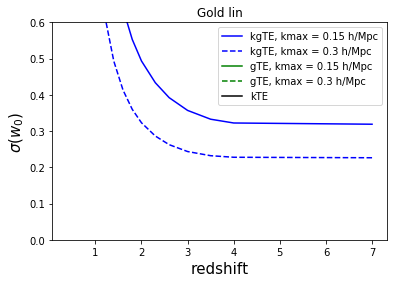

13.606584881013129 0.3189267839407479 0.22640509230718567


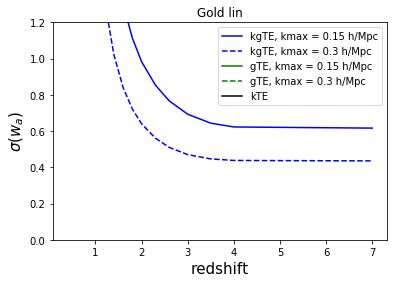

25.1815663017232 0.6163416757416131 0.43542375893876617


In [85]:
# make the plots
#print nSigmas
doTE = True
#doTE = False
doGTE = True
#doGTE = False

print '{0} P(k)'.format(label2)
h = hubble
if centers:
    redshifts = binEdges[1:] # top end of each bin
else:
    redshifts = binEdges[2:] # top end of each bin; bin1 not included
if doTE:
    plt.plot(redshifts,sigmas_w0_2_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
    plt.plot(redshifts,sigmas_w0_2_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
    if doGTE:
        plt.plot(redshifts,sigmas_w0_2_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
        plt.plot(redshifts,sigmas_w0_2_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE2[w0Ind],label='kTE',color='k')
else:
    plt.plot(redshifts,sigmas_w0_2_01,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,sigmas_w0_2_02,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk2[w0Ind],label='kk')
plt.legend()
plt.xlabel('redshift',fontsize=15)
plt.ylabel(r'$\sigma(w_0)$',fontsize=15)
plt.title(label2)
plt.ylim([0,0.6])
plt.show()
if doTE:
    print sigmas_kTE2[w0Ind], sigmas_w0_2_01[-1], sigmas_w0_2_02[-1]
else:
    print sigmas_kk2[w0Ind], sigmas_w0_2_01[-1], sigmas_w0_2_02[-1]

if doTE:
    plt.plot(redshifts,sigmas_wa_2_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
    plt.plot(redshifts,sigmas_wa_2_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
    if doGTE:
        plt.plot(redshifts,sigmas_wa_2_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
        plt.plot(redshifts,sigmas_wa_2_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE2[waInd],label='kTE',color='k')
else:
    plt.plot(redshifts,sigmas_wa_2_01,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,sigmas_wa_2_02,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk2[waInd],label='kk')
plt.legend()
plt.xlabel('redshift',fontsize=15)
plt.ylabel(r'$\sigma(w_a)$',fontsize=15)
plt.title(label2)
plt.ylim([0,1.2])
plt.show()
if doTE:
    print sigmas_kTE2[waInd], sigmas_wa_2_01[-1], sigmas_wa_2_02[-1]
else:
    print sigmas_kk2[waInd], sigmas_wa_2_01[-1], sigmas_wa_2_02[-1]

Gold nln P(k)


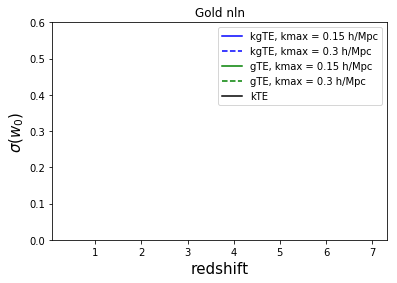

13.993089439450456 1.9347873320370215 1.402152519526275


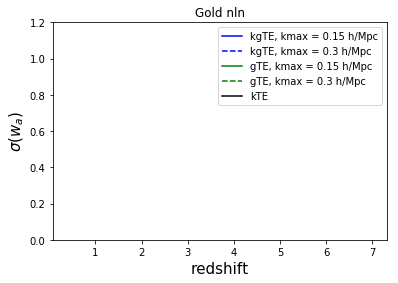

26.82375085938103 3.467963412308665 2.5070285925035227


In [86]:
# make the plots
#print nSigmas
doTE = True
#doTE = False
doGTE = True
#doGTE = False

print '{0} P(k)'.format(label4)
h = hubble
if centers:
    redshifts = binEdges[1:] # top end of each bin
else:
    redshifts = binEdges[2:] # top end of each bin; bin1 not included
if doTE:
    plt.plot(redshifts,sigmas_w0_4_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
    plt.plot(redshifts,sigmas_w0_4_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
    if doGTE:
        plt.plot(redshifts,sigmas_w0_4_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
        plt.plot(redshifts,sigmas_w0_4_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE4[w0Ind],label='kTE',color='k')
else:
    plt.plot(redshifts,sigmas_w0_4_01,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,sigmas_w0_4_02,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk4[w0Ind],label='kk')
plt.legend()
plt.xlabel('redshift',fontsize=15)
plt.ylabel(r'$\sigma(w_0)$',fontsize=15)
plt.title(label4)
plt.ylim([0,0.6])
plt.show()
if doTE:
    print sigmas_kTE4[w0Ind], sigmas_w0_4_01[-1], sigmas_w0_4_02[-1]
else:
    print sigmas_kk4[w0Ind], sigmas_w0_4_01[-1], sigmas_w0_4_02[-1]

if doTE:
    plt.plot(redshifts,sigmas_wa_4_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
    plt.plot(redshifts,sigmas_wa_4_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
    if doGTE:
        plt.plot(redshifts,sigmas_wa_4_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
        plt.plot(redshifts,sigmas_wa_4_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE4[waInd],label='kTE',color='k')
else:
    plt.plot(redshifts,sigmas_wa_4_01,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,sigmas_wa_4_02,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk4[waInd],label='kk')
plt.legend()
plt.xlabel('redshift',fontsize=15)
plt.ylabel(r'$\sigma(w_a)$',fontsize=15)
plt.title(label4)
plt.ylim([0,1.2])
plt.show()
if doTE:
    print sigmas_kTE4[waInd], sigmas_wa_4_01[-1], sigmas_wa_4_02[-1]
else:
    print sigmas_kk4[waInd], sigmas_wa_4_01[-1], sigmas_wa_4_02[-1]

Gold lin P(k)


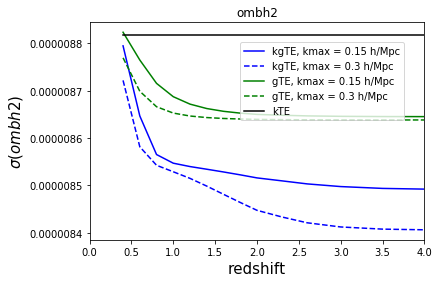

8.816861416500161e-06 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


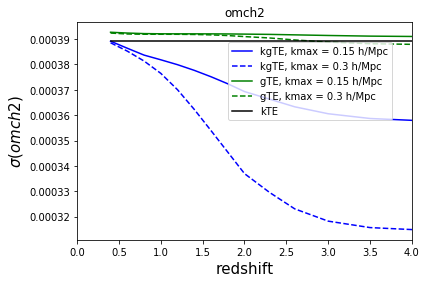

0.0003894059382078527 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


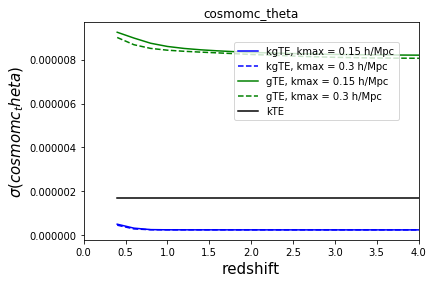

1.6973002626810108e-06 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


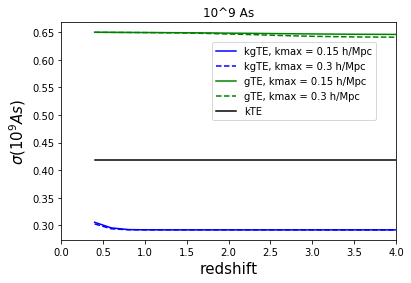

0.41804723755779805 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


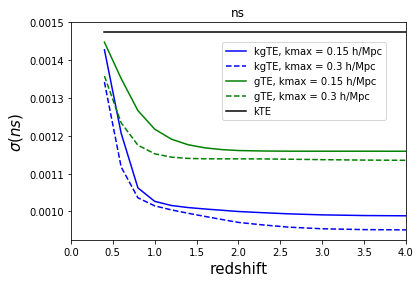

0.0014741092955194684 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


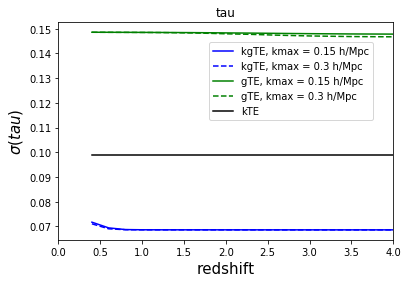

0.09898239613933973 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


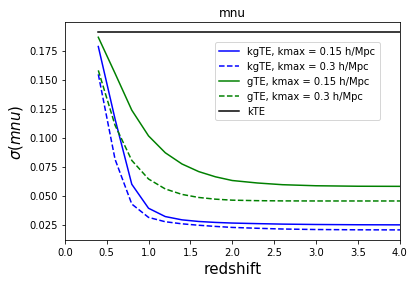

0.19073393308066164 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


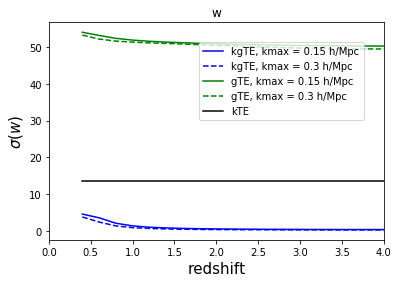

13.606584881013129 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


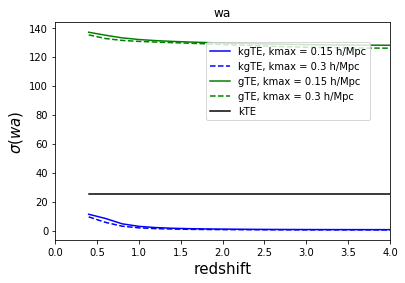

25.1815663017232 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


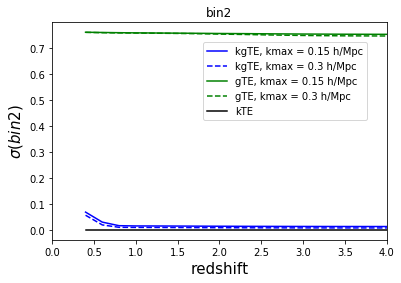

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


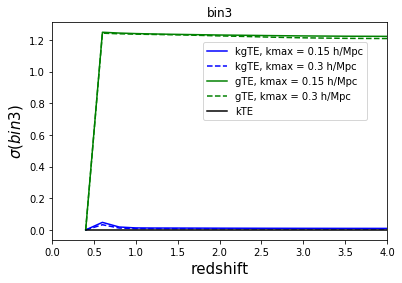

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


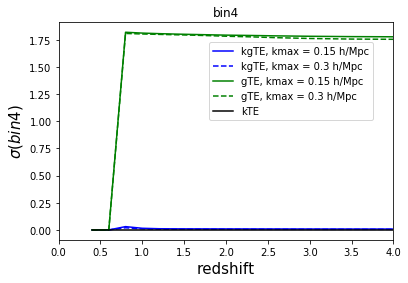

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


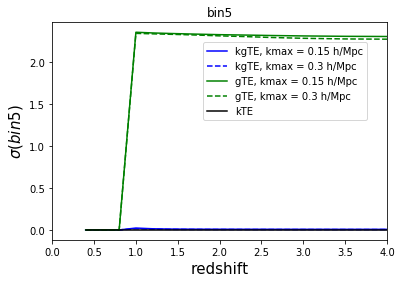

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


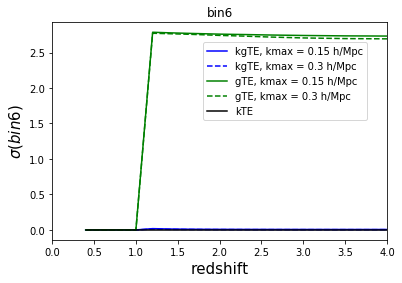

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


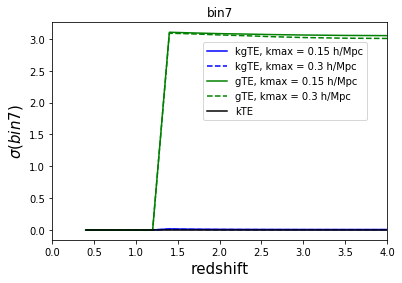

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


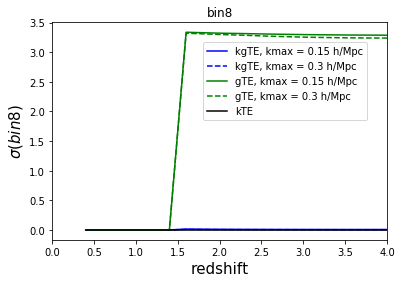

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


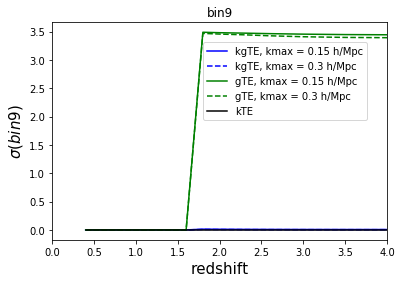

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


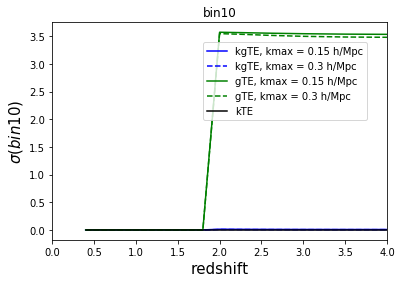

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


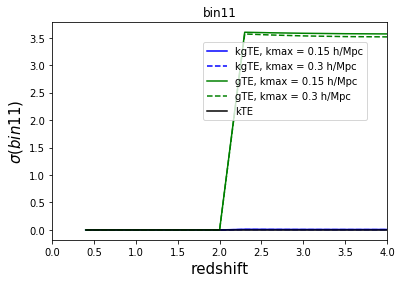

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


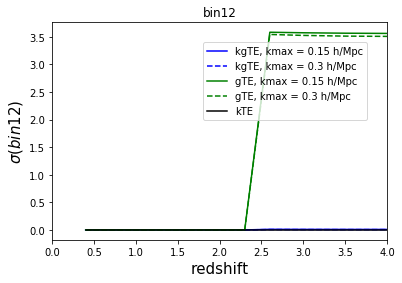

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


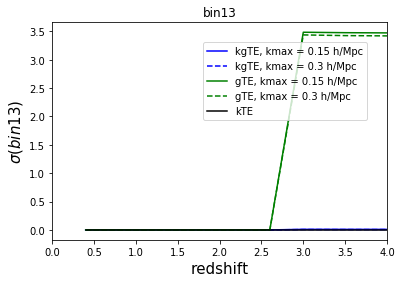

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


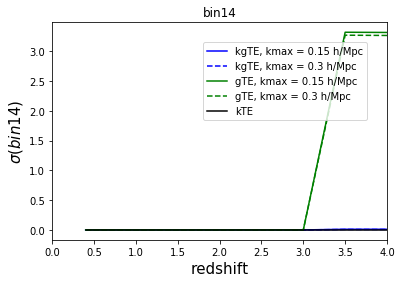

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


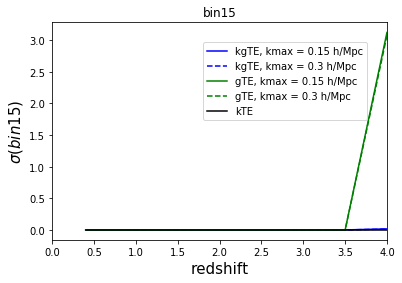

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


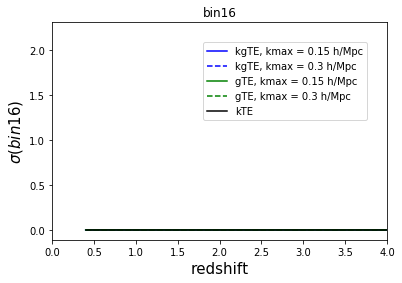

0.0 [8.49203010e-06 3.57833878e-04 2.44176405e-07 2.92016953e-01
 9.88406216e-04 6.86221507e-02 2.47279442e-02 3.18926784e-01
 6.16341676e-01 1.30067299e-02 9.53481431e-03 7.95881229e-03
 6.70807932e-03 6.00448553e-03 5.90271187e-03 6.28663008e-03
 6.80283680e-03 7.36744091e-03 7.94541811e-03 8.64074404e-03
 9.29577998e-03 1.06866947e-02 1.58207452e-02 4.24696593e-02] [8.40617403e-06 3.14767083e-04 2.42412606e-07 2.91937267e-01
 9.51190945e-04 6.85983960e-02 2.03914436e-02 2.26405092e-01
 4.35423759e-01 7.54102724e-03 6.24166711e-03 5.23972465e-03
 4.30310229e-03 3.71595083e-03 3.60275018e-03 3.88429747e-03
 4.27612671e-03 4.71198440e-03 5.17434947e-03 5.73342715e-03
 6.33581604e-03 7.76132960e-03 1.30111663e-02 3.75149421e-02]


In [87]:
# make the plots - all of the sigmas this time
print '{0} P(k)'.format(label2)

if centers:
    redshifts = binEdges[1:] # top end of each bin
else:
    redshifts = binEdges[2:] # top end of each bin; bin1 not included
for sigmaNum, paramName in enumerate(paramList2_01):
    if doTE:
        plt.plot(redshifts,np.array(sigmaBins2_01)[:,sigmaNum],label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
        plt.plot(redshifts,np.array(sigmaBins2_02)[:,sigmaNum],label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
        if doGTE:
            plt.plot(redshifts,np.array(sigmaBins2_01g)[:,sigmaNum],label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
            plt.plot(redshifts,np.array(sigmaBins2_02g)[:,sigmaNum],label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
        plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE2[sigmaNum],label='kTE',color='k')
    else:
        plt.plot(redshifts,np.array(sigmaBins2_01)[:,sigmaNum],label='kTE, kmax = {0} h/Mpc'.format(kmax1/h))
        plt.plot(redshifts,np.array(sigmaBins2_02)[:,sigmaNum],label='kTE, kmax = {0} h/Mpc'.format(kmax2/h))
        plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk2[sigmaNum],label='kk')
    plt.legend()
    plt.xlabel('redshift',fontsize=15)
    plt.ylabel(r'$\sigma({0})$'.format(paramName),fontsize=15)
    plt.title(paramName)
    plt.legend(loc=(0.45,0.55))
    plt.xlim([0,4])
    #plt.ylim([.020,0.200])
    plt.show()
    if doTE:
        print sigmas_kTE2[sigmaNum], sigmaBins2_01[:][-1], sigmaBins2_02[:][-1]
    else:
        print 'kk: ',sigmas_kk2[sigmaNum],', kmax1:', sigmaBins2_01[-1,sigmaNum],', kmax2:', sigmaBins2_02[-1,sigmaNum]


Gold nln P(k)


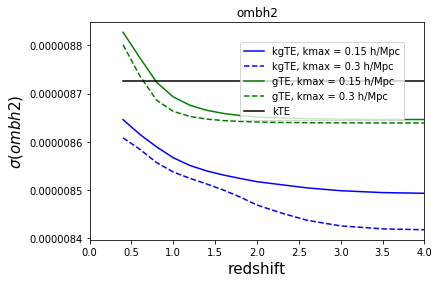

8.726303527753796e-06 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


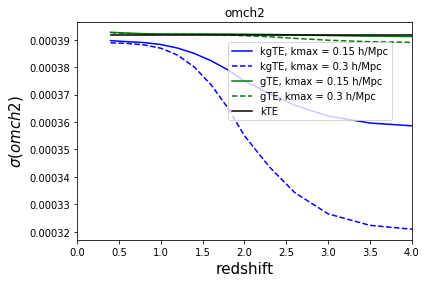

0.00039164197795203383 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


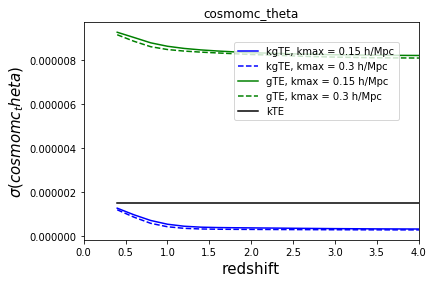

1.5085300131234046e-06 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


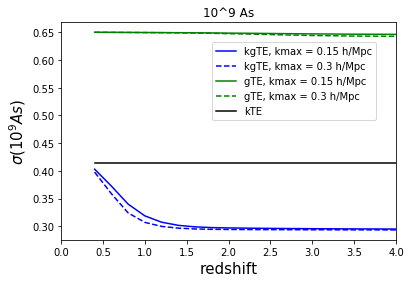

0.4151040535669879 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


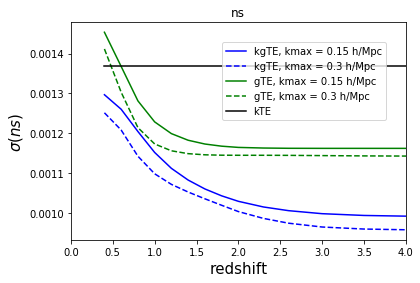

0.0013698839229516783 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


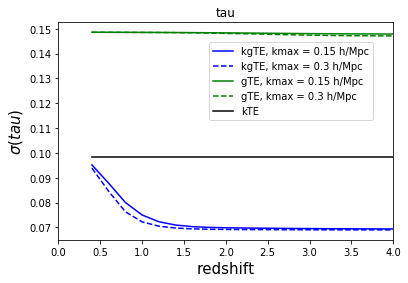

0.09821544666743746 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


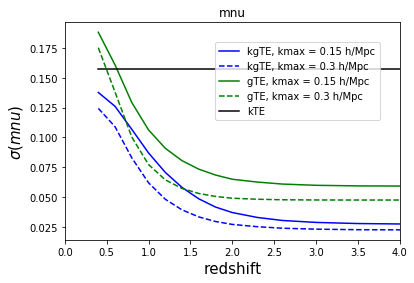

0.15696673400497949 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


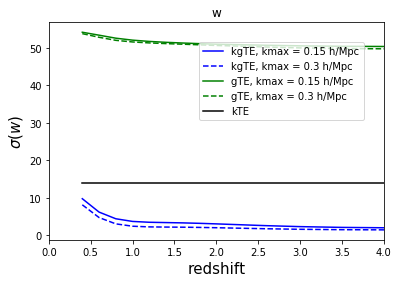

13.993089439450456 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


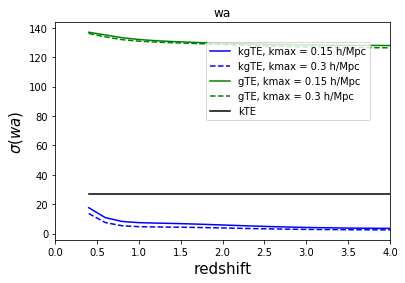

26.82375085938103 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


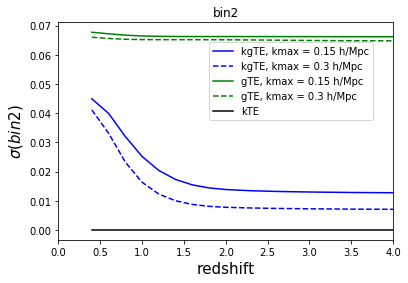

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


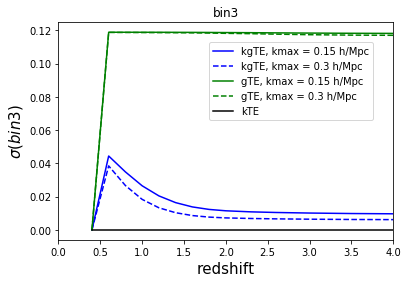

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


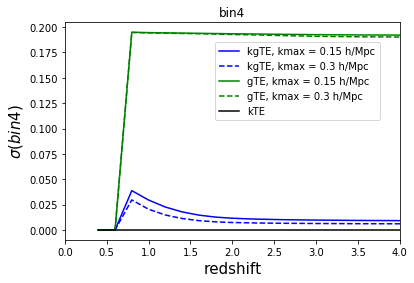

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


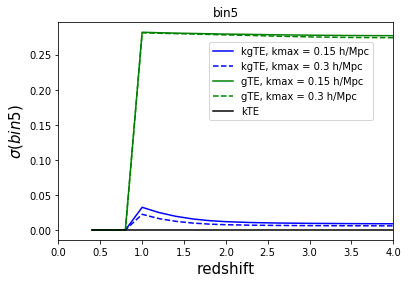

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


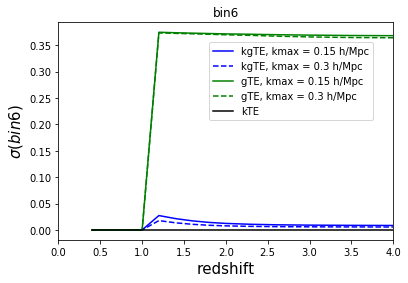

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


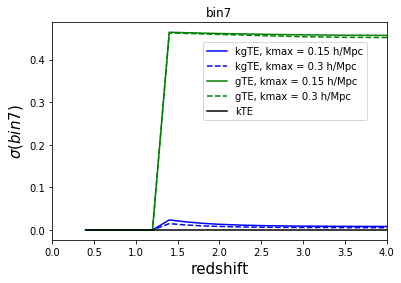

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


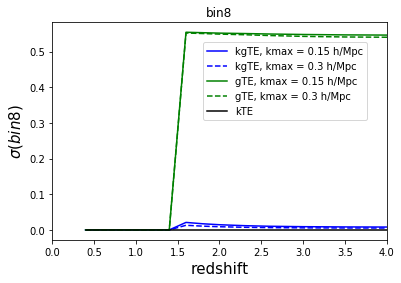

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


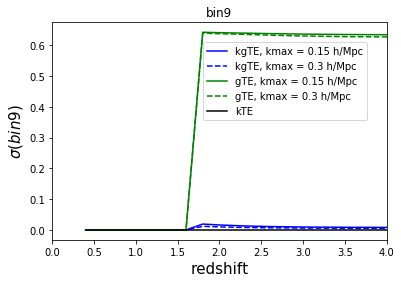

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


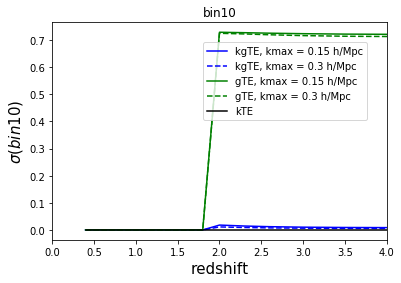

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


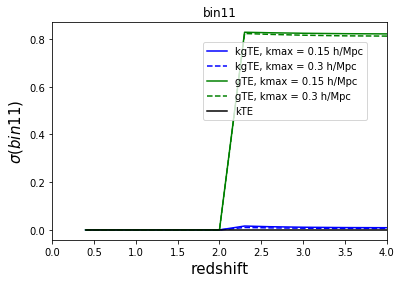

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


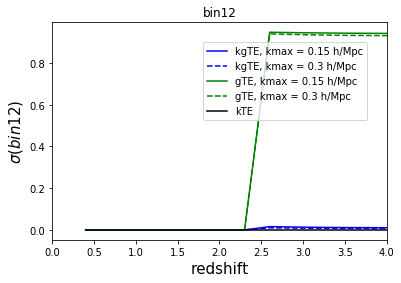

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


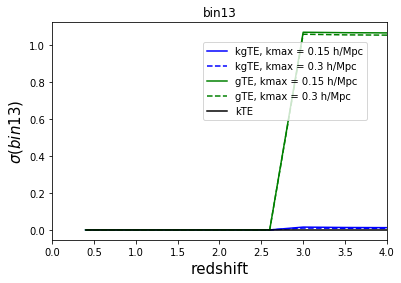

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


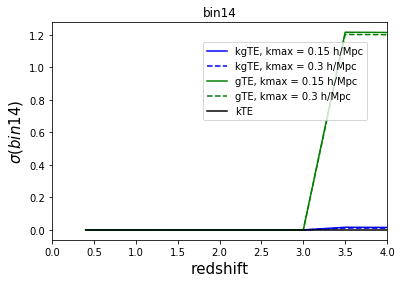

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


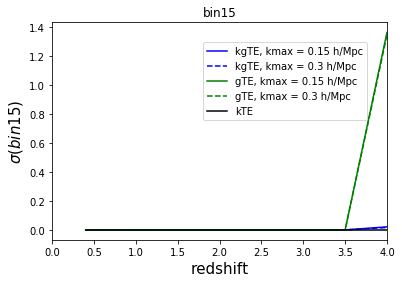

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


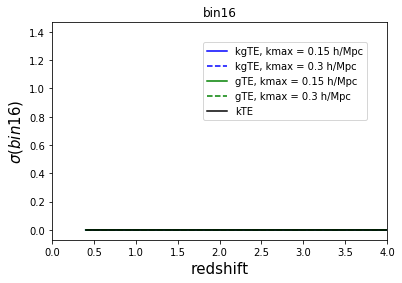

0.0 [8.49303526e-06 3.58445239e-04 3.29224156e-07 2.95126939e-01
 9.90827716e-04 6.93752632e-02 2.72695350e-02 1.93478733e+00
 3.46796341e+00 1.26875310e-02 9.60711267e-03 9.07054935e-03
 8.66859676e-03 8.31179270e-03 8.00207317e-03 7.95425037e-03
 8.02415428e-03 8.35784036e-03 9.05526131e-03 1.03291080e-02
 1.20030427e-02 1.49088318e-02 2.08894005e-02 4.69491966e-02] [8.41731004e-06 3.20661847e-04 2.90790603e-07 2.93631797e-01
 9.56607212e-04 6.90098937e-02 2.24141388e-02 1.40215252e+00
 2.50702859e+00 7.03372787e-03 6.14009937e-03 5.98384978e-03
 5.74864593e-03 5.48205274e-03 5.23362194e-03 5.17579308e-03
 5.22006755e-03 5.47883759e-03 6.03223003e-03 7.03393610e-03
 8.38343800e-03 1.08086649e-02 1.63548094e-02 4.03255238e-02]


In [88]:
# make the plots - all of the sigmas this time
print '{0} P(k)'.format(label4)

if centers:
    redshifts = binEdges[1:] # top end of each bin
else:
    redshifts = binEdges[2:] # top end of each bin; bin1 not included
for sigmaNum, paramName in enumerate(paramList2_01):
    if doTE:
        plt.plot(redshifts,np.array(sigmaBins4_01)[:,sigmaNum],label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
        plt.plot(redshifts,np.array(sigmaBins4_02)[:,sigmaNum],label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
        if doGTE:
            plt.plot(redshifts,np.array(sigmaBins4_01g)[:,sigmaNum],label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
            plt.plot(redshifts,np.array(sigmaBins4_02g)[:,sigmaNum],label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
        plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE4[sigmaNum],label='kTE',color='k')
    else:
        plt.plot(redshifts,np.array(sigmaBins4_01)[:,sigmaNum],label='kTE, kmax = {0} h/Mpc'.format(kmax1/h))
        plt.plot(redshifts,np.array(sigmaBins4_02)[:,sigmaNum],label='kTE, kmax = {0} h/Mpc'.format(kmax2/h))
        plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk4[sigmaNum],label='kk')
    plt.legend()
    plt.xlabel('redshift',fontsize=15)
    plt.ylabel(r'$\sigma({0})$'.format(paramName),fontsize=15)
    plt.title(paramName)
    plt.legend(loc=(0.45,0.55))
    plt.xlim([0,4])
    #plt.ylim([.020,0.200])
    plt.show()
    if doTE:
        print sigmas_kTE4[sigmaNum], sigmaBins4_01[:][-1], sigmaBins4_02[:][-1]
    else:
        print 'kk: ',sigmas_kk4[sigmaNum],', kmax1:', sigmaBins4_01[-1,sigmaNum],', kmax2:', sigmaBins4_02[-1,sigmaNum]


In [89]:
# figure of merit too!
fsky=0.44
print 'fsky = ',fsky
print '{0} P(k)'.format(label2)

FijInv = np.linalg.inv(Fij_kTE2)
FoMProp_kTE2 = FoMprop(FijInv,iw0=7,iwa=8)
FoMProp_kk2 = FoMprop(np.linalg.inv(Fij_kk2),iw0=7,iwa=8)
#FoMProp_kk2 = FoMprop(np.linalg.inv(Fij_kk2),iw0=4,iwa=5)
if doTE:
    print FoMProp_kTE2*fsky

    plt.plot(redshifts,FoMPropBins2_01/FoMProp_kTE2,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMProp_kTE2,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='kTE')
    plt.ylabel('FoM(kgTE)/FoM(kTE)',fontsize=15)
else:
    print FoMProp_kk2*fsky

    plt.plot(redshifts,FoMPropBins2_01/FoMProp_kk2,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMProp_kk2,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.4,0.5))
plt.xlabel('redshift',fontsize=15)

#plt.ylim((0,0.1))
plt.show()
print FoMPropBins2_01[-1]/FoMProp_kTE2, FoMPropBins2_02[-1]/FoMProp_kTE2

#FoM prop from a paper: https://arxiv.org/pdf/astro-ph/0605696.pdf, figure 6
FoMProp_pap = 1/0.015

plt.plot(redshifts,FoMPropBins2_01*fsky/(np.ones(nSigmas)*FoMProp_pap),label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
plt.plot(redshifts,FoMPropBins2_02*fsky/(np.ones(nSigmas)*FoMProp_pap),label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
plt.plot(redshifts,np.ones(nSigmas),label='WL')
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.4,0.5))
plt.xlabel('redshift',fontsize=15)
plt.ylabel('FoM(kgTE)/FoM(WL)',fontsize=15)
#plt.ylim((0,0.0001))
plt.show()
print FoMPropBins2_01[-1]*fsky/FoMProp_pap, FoMPropBins2_02[-1]*fsky/FoMProp_pap

fsky =  0.44
Gold lin P(k)


IndexError: index 7 is out of bounds for axis 0 with size 6

In [ ]:
# figure of merit too!
print 'fsky = ',fsky
print '{0} P(k)'.format(label4)

FijInv = np.linalg.inv(Fij_kTE4)
FoMProp_kTE4 = FoMprop(FijInv,iw0=7,iwa=8)
FoMProp_kk4 = FoMprop(np.linalg.inv(Fij_kk4),iw0=7,iwa=8)
#FoMProp_kk4 = FoMprop(np.linalg.inv(Fij_kk4),iw0=4,iwa=5)
if doTE:
    print FoMProp_kTE4*fsky

    plt.plot(redshifts,FoMPropBins4_01/FoMProp_kTE4,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins4_02/FoMProp_kTE4,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='kTE')
    plt.ylabel('FoM(kgTE)/FoM(kTE)',fontsize=15)
else:
    print FoMProp_kk4*fsky

    plt.plot(redshifts,FoMPropBins4_01/FoMProp_kk4,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins4_02/FoMProp_kk4,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.4,0.5))
plt.xlabel('redshift',fontsize=15)

#plt.ylim((0,0.1))
plt.show()
print FoMPropBins4_01[-1]/FoMProp_kTE4, FoMPropBins4_02[-1]/FoMProp_kTE4

#FoM prop from a paper: https://arxiv.org/pdf/astro-ph/0605696.pdf, figure 6
FoMProp_pap = 1/0.015

plt.plot(redshifts,FoMPropBins4_01*fsky/(np.ones(nSigmas)*FoMProp_pap),label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
plt.plot(redshifts,FoMPropBins4_02*fsky/(np.ones(nSigmas)*FoMProp_pap),label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
plt.plot(redshifts,np.ones(nSigmas),label='WL')
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.4,0.5))
plt.xlabel('redshift',fontsize=15)
plt.ylabel('FoM(kgTE)/FoM(WL)',fontsize=15)
#plt.ylim((0,0.0001))
plt.show()
print FoMPropBins4_01[-1]*fsky/FoMProp_pap, FoMPropBins4_02[-1]*fsky/FoMProp_pap

In [ ]:
# figure of merit too!
print 'fsky = ',fsky
print '{0} P(k) and {1} P(k) together'.format(label2,label4)

#FijInv = np.linalg.inv(Fij_kTE2)
#FoMProp_kTE2 = FoMprop(FijInv,iw0=7,iwa=8)
#FoMProp_kk2 = FoMprop(np.linalg.inv(Fij_kk2),iw0=7,iwa=8)
if doTE:
    plt.plot(redshifts,FoMPropBins2_01/FoMProp_kTE2,color='b',linestyle='-',
             label='{1}, kgTE, kmax = {0} h/Mpc'.format(kmax1/h,label2))
    plt.plot(redshifts,FoMPropBins2_02/FoMProp_kTE2,color='g',linestyle='-',linewidth=1,
             label='{1}, kgTE, kmax = {0} h/Mpc'.format(kmax2/h,label2))
    plt.plot(redshifts,FoMPropBins4_01/FoMProp_kTE4,color='b',linestyle='--',
             label='{1}, kgTE, kmax = {0} h/Mpc'.format(kmax1/h,label4))
    plt.plot(redshifts,FoMPropBins4_02/FoMProp_kTE4,color='g',linestyle='--',linewidth=1,
             label='{1}, kgTE, kmax = {0} h/Mpc'.format(kmax2/h,label4))
    plt.plot(redshifts,np.ones(nSigmas),label='kTE',color='k',linestyle='-')
    plt.ylabel('FoM(kgTE)/FoM(kTE)',fontsize=15)
else:
    plt.plot(redshifts,FoMPropBins2_01/FoMProp_kk2,color='b',linestyle='-',
             label='{1}, kg, kmax = {0} h/Mpc'.format(kmax1/h,label2))
    plt.plot(redshifts,FoMPropBins2_02/FoMProp_kk2,color='g',linestyle='-',linewidth=1,
             label='{1}, kg, kmax = {0} h/Mpc'.format(kmax2/h,label2))
    plt.plot(redshifts,FoMPropBins4_01/FoMProp_kk4,color='b',linestyle='--',
             label='{1}, kg, kmax = {0} h/Mpc'.format(kmax1/h,label4))
    plt.plot(redshifts,FoMPropBins4_02/FoMProp_kk4,color='g',linestyle='--',linewidth=1,
             label='{1}, kg, kmax = {0} h/Mpc'.format(kmax2/h,label4))
    plt.plot(redshifts,np.ones(nSigmas),label='k', color='k',linestyle='-')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.35,0.33))
plt.xlabel('redshift',fontsize=15)

#plt.ylim((0,0.1))
plt.show()

#FoM prop from a paper: https://arxiv.org/pdf/astro-ph/0605696.pdf, figure 6
FoMProp_pap = 1/0.015

plt.plot(redshifts,FoMPropBins2_01*fsky/(np.ones(nSigmas)*FoMProp_pap),color='b',linestyle='-',
         label='{1}, kgTE, kmax = {0} h/Mpc'.format(kmax1/h,label2))
plt.plot(redshifts,FoMPropBins2_02*fsky/(np.ones(nSigmas)*FoMProp_pap),color='g',linestyle='-',linewidth=1,
         label='{1}, kgTE, kmax = {0} h/Mpc'.format(kmax2/h,label2))
plt.plot(redshifts,FoMPropBins4_01*fsky/(np.ones(nSigmas)*FoMProp_pap),color='b',linestyle='--',
         label='{1}, kgTE, kmax = {0} h/Mpc'.format(kmax1/h,label4))
plt.plot(redshifts,FoMPropBins4_02*fsky/(np.ones(nSigmas)*FoMProp_pap),color='g',linestyle='--',linewidth=1,
         label='{1}, kgTE, kmax = {0} h/Mpc'.format(kmax2/h,label4))
plt.plot(redshifts,np.ones(nSigmas),label='WL',                   color='k',linestyle='-')
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.35,0.33))
plt.xlabel('redshift',fontsize=15)
plt.ylabel('FoM(kgTE)/FoM(WL)',fontsize=15)
#plt.ylim((0,0.0001))
plt.show()


In [ ]:
# now for the gTE
print 'fsky=1'
print '{0} P(k)'.format(label2)

if doTE:
    plt.plot(redshifts,FoMPropBins2_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,FoMPropBins2_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h))
    
else:
    plt.plot(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.45,0.7))
plt.xlabel('redshift',fontsize=15)
plt.show()

if doTE:
    plt.semilogy(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.semilogy(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.semilogy(redshifts,np.ones(nSigmas),label='gTE')
    
    plt.ylabel('FoM(kgTE)/FoM(gTE)',fontsize=15)
    plt.title('Scaled galaxy FoMs: both gTE cases are shown')
else:
    plt.plot(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.45,0.7))
plt.xlabel('redshift',fontsize=15)
plt.show()

In [ ]:
# now for the gTE
print 'fsky=1'
print '{0} P(k)'.format(label4)

if doTE:
    plt.plot(redshifts,FoMPropBins4_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins4_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,FoMPropBins4_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins4_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h))
    
else:
    plt.plot(redshifts,FoMPropBins4_01/FoMPropBins4_01g,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins4_02/FoMPropBins4_02g,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.45,0.7))
plt.xlabel('redshift',fontsize=15)
plt.show()

if doTE:
    plt.semilogy(redshifts,FoMPropBins4_01/FoMPropBins4_01g,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.semilogy(redshifts,FoMPropBins4_02/FoMPropBins4_02g,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.semilogy(redshifts,np.ones(nSigmas),label='gTE')
    
    plt.ylabel('FoM(kgTE)/FoM(gTE)',fontsize=15)
    plt.title('Scaled galaxy FoMs: both gTE cases are shown')
else:
    plt.plot(redshifts,FoMPropBins4_01/FoMPropBins4_01g,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins4_02/FoMPropBins4_02g,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.45,0.7))
plt.xlabel('redshift',fontsize=15)
plt.show()

# Show some constraints with w0, wa marginalized

In [ ]:
# fix w0,wa
def fixW(Fij):
    waInd = 8
    w0Ind = 7
    myFij = fixParam(Fij,waInd)
    myFij = fixParam(myFij,w0Ind)
    return myFij

Fij_TE2_noW = fixW(FijTE2)
Fij_kTE2_noW = fixW(Fij_kTE2)
Fij_gTE2_01_noW = fixW(Fij_gTE2_01)
Fij_gTE2_02_noW = fixW(Fij_gTE2_02)
Fij_TE4_noW = fixW(FijTE4)
Fij_kTE4_noW = fixW(Fij_kTE4)
Fij_gTE4_01_noW = fixW(Fij_gTE4_01)
Fij_gTE4_02_noW = fixW(Fij_gTE4_02)
print 'done.'

In [ ]:
fsky = 0.44

sigmas_TE2_noW     = getSigmas(Fij_TE2_noW*fsky)
sigmas_kTE2_noW    = getSigmas(Fij_kTE2_noW*fsky)
sigmas_gTE2_01_noW = getSigmas(Fij_gTE2_01_noW*fsky)
sigmas_gTE2_02_noW = getSigmas(Fij_gTE2_02_noW*fsky)
sigmas_TE4_noW     = getSigmas(Fij_TE4_noW*fsky)
sigmas_kTE4_noW    = getSigmas(Fij_kTE4_noW*fsky)
sigmas_gTE4_01_noW = getSigmas(Fij_gTE4_01_noW*fsky)
sigmas_gTE4_02_noW = getSigmas(Fij_gTE4_02_noW*fsky)
print 'done.'

In [ ]:
# show some sigmas
mnuInd = 6
print sigmas_TE2_noW[mnuInd]
print sigmas_kTE2_noW[mnuInd]
print sigmas_gTE2_01_noW[mnuInd]
print sigmas_gTE2_02_noW[mnuInd]

print sigmas_TE4_noW[mnuInd]
print sigmas_kTE4_noW[mnuInd]
print sigmas_gTE4_01_noW[mnuInd]
print sigmas_gTE4_02_noW[mnuInd]

In [ ]:
# convert to H0
myNParams = 7
myParamList = Fobj2.paramList[:myNParams]
print myParamList

In [ ]:
# The only derivatives in the Jacobian are on the dtheta/dparam row.
# derivatives from notebook "Transform Fisher Matrix with Jacobian"
dthetas = [-2.46099289e-02,  1.05373002e-02,  2.98929388e-05,  # dtheta_dombh2, dtheta_domch2, dtheta_dH0
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00,   # dtheta_dAs, dtheta_dns, dtheta_dtau
            1.94175593e-04,  8.94926461e-04,  2.43189330e-04]   # dtheta_mnu, dtheta_w, dtheta_wa

mcIndex = 2
jacobian = np.diag(np.ones(nParams))
jacobian[mcIndex,:nCosParams] = dthetas#*100  #how does this depend on lin/nonlin, gold/opti? -> doesn't

In [ ]:
# cut out bin1 from Fij and paramList since it was never used
jacobian = fixParam(jacobian,nCosParams)
#myParamList = np.delete(paramList,nCosParams,0)

In [ ]:
# jacobian-it-up
miniJac = jacobian[:nCosParams,:nCosParams]

Fij_TE2_t     = np.dot(miniJac.T,np.dot(FijTE2,miniJac))
Fij_kTE2_t    = np.dot(miniJac.T,np.dot(Fij_kTE2,miniJac))
Fij_gTE2_01_t = np.dot(jacobian.T,np.dot(Fij_gTE2_01,jacobian))
Fij_gTE2_02_t = np.dot(jacobian.T,np.dot(Fij_gTE2_02,jacobian))

Fij_TE2_noW_t     = fixW(Fij_TE2_t)
Fij_kTE2_noW_t    = fixW(Fij_kTE2_t)
Fij_gTE2_01_noW_t = fixW(Fij_gTE2_01_t)
Fij_gTE2_02_noW_t = fixW(Fij_gTE2_02_t)

Fij_TE4_t     = np.dot(miniJac.T,np.dot(FijTE4,miniJac))
Fij_kTE4_t    = np.dot(miniJac.T,np.dot(Fij_kTE4,miniJac))
Fij_gTE4_01_t = np.dot(jacobian.T,np.dot(Fij_gTE4_01,jacobian))
Fij_gTE4_02_t = np.dot(jacobian.T,np.dot(Fij_gTE4_02,jacobian))

Fij_TE4_noW_t     = fixW(Fij_TE4_t)
Fij_kTE4_noW_t    = fixW(Fij_kTE4_t)
Fij_gTE4_01_noW_t = fixW(Fij_gTE4_01_t)
Fij_gTE4_02_noW_t = fixW(Fij_gTE4_02_t)

# adjust name
myParamList[mcIndex] = 'H0'
print myParamList

In [ ]:
sigmas_TE2_noW_t     = getSigmas(Fij_TE2_noW_t*fsky)
sigmas_kTE2_noW_t    = getSigmas(Fij_kTE2_noW_t*fsky)
sigmas_gTE2_01_noW_t = getSigmas(Fij_gTE2_01_noW_t*fsky)
sigmas_gTE2_02_noW_t = getSigmas(Fij_gTE2_02_noW_t*fsky)

sigmas_TE4_noW_t     = getSigmas(Fij_TE4_noW_t*fsky)
sigmas_kTE4_noW_t    = getSigmas(Fij_kTE4_noW_t*fsky)
sigmas_gTE4_01_noW_t = getSigmas(Fij_gTE4_01_noW_t*fsky)
sigmas_gTE4_02_noW_t = getSigmas(Fij_gTE4_02_noW_t*fsky)

In [ ]:
# show some sigmas
mnuInd = 6

print sigmas_TE2_noW_t[mnuInd]
print sigmas_kTE2_noW_t[mnuInd]
print sigmas_gTE2_01_noW_t[mnuInd]
print sigmas_gTE2_02_noW_t[mnuInd]

print sigmas_TE4_noW_t[mnuInd]
print sigmas_kTE4_noW_t[mnuInd]
print sigmas_gTE4_01_noW_t[mnuInd]
print sigmas_gTE4_02_noW_t[mnuInd]

In [ ]:
# the whole set for TE
for i,name in enumerate(myParamList):
    print name,': ',sigmas_TE2_noW_t[i], sigmas_TE4_noW_t[i] 

In [ ]:
# compare to Byeonghee's values
"""
{'As': 3.4715938322001281e-10,
 'H0': 3.2104711009865672,
 'mnu': 0.34643884352014354,
 'ns': 0.0023605108462934812,
 'ombh2': 2.9979111762661943e-05,
 'omch2': 0.00078185341013362877,
 'tau': 0.081251132776938489}
"""
sigmasBye = [2.9979111762661943e-05,0.00078185341013362877,3.2104711009865672,0.34715938322001281,
             0.0023605108462934812,0.081251132776938489,0.34643884352014354]

print sigmasBye

In [ ]:
from prettytable import PrettyTable

print '{0} P(k)'.format(label2)
t = PrettyTable(['Parameter','S4 Z', 'S4 Bye','% diff'])
for i,p in enumerate(myParamList):
    Bi = sigmasBye[i]
    Zi = sigmas_TE2_noW_t[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi,"%5.3g" % diff] )
print t

print '{0} P(k)'.format(label4)
t = PrettyTable(['Parameter','S4 Z', 'S4 Bye','% diff'])
for i,p in enumerate(myParamList):
    Bi = sigmasBye[i]
    Zi = sigmas_TE4_noW_t[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi,"%5.3g" % diff] )
print t


# get $\sigma_{\Sigma m_{\nu}}(z)$ with $w_0,w_a$ fixed

In [ ]:
sigmaBins2_02nw,FoMPropBins2_02nw,paramList2_02nw = getKZlimited(covarBins2_02,dClVecsBins2_02,
                                                           preMaskBins2_02,Fobj2,lmaxByBin2_02,FijTE2,
                                                           centers=centers,fixW=True)
sigmaBins4_02nw,FoMPropBins4_02nw,paramList4_02nw = getKZlimited(covarBins4_02,dClVecsBins4_02,
                                                           preMaskBins4_02,Fobj4,lmaxByBin4_02,FijTE4,
                                                           centers=centers,fixW=True)
print 'done.'

In [ ]:
redshifts = binEdges[2:] 
fsky = 0.44
print 'fsky: ',fsky,', fsky^(-1/2): ,',fsky**(-.5)

print '{0} P(k)'.format(label2)
plt.semilogy(redshifts,np.array(sigmaBins2_02nw)[:,6]*fsky**(-.5)*1000,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
plt.legend(loc=(0.45,0.85))
plt.xlim([0.2,7])
plt.ylim([.020*1000,0.150*1000])
plt.xlabel('redshift')
plt.ylabel(r'$\sigma(m_\nu)$ [meV]')
plt.title(r'$\sigma(m_\nu,z)$, $w$ fixed, $f_{{sky}} = {0}$'.format(fsky))
plt.show()

print sigmaBins2_02nw[:,6]*fsky**(-.5)*1000

print '{0} P(k)'.format(label4)
plt.semilogy(redshifts,np.array(sigmaBins4_02nw)[:,6]*fsky**(-.5)*1000,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
plt.legend(loc=(0.45,0.85))
plt.xlim([0.2,7])
plt.ylim([.020*1000,0.150*1000])
plt.xlabel('redshift')
plt.ylabel(r'$\sigma(m_\nu)$ [meV]')
plt.title(r'$\sigma(m_\nu,z)$, $w$ fixed, $f_{{sky}} = {0}$'.format(fsky))
plt.show()

print sigmaBins2_02nw[:,6]*fsky**(-.5)*1000

# remake $F_{ij}$ with higher $\ell_{min}$

In [ ]:
print 'number of ells per block except for the kappa only block'
for i in range(15):
    print 'dClVecsBins:'
    print dClVecsBins2_01[i].shape[2], dClVecsBins2_01g[i].shape[2], dClVecsBins4_01[i].shape[2], dClVecsBins4_01g[i].shape[2]
    print dClVecsBins2_02[i].shape[2], dClVecsBins2_02g[i].shape[2], dClVecsBins4_02[i].shape[2], dClVecsBins4_02g[i].shape[2]
    print 'invCovBins:'
    print invCovBins2_01[i].shape[2], invCovBins2_01g[i].shape[2], invCovBins4_01[i].shape[2], invCovBins4_01g[i].shape[2]
    print invCovBins2_02[i].shape[2], invCovBins2_02g[i].shape[2], invCovBins4_02[i].shape[2], invCovBins4_02g[i].shape[2]


In [ ]:
# re-do getFijSum with lmin option
# assemble the avengers
#def getFijSum(nParams,nBins,dClVecsBins,invCovBins,Fij_kk,paramList):
def getFijSum(nParams,nBins,dClVecsBins,invCovBins,paramList,centers=False,ellIndMin=0):
    """
    Inputs:
    
        ellIndMin: minimum index in ell direction to include in sums
    Returns:
    
    """
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    nBlocks = dClVecsBins.__len__()
    nBlocks2 = invCovBins.__len__()
    print 'nBlocks: ',nBlocks,', nBlocks2: ',nBlocks2
    
    # get ell ranges for each block
    ellRanges = np.zeros(nBlocks-1,dtype=int)
    for blockNum in range(nBlocks-1):
        ellRanges[blockNum] = dClVecsBins[blockNum].shape[2]
    print 'ellRanges: ',ellRanges
    blockNumMin = 0 # do all blocks unless..
    #if ellIndMin != 0:
    while ellIndMin >= ellRanges[blockNumMin]:
        ellIndMin -= ellRanges[blockNumMin] # remove that many ells and the block
        blockNumMin +=1                     # go to the next block on next loop
    
    for binNum in range(blockNumMin,nBlocks):
        print binNum, dClVecsBins[binNum].size,dClVecsBins[binNum].shape,invCovBins[binNum].shape
        if binNum == blockNumMin:
            print ellIndMin
            Fij += makeFij(dClVecsBins[binNum][:,:,ellIndMin:],invCovBins[binNum][:,:,ellIndMin:],nParams)
        else:
            Fij += makeFij(dClVecsBins[binNum],invCovBins[binNum],nParams)

    # add the low-ell kappa-only part (high ell part was binNum = nBins-1)
    nCosParams = nParams-nBins
    #Fij[:nCosParams,:nCosParams] += Fij_kk
    
    if not centers:
        # cut out bin1 from Fij and paramList since it was never used
        Fij = fixParam(Fij,nCosParams)
        myParamList = np.delete(paramList,nCosParams,0)
        
        # cut out other bins if ellIndMin > 0
        while blockNumMin > 0:
            Fij = fixParam(Fij,nCosParams)
            myParamList = np.delete(myParamList,nCosParams,0)
            blockNumMin -=1
    else:
        print 'hahahahahaha'

    print myParamList
    #print Fij
    return Fij,myParamList



In [ ]:
"""
Fij2_01,paramList2_01 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fobj2.paramList,
                                  centers=centers)
Fij2_02,paramList2_02 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_02,invCovBins2_02,Fobj2.paramList,
                                  centers=centers)
Fij4_01,paramList4_01 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_01,invCovBins4_01,Fobj4.paramList,
                                  centers=centers)
Fij4_02,paramList4_02 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_02,invCovBins4_02,Fobj4.paramList,
                                  centers=centers)
#print 'done.'

# galaxies only cases
Fij2_01g,paramList2_01g = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01g,invCovBins2_01g,Fobj2.paramList,
                                  centers=centers)
Fij2_02g,paramList2_02g = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_02g,invCovBins2_02g,Fobj2.paramList,
                                  centers=centers)
Fij4_01g,paramList4_01g = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_01g,invCovBins4_01g,Fobj4.paramList,
                                  centers=centers)
Fij4_02g,paramList4_02g = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_02g,invCovBins4_02g,Fobj4.paramList,
                                  centers=centers)
print 'done.'
"""

In [ ]:
# get a set of constraint curves for nonlin gold kmax .15
Fij2_01_L000,paramList2_01_L000 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fobj2.paramList,
                                  centers=centers,ellIndMin=0)
print 'done with L000'
Fij2_01_L030,paramList2_01_L030 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fobj2.paramList,
                                  centers=centers,ellIndMin=30)
print 'done with L030'
Fij2_01_L060,paramList2_01_L060 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fobj2.paramList,
                                  centers=centers,ellIndMin=60)
print 'done with L060'
Fij2_01_L090,paramList2_01_L090 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fobj2.paramList,
                                  centers=centers,ellIndMin=90)
print 'done with L090'
Fij2_01_L170,paramList2_01_L170 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fobj2.paramList,
                                  centers=centers,ellIndMin=170)
print 'done with L170'
Fij2_01_L370,paramList2_01_L370 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fobj2.paramList,
                                  centers=centers,ellIndMin=370)
print 'done with L370'
Fij2_01_L570,paramList2_01_L570 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fobj2.paramList,
                                  centers=centers,ellIndMin=570)
print 'done with L570'

In [ ]:
# get a set of constraint curves for nonlin gold kmax .15
Fij2_01g_L000,paramList2_01g_L000 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01g,invCovBins2_01g,Fobj2.paramList,
                                  centers=centers,ellIndMin=0)
print 'done with L000'
Fij2_01g_L030,paramList2_01g_L030 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01g,invCovBins2_01g,Fobj2.paramList,
                                  centers=centers,ellIndMin=30)
print 'done with L030'
Fij2_01g_L060,paramList2_01g_L060 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01g,invCovBins2_01g,Fobj2.paramList,
                                  centers=centers,ellIndMin=60)
print 'done with L060'
Fij2_01g_L090,paramList2_01g_L090 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01g,invCovBins2_01g,Fobj2.paramList,
                                  centers=centers,ellIndMin=90)
print 'done with L090'
Fij2_01g_L170,paramList2_01g_L170 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01g,invCovBins2_01g,Fobj2.paramList,
                                  centers=centers,ellIndMin=170)
print 'done with L170'
Fij2_01g_L370,paramList2_01g_L370 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01g,invCovBins2_01g,Fobj2.paramList,
                                  centers=centers,ellIndMin=370)
print 'done with L370'
Fij2_01g_L570,paramList2_01g_L570 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01g,invCovBins2_01g,Fobj2.paramList,
                                  centers=centers,ellIndMin=570)
print 'done with L570'

In [ ]:
# get FoMs
FoMProp2_01_L000 = FoMprop(np.linalg.inv(Fij2_01_L000))
FoMProp2_01g_L000 = FoMprop(np.linalg.inv(Fij2_01g_L000))
FoMProp2_01_L030 = FoMprop(np.linalg.inv(Fij2_01_L030))
FoMProp2_01g_L030 = FoMprop(np.linalg.inv(Fij2_01g_L030))
FoMProp2_01_L060 = FoMprop(np.linalg.inv(Fij2_01_L060))
FoMProp2_01g_L060 = FoMprop(np.linalg.inv(Fij2_01g_L060))
FoMProp2_01_L090 = FoMprop(np.linalg.inv(Fij2_01_L090))
FoMProp2_01g_L090 = FoMprop(np.linalg.inv(Fij2_01g_L090))
FoMProp2_01_L170 = FoMprop(np.linalg.inv(Fij2_01_L170))
FoMProp2_01g_L170 = FoMprop(np.linalg.inv(Fij2_01g_L170))
FoMProp2_01_L370 = FoMprop(np.linalg.inv(Fij2_01_L370))
FoMProp2_01g_L370 = FoMprop(np.linalg.inv(Fij2_01g_L370))
FoMProp2_01_L570 = FoMprop(np.linalg.inv(Fij2_01_L570))
FoMProp2_01g_L570 = FoMprop(np.linalg.inv(Fij2_01g_L570))
print 'done.'

In [ ]:
# well those are annoying variable names.  Load them into an array.
FoMProps = np.empty(7)
FoMPropsG = np.empty(7)

lmins = [30,60,90,120,200,400,600]

FoMProps[0] = FoMProp2_01_L000
FoMProps[1] = FoMProp2_01_L030
FoMProps[2] = FoMProp2_01_L060
FoMProps[3] = FoMProp2_01_L090
FoMProps[4] = FoMProp2_01_L170
FoMProps[5] = FoMProp2_01_L370
FoMProps[6] = FoMProp2_01_L570

FoMPropsG[0] = FoMProp2_01g_L000
FoMPropsG[1] = FoMProp2_01g_L030
FoMPropsG[2] = FoMProp2_01g_L060
FoMPropsG[3] = FoMProp2_01g_L090
FoMPropsG[4] = FoMProp2_01g_L170
FoMPropsG[5] = FoMProp2_01g_L370
FoMPropsG[6] = FoMProp2_01g_L570

FoMRatios = FoMProps/FoMPropsG

In [ ]:
plt.plot(lmins[:-2],FoMRatios[:-2])
plt.title(r'Gold nonlinear $k_{max}=0.15$ h/Mpc')
plt.ylabel('FoM(kgTE)/FoM(gTE)')
plt.xlabel('$\ell_{min}$')
plt.show()

In [ ]:
plt.plot(lmins,FoMProps,label='kgTE')
plt.plot(lmins,FoMPropsG,label='gTE')
plt.legend()
plt.title(r'Gold nonlinear $k_{max}=0.15$ h/Mpc')
plt.ylabel(r'$(\sigma(w_p)\sigma(w_a))^{-1}$')
plt.xlabel('$\ell_{min}$')
plt.show()